In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import glob

In [8]:
df2 = pd.read_csv('uni3.csv', sep=';')

In [9]:
df2['Unidade_Produtiva'] = df2['Nome do Grupo ou Família (unidade produtiva)']

In [4]:
df2['fora_roça'] = df2['escola'].fillna(0)+df2['ceci'].fillna(0)+df2['posto'].fillna(0)+df2['fora'].fillna(0)
df2['trabalho_roça'] = df2.trabalho_roça.fillna(0)
df2['agente'] = df2['agente'].fillna(0)

KeyError: 'escola'

In [ ]:
df2[['Unidade_Produtiva', 'Caracterização do grupo/Quantos adultos', 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas','Plantio/Quantos mais velhos (mais de 60 anos)', 'Plantio/Quantos jovens (até 20 anos)', 'Plantio/Quantas mulheres']]

## df2[['Caracterização do grupo/Quantos compõem o grupo','Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual', '' ]]

In [9]:
df_lucas = df2.loc[:,'Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual':'Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Outro'].fillna(0)
df_lucas['total'] = df2.loc[:,'Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual':'Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Outro'].fillna(0).sum(axis=1).values
df_lucas['Unidade_Produtiva'] = df2.Unidade_Produtiva   

In [322]:
df_lucas.head()

Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual  \
0                                                0.0                                 
1                                                0.0                                 
2                                                0.0                                 
3                                                3.0                                 
4                                                0.0                                 

   Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci  \
0                                                1.0                      
1                                                0.0                      
2                                                0.0                      
3                                                1.0                      
4                                                0.0                      

   Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Posto de Saúde  \
0                                                0.0                                
1                                                1.0                                
2                                                0.0                                
3                                                1.0                                
4                                                0.0                                

   Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Agente ambiental ou cultural  \
0                                                7.0                                              
1                                                8.0                                              
2                                                9.0                                              
3                                                8.0                                              
4                                                0.0                                              

   Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Emprego para não indígena fora da aldeia  \
0                                                0.0                                                          
1                                                0.0                                                          
2                                                0.0                                                          
3                                                0.0                                                          
4                                                0.0                                                          

   Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Outro  \
0                                                0.0                       
1                                                0.0                       
2                                                0.0                       
3                                                3.0                       
4                                                1.0                       

   total           Unidade_Produtiva  
0    8.0  grupo da aldeia Tekoa Porã  
1    9.0     grupo da aldeia Yrexakã  
2    9.0   grupo da aldeia Tape Miri  
3   16.0    grupo da aldeia Kalipety  
4    1.0      Grupo da Sonia krukutu

In [10]:
df_problema = df2[['Unidade_Produtiva','Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas', 'escola', 'ceci', 'posto', 'agente', 'fora', 'outra_ocupacao']].fillna(0)
df_problema.head()

Unidade_Produtiva  \
0  grupo da aldeia Tekoa Porã   
1     grupo da aldeia Yrexakã   
2   grupo da aldeia Tape Miri   
3    grupo da aldeia Kalipety   
4      Grupo da Sonia krukutu   

   Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas  escola  \
0                                                  8                     0.0   
1                                                 15                     0.0   
2                                                 12                     0.0   
3                                                 20                     3.0   
4                                                  3                     0.0   

   ceci  posto  agente  fora  outra_ocupacao  
0   1.0    0.0     7.0   0.0             0.0  
1   0.0    1.0     8.0   0.0             0.0  
2   0.0    0.0     9.0   0.0             0.0  
3   1.0    1.0     8.0   0.0             3.0  
4   0.0    0.0     0.0   0.0             1.0

In [11]:
df_problema['total'] = df_problema.loc[:, 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas':'outra_ocupacao'].sum(axis=1).values

In [12]:
df_problema['Caracterização do grupo/Quantos adultos'] = df2['Caracterização do grupo/Quantos adultos']

In [13]:
df_problema[df_problema.total>df_problema['Caracterização do grupo/Quantos adultos']].to_excel('Total x Quantidade de adultos.xlsx')

In [307]:
for col in df2.columns:
    print(col)

start
end
today
deviceid
Nome do Grupo ou Família (unidade produtiva)
Aldeia
Data de hoje
Record your current location
_Record your current location_latitude
_Record your current location_longitude
_Record your current location_altitude
_Record your current location_precision
Caracterização do grupo/Quantos compõem o grupo
Caracterização do grupo/Quantos adultos
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por sexo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Homem
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Mulher
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por tipo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_ti

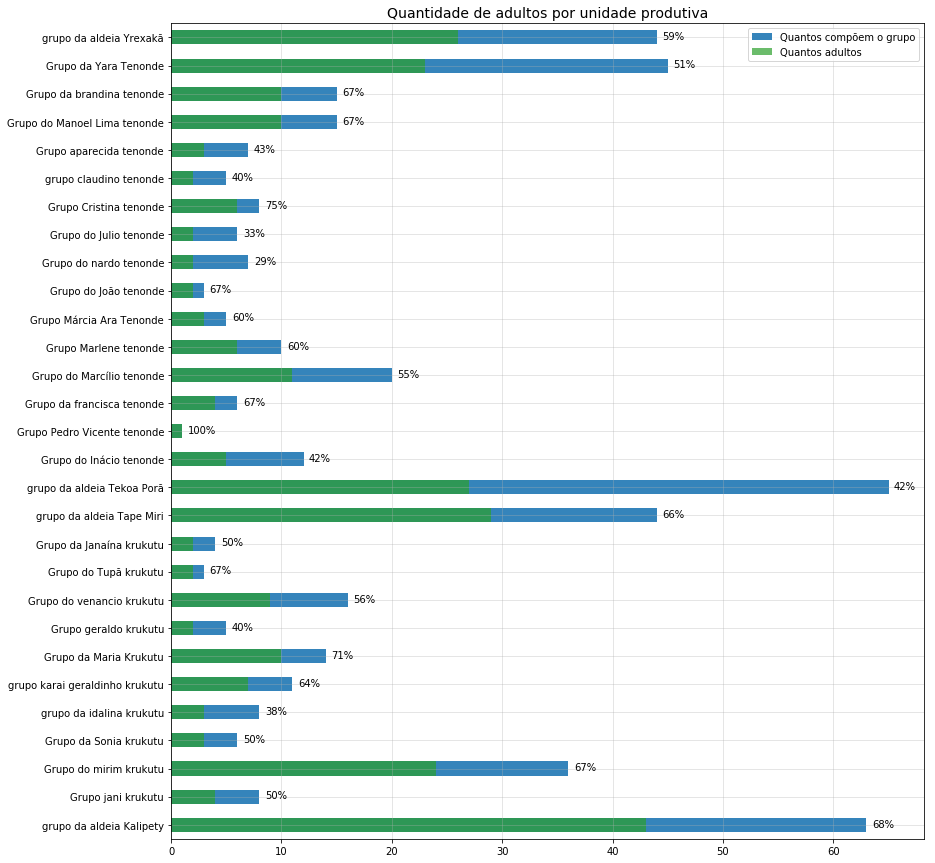

In [58]:
texts_values = df2.sort_values(by='Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].values
texts = df2.sort_values(by='Aldeia')['adultos'].values*100/df2.sort_values(by='Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].values


fig, ax = plt.subplots(figsize=(13.5,15))
df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'Caracterização do grupo/Quantos compõem o grupo', ax=ax, alpha=.9, color='tab:blue', label='Quantos compõem o grupo')

patches = df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'adultos',ax=ax, alpha=.7,  label='Quantos adultos', color='tab:green')
for i in range(len(df2.sort_values(by='Aldeia')['Unidade_Produtiva'].values)):
    ax.text(texts_values[i]+.5, i-.07,str(int(np.round(texts[i])))+'%', color='black')
plt.ylabel('')
plt.grid(True, alpha=.4)
plt.title('Quantidade de adultos por unidade produtiva', fontsize=14)
plt.savefig('11.Adultos_UP.png', dpi=200, bbox_inches='tight')

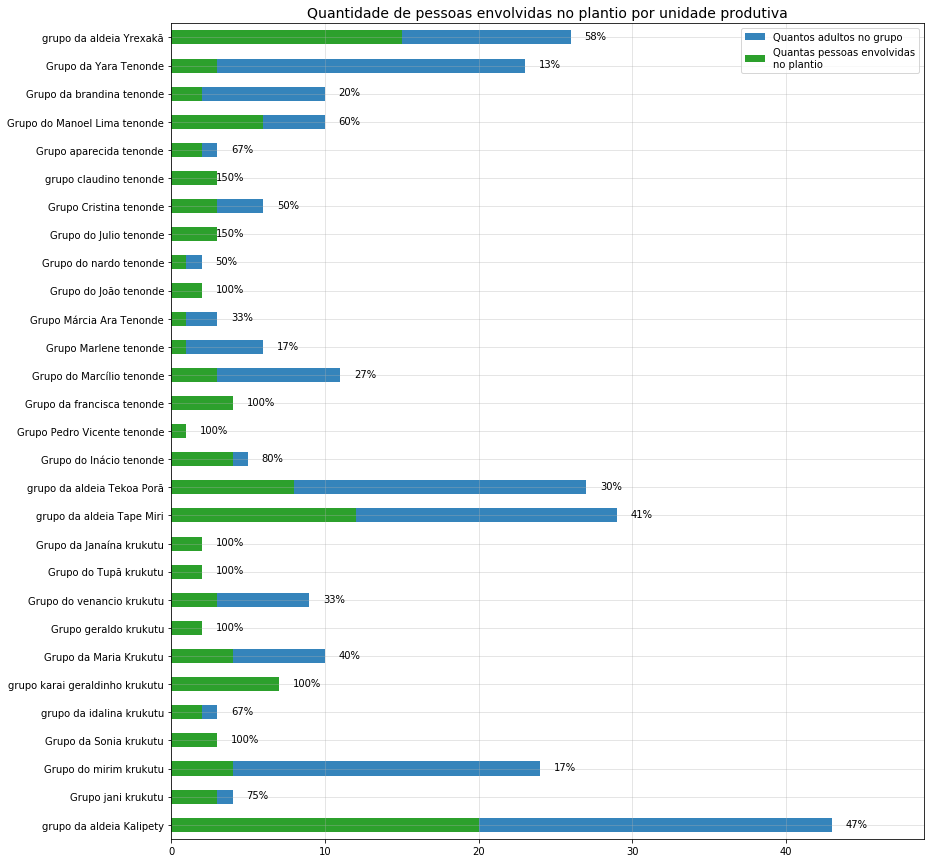

In [54]:
texts_values = df2.sort_values(by='Aldeia')['adultos'].values
texts = df2.sort_values(by='Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].values*100/df2.sort_values(by='Aldeia')['adultos'].values


fig, ax = plt.subplots(figsize=(13.5,15))
df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'adultos', ax=ax, alpha=.9, color='tab:blue', label='Quantos adultos no grupo')
df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas',ax=ax, alpha=1,  label='Quantas pessoas envolvidas\nno plantio', color='tab:green')
plt.ylabel('')
for i in range(len(df2.sort_values(by='Aldeia')['adultos'].values)):
    ax.text(texts_values[i]+.9, i-.07,str(int(np.round(texts[i])))+'%', color='black')
plt.grid(True, alpha=.4)
plt.xlim(0,49)
plt.title('Quantidade de pessoas envolvidas no plantio por unidade produtiva', fontsize=14)
plt.savefig('9.Plantio_UP.png', dpi=200, bbox_inches='tight')

In [683]:
df2.sort_values(by='Aldeia')['Plantio/Quantos mais velhos (mais de 60 anos)'].values

array([ 1., nan,  0., nan,  0., nan,  1.,  1.,  2., nan, nan,  2.,  1.,
        2.,  1., nan, nan,  1., nan, nan,  0., nan, nan,  0., nan,  0.,
        1.,  1.,  2.])

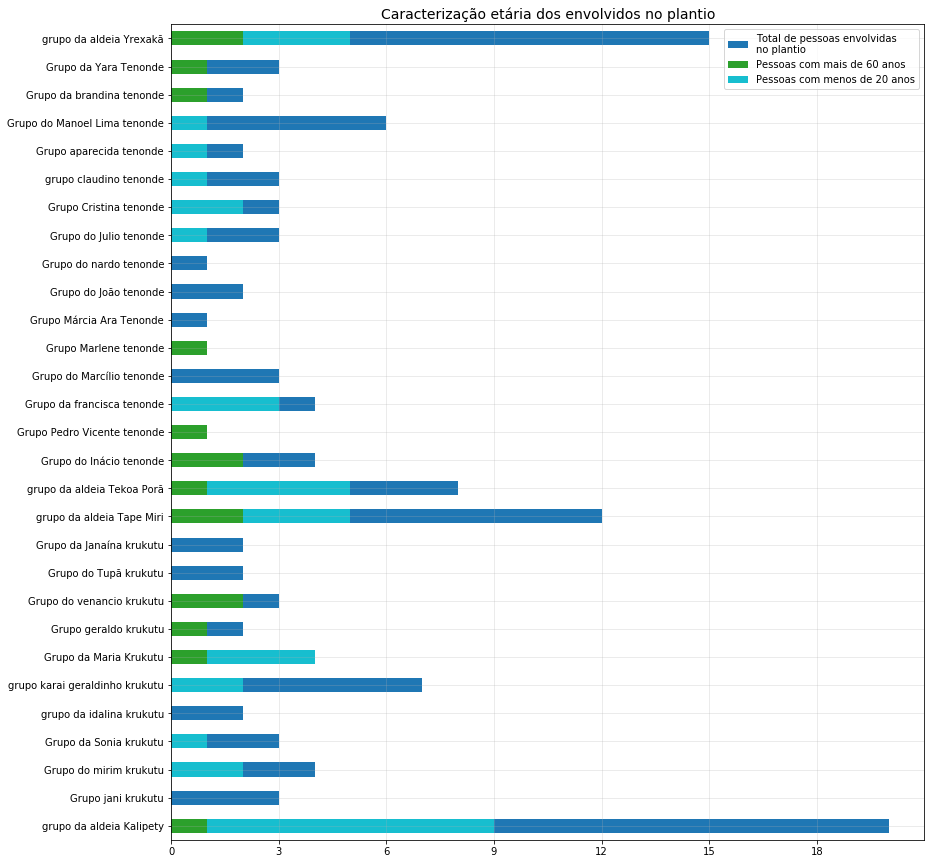

In [60]:
fig, ax = plt.subplots(figsize=(13.5,15))
df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas',ax=ax, alpha=1,  label='Total de pessoas envolvidas\nno plantio', color='tab:blue')
df2.sort_values(by='Aldeia').plot.barh(x = 'Unidade_Produtiva', y = ['Plantio/Quantos mais velhos (mais de 60 anos)', 'Plantio/Quantos jovens (até 20 anos)'], ax=ax, color=['tab:green', 'tab:cyan'], stacked=True, label=['Pessoas com mais de 60 anos', 'Pessoas com menos de 20 anos'])
plt.ylabel('')
plt.xticks(np.arange(0,20,3))
plt.grid(True, alpha=.3)
plt.title('Caracterização etária dos envolvidos no plantio', fontsize=14)

plt.savefig('13.Etaria_UP.png', dpi=200, bbox_inches='tight')


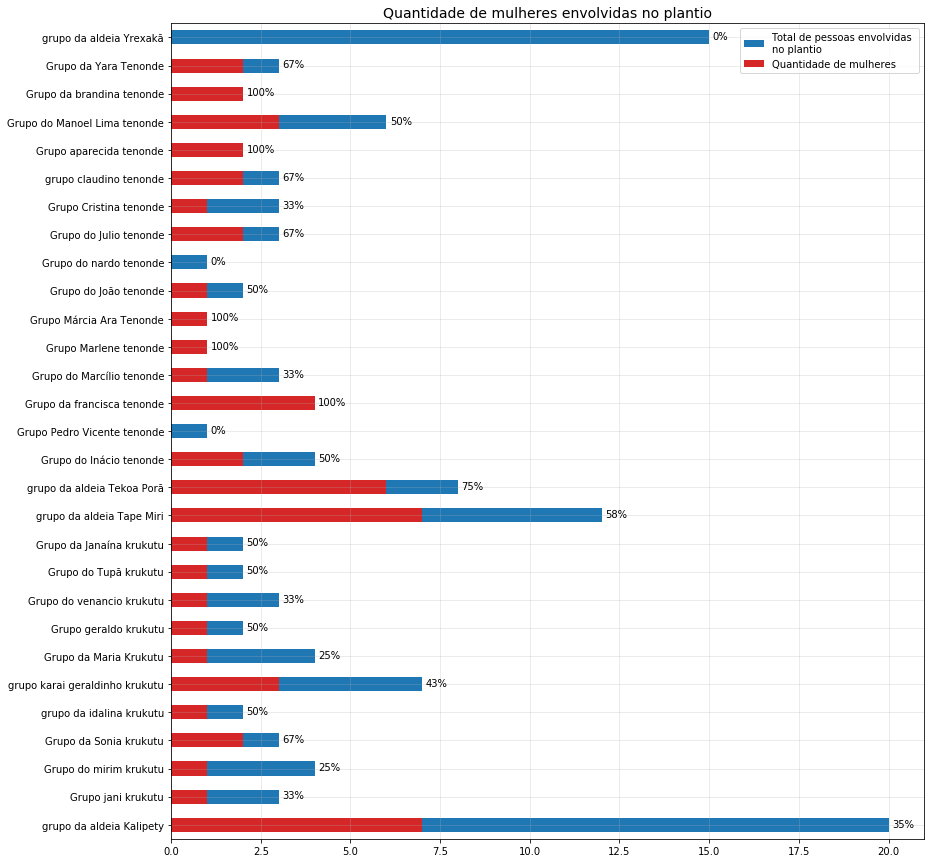

In [61]:
texts_values = df2.sort_values(by='Aldeia').fillna(0)['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].values
texts = df2.sort_values(by='Aldeia').fillna(0)['Plantio/Quantas mulheres'].values*100/df2.sort_values(by='Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].values

fig, ax = plt.subplots(figsize=(13.5,15))
df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas',ax=ax, alpha=1,  label='Total de pessoas envolvidas \nno plantio', color='tab:blue')
df2.sort_values(by='Aldeia').plot.barh(x = 'Unidade_Produtiva', y = 'Plantio/Quantas mulheres', ax=ax, label='Quantidade de mulheres', color='tab:red')
plt.ylabel('')

for i in range(len(df2.sort_values(by='Aldeia')['Unidade_Produtiva'].values)):
    ax.text(texts_values[i]+.1, i-.07,str(int(np.round(texts[i])))+'%', color='black')
plt.title('Quantidade de mulheres envolvidas no plantio', fontsize=14)
plt.grid(True, alpha=.3)

plt.savefig('14.Mulheres_UP.png', dpi=200, bbox_inches='tight')

In [ ]:
df2.sort_values(by='Aldeia').plot.barh('Unidade_Produtiva', 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas',ax=ax, alpha=1,  label='Quantas pessoas envolvidas\nno plantio', color='tab:red')




In [740]:
texts_values

array([43, 66, 29, 27, 90, 26])

In [750]:
text

6

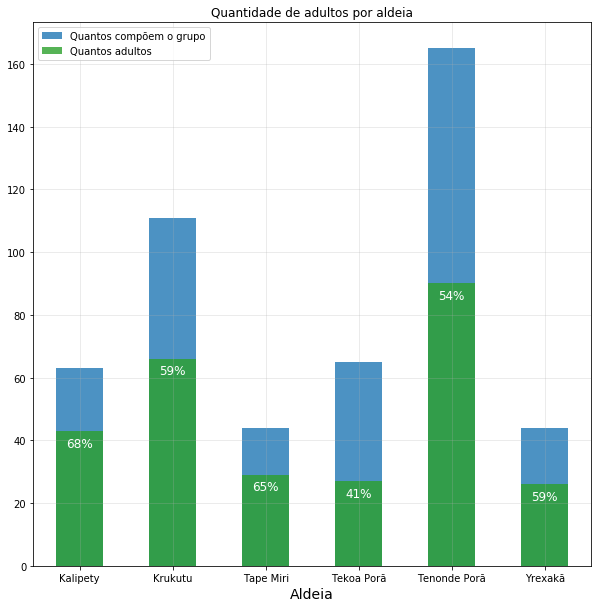

In [59]:
texts_values = df2.sort_values(by='Aldeia').fillna(0).groupby('Aldeia')['adultos'].sum().values
texts = (texts_values*100/df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().values).astype(int)


fig, ax = plt.subplots(figsize=(10,10))
df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().plot.bar(rot=0, ax=ax, alpha=.8, label='Quantos compõem o grupo')
df2.sort_values(by='Aldeia').groupby('Aldeia')['adultos'].sum().plot.bar(rot=0, ax=ax, alpha=.8, color='tab:green', label='Quantos adultos')
plt.xlabel('Aldeia', fontsize=14)
plt.legend()
for i in range(len(texts_values)):
    ax.text(i,texts_values[i]-5, str(texts[i])+'%', horizontalalignment='center', color='white', fontsize=12)
plt.title('Quantidade de adultos por aldeia')
plt.grid(True, alpha=.3)
plt.savefig('12.adultos_aldeia.png', dpi=200, bbox_inches='tight')

In [ ]:
texts_values = df2.sort_values(by='Aldeia').fillna(0).groupby('Aldeia')['adultos'].sum().values
texts = (texts_values*100/df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().values).astype(int)


fig, ax = plt.subplots(figsize=(10,10))
df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().plot.bar(rot=0, ax=ax, alpha=.8, label='Quantos compõem o grupo')
df2.sort_values(by='Aldeia').groupby('Aldeia')['adultos'].sum().plot.bar(rot=0, ax=ax, alpha=.8, color='tab:green', label='Quantos adultos')
plt.xlabel('Aldeia', fontsize=14)
plt.legend()
for i in range(len(texts_values)):
    ax.text(i,texts_values[i]-5, str(texts[i])+'%', horizontalalignment='center', color='white', fontsize=12)
plt.title('Quantidade de adultos por aldeia')
plt.grid(True, alpha=.3)

In [ ]:
y = ['Plantio/Quantos mais velhos (mais de 60 anos)', 'Plantio/Quantos jovens (até 20 anos)'], ax=ax, color=['tab:green', 'tab:cyan'], stacked=True, label=['Pessoas com mais de 60 anos', 'Pessoas com mais de 20 anos'])





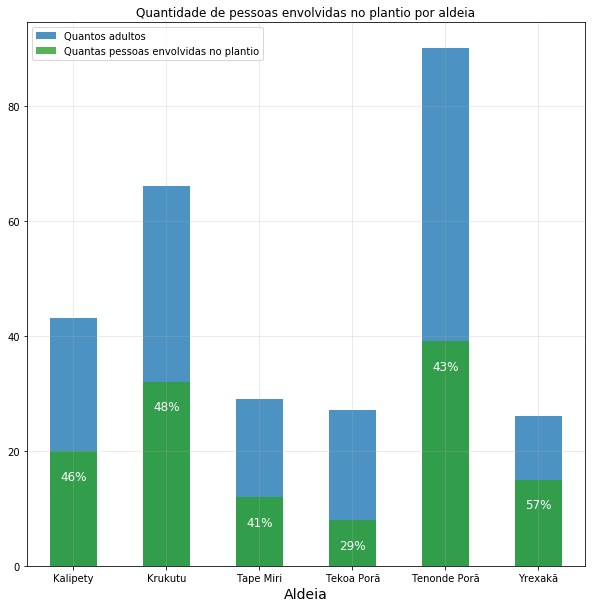

In [57]:
texts_values = df2.sort_values(by='Aldeia').fillna(0).groupby('Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].sum().values
texts = (texts_values*100/df2.sort_values(by='Aldeia').groupby('Aldeia')['adultos'].sum().values).astype(int)


fig, ax = plt.subplots(figsize=(10,10))
df2.sort_values(by='Aldeia').groupby('Aldeia')['adultos'].sum().plot.bar(rot=0, ax=ax, alpha=.8, label='Quantos adultos')
df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].sum().plot.bar(rot=0, ax=ax, alpha=.8, color='tab:green', label='Quantas pessoas envolvidas no plantio')
plt.xlabel('Aldeia', fontsize=14)
plt.legend()
for i in range(len(texts_values)):
    ax.text(i,texts_values[i]-5, str(texts[i])+'%', horizontalalignment='center', color='white', fontsize=12)
plt.title('Quantidade de pessoas envolvidas no plantio por aldeia')
plt.grid(True, alpha=.3)
plt.savefig('10.pessoas_plantio_aldeia.png', dpi=200, bbox_inches='tight')

In [ ]:

y = ['Plantio/Quantos mais velhos (mais de 60 anos)', 'Plantio/Quantos jovens (até 20 anos)'], ax=ax, color=['tab:green', 'tab:cyan'], stacked=True, label=['Pessoas com mais de 60 anos', 'Pessoas com mais de 20 anos'])

In [766]:
mais_velhos = df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantos mais velhos (mais de 60 anos)'].sum().values
novos = df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantos jovens (até 20 anos)'].sum().values

In [768]:
idade = pd.DataFrame(data={'aldeia':df2.sort_values(by='Aldeia').Aldeia.unique(), 'mais_velhos':mais_velhos, 'novos':novos})

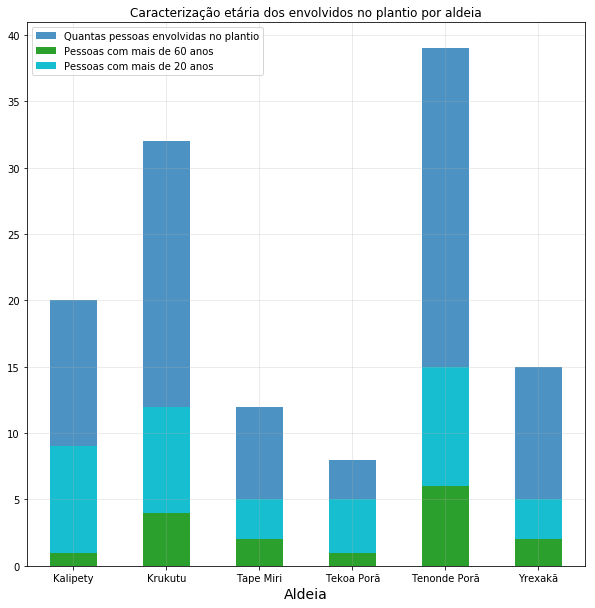

In [792]:
texts_values = df2.sort_values(by='Aldeia').fillna(0).groupby('Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].sum().values
texts = (texts_values*100/df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().values).astype(int)


fig, ax = plt.subplots(figsize=(10,10))
#df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().plot.bar(rot=0, ax=ax, alpha=.8, label='Quantos compõem o grupo')
df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].sum().plot.bar(rot=0, ax=ax, alpha=.8, color='tab:blue', label='Quantas pessoas envolvidas no plantio')
idade.plot.bar('aldeia', y=['mais_velhos','novos'], color=['tab:green', 'tab:cyan'],ax=ax, rot=0, stacked=True, label=['Pessoas com mais de 60 anos', 'Pessoas com mais de 20 anos'])

plt.xlabel('Aldeia', fontsize=14)
plt.legend()
'''for i in range(len(texts_values)):
    ax.text(i,texts_values[i]-5, str(texts[i])+'%', horizontalalignment='center', color='white', fontsize=12)'''
plt.title('Caracterização etária dos envolvidos no plantio por aldeia')
plt.grid(True, alpha=.3)
plt.savefig('estaria_aldeia.png', dpi=200, bbox_inches='tight')

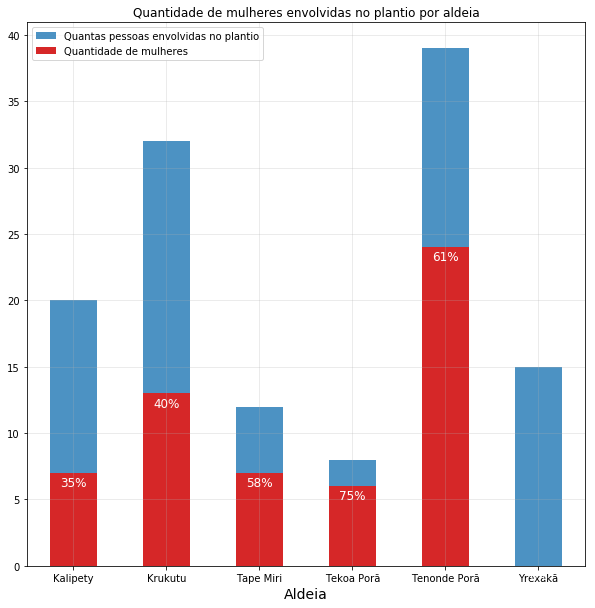

In [62]:
texts_values = df2.sort_values(by='Aldeia').fillna(0).groupby('Aldeia')['Plantio/Quantas mulheres'].sum().values
texts = (texts_values*100/df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].sum().values).astype(int)


fig, ax = plt.subplots(figsize=(10,10))
#df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().plot.bar(rot=0, ax=ax, alpha=.8, label='Quantos compõem o grupo')
df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas'].sum().plot.bar(rot=0, ax=ax, alpha=.8, color='tab:blue', label='Quantas pessoas envolvidas no plantio')
df2.sort_values(by='Aldeia').groupby('Aldeia')['Plantio/Quantas mulheres'].sum().plot.bar(color='tab:red',ax=ax, rot=0, label='Quantidade de mulheres')

plt.xlabel('Aldeia', fontsize=14)
plt.legend()
for i in range(len(texts_values)):
    ax.text(i,texts_values[i]-1, str(texts[i])+'%', horizontalalignment='center', color='white', fontsize=12)
plt.title('Quantidade de mulheres envolvidas no plantio por aldeia')
plt.grid(True, alpha=.3)
plt.savefig('15.mulheres_aldeia.png', dpi=200, bbox_inches='tight')

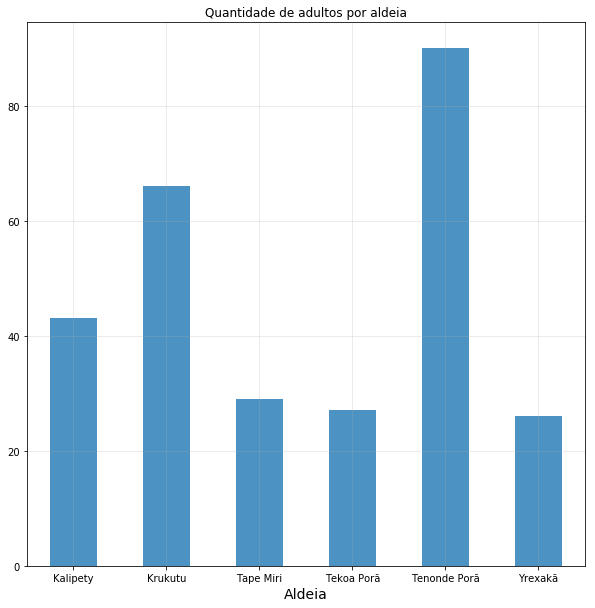

In [723]:
fig, ax = plt.subplots(figsize=(10,10))
df2.sort_values(by='Aldeia').groupby('Aldeia').adultos.sum().plot.bar(rot=0, ax=ax, alpha=.8)
plt.xlabel('Aldeia', fontsize=14)
plt.title('Quantidade de adultos por aldeia')
plt.grid(True, alpha=.3)
plt.savefig('Adultos_Aldeia.png', dpi=200, bbox_inches='tight')

In [222]:
(pd.DataFrame(df2['Plantio/Na última colheita, conseguiu garantir sementes para replantio e para troca com parentes?'].value_counts()).T*100/28)

Sim        Não
Plantio/Na última colheita, conseguiu garantir ...  57.142857  42.857143

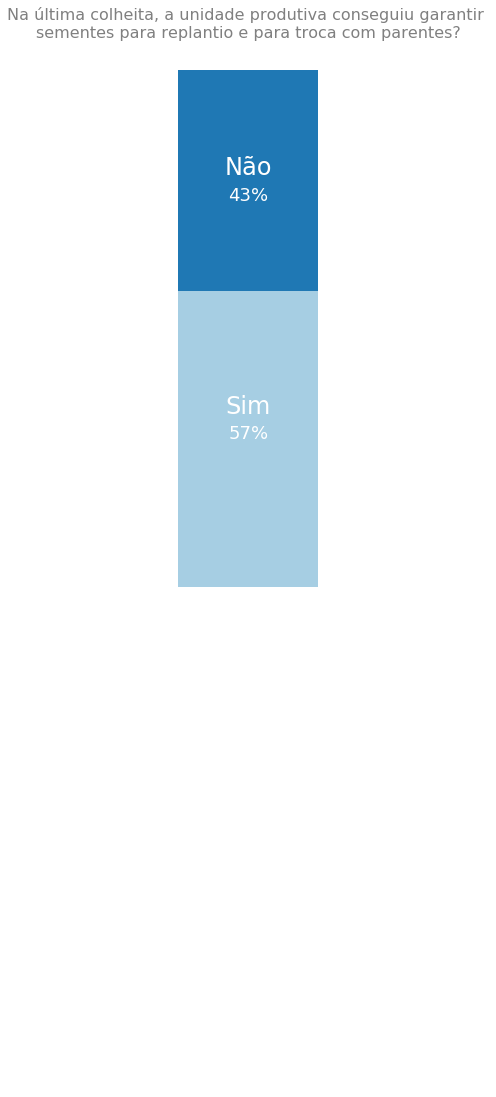

In [25]:
(pd.DataFrame(df2['Plantio/Na última colheita, conseguiu garantir sementes para replantio e para troca com parentes?'].value_counts()).T*100/28).plot.bar(stacked=True, figsize=(5,10), colors = cm.Paired(np.linspace(0,1,8)), legend=False)
plt.title('Na última colheita, a unidade produtiva conseguiu garantir \nsementes para replantio e para troca com parentes?', fontsize=16, color='gray')
plt.text(0, 57.14/2+5, 'Sim', color='white', fontsize=24, horizontalalignment='center')
plt.text(0, 57.14/2, '57%', color='white', fontsize=18, horizontalalignment='center')
plt.text(0, 57.14+35./2+5, 'Não', color='white', fontsize=24, horizontalalignment='center')
plt.text(0, 57.14+35/2, '43%', color='white', fontsize=18, horizontalalignment='center')
plt.axis('off')
plt.savefig('43.TrocaParentes.png', dpi=200, bbox_inches='tight')



In [175]:
for col in df2.columns:
    print(col)

start
end
today
deviceid
Nome do Grupo ou Família (unidade produtiva)
Aldeia
Data de hoje
Record your current location
_Record your current location_latitude
_Record your current location_longitude
_Record your current location_altitude
_Record your current location_precision
Caracterização do grupo/Quantos compõem o grupo
Caracterização do grupo/Quantos adultos
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por sexo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Homem
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Mulher
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por tipo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_ti

In [10]:
df2 = df2.rename(columns={'Plantio/O que acha que precisa para melhorar as roças?/adubo':'Mais adubo', \
                         'Plantio/O que acha que precisa para melhorar as roças?/calcário e outros insumos':'Calcários e outros insumos', \
                         'Plantio/O que acha que precisa para melhorar as roças?/cobertura vegetal':'Cobertura vegetal', \
                          'Plantio/O que acha que precisa para melhorar as roças?/cercado / tela':'Cercado ou tela', \
                          'Plantio/O que acha que precisa para melhorar as roças?/sistema de irrigação':'Sistemas de irrigação', \
                          'Plantio/O que acha que precisa para melhorar as roças?/aprender com os mais velhos':'Aprender com os mais velhos', \
                          'Plantio/O que acha que precisa para melhorar as roças?/melhor organização e participação coletiva no trabalho':'Aumentar a participação coletiva no trabalho', \
                          'Plantio/O que acha que precisa para melhorar as roças?/assitência técnica e formação':'Assistência técnica e de formação', \
                          'Plantio/O que acha que precisa para melhorar as roças?/ferramentas e máquinas':'Ferramentas e máquinas', \
                          'Plantio/O que acha que precisa para melhorar as roças?/casa de sementes (silo)':'Casa de sementes (silo)', \
                          'Plantio/O que acha que precisa para melhorar as roças?/adubação verde':'Mais adubo verde', \
                          'Plantio/O que acha que precisa para melhorar as roças?/valorizar mais o modo de vida tradicional':'Valorizar mais o modo de vida tradicional', \
                          'Plantio/O que acha que precisa para melhorar as roças?/intercâmbio para troca de sementes':'Intercâmbio de sementes', \
                          'Plantio/O que acha que precisa para melhorar as roças?/ter mais espaço para plantio':'Ter mais espaço pro plantio'})
                          
                          
                          
                          
                



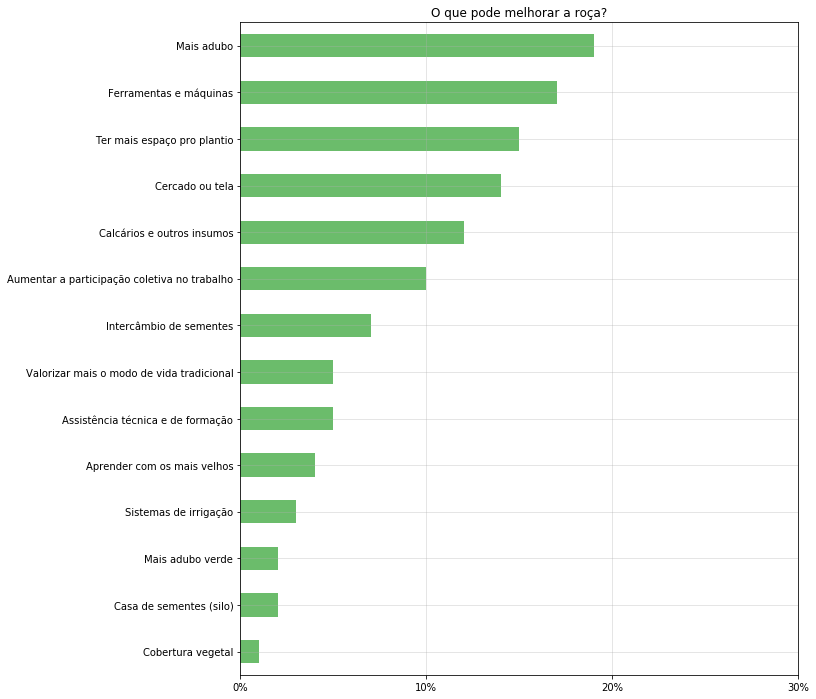

In [12]:
pd.DataFrame(df2.loc[:, 'Mais adubo':'Ter mais espaço pro plantio'].sum(axis=0)).sort_values(by=0).plot.barh(figsize=(10, 12), alpha=.7, color='tab:green', legend=False)
plt.xticks(np.arange(0,40,10), [i+'%' for i in np.arange(0,40,10).astype(str)])
plt.grid(True, alpha=.4)
plt.title('O que pode melhorar a roça?')
plt.savefig('50.Melhorar_Roca_total.png', dpi=200, bbox_inches='tight')

In [323]:
df_lucas.groupby('Unidade_Produtiva')['total'].sum()

Unidade_Produtiva
Grupo Cristina tenonde             0.0
Grupo Marlene tenonde              0.0
Grupo Márcia Ara Tenonde           1.0
Grupo Pedro Vicente tenonde        0.0
Grupo aparecida tenonde            2.0
Grupo da Janaína krukutu           2.0
Grupo da Maria Krukutu             1.0
Grupo da Sonia krukutu             1.0
Grupo da Yara Tenonde              8.0
Grupo da brandina tenonde          0.0
Grupo da francisca tenonde         1.0
Grupo do Inácio tenonde            1.0
Grupo do João tenonde              1.0
Grupo do Julio tenonde             1.0
Grupo do Manoel Lima tenonde       2.0
Grupo do Marcílio tenonde          6.0
Grupo do Tupã krukutu              2.0
Grupo do mirim krukutu             7.0
Grupo do nardo tenonde             0.0
Grupo do venancio krukutu          4.0
Grupo geraldo krukutu              0.0
Grupo jani krukutu                 1.0
grupo claudino tenonde             2.0
grupo da aldeia Kalipety          16.0
grupo da aldeia Tape Miri          9.0
grupo d

In [400]:
group[['adultos','escola', 'ceci', 'posto','agente', 'fora da aldeia','pessoas_no_plantio']].iloc[:,1:]



adultos  escola  escola  ceci  ceci  posto  agente  agente  fora da aldeia  \
1       26     NaN     NaN   NaN   NaN    1.0     8.0     8.0             NaN   

   pessoas_no_plantio  
1                  15

In [12]:
df2['escola'] = df2['Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual']
df2['ceci'] = df2['Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci']
df2['posto'] = df2['Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Posto de Saúde']
df2['agente'] = df2['Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Agente ambiental ou cultural']
df2['fora'] = df2['Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Emprego para não indígena fora da aldeia']
df2['outra_ocupacao'] = df2['Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Outro']
df2['outro'] = df2['Caracterização do grupo/Qual outro?']
df2['trabalho_roça'] = df2['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas']
df2['adultos'] = df2['Caracterização do grupo/Quantos adultos']

In [67]:
group[['escola','ceci', 'posto','agente', 'fora','trabalho_roça', 'adultos']]

escola  ceci  posto  agente  fora  trabalho_roça  adultos
1     NaN   NaN    1.0     8.0   NaN             15       26

In [66]:
trabalho= pd.DataFrame()
for name, group in df2.groupby('Aldeia'):
    trabalho[name] = group[['escola','ceci', 'posto','agente', 'fora','trabalho_roça', 'adultos']].fillna(0).sum(axis=0).values
trabalho= trabalho.T

In [68]:
trabalho

0     1    2    3    4     5     6
Kalipety      3.0   1.0  1.0  8.0  0.0  20.0  43.0
Krukutu       2.0  12.0  5.0  4.0  0.0  32.0  66.0
Tape Miri     0.0   0.0  0.0  9.0  0.0  12.0  29.0
Tekoa Porã    0.0   1.0  0.0  7.0  0.0   8.0  27.0
Tenonde Porã  7.0   7.0  4.0  6.0  0.0  39.0  90.0
Yrexakã       0.0   0.0  1.0  8.0  0.0  15.0  26.0

In [69]:
trabalho.columns = ['escola', 'ceci', 'posto', 'Agentes ambientais e culturais', 'fora', 'Adultos envolvidos no plantio', 'Quantidade total de adultos']


In [70]:
trabalho = trabalho.sort_values(by='Quantidade total de adultos', ascending=False)
trabalho['Equipamentos Públicos']= trabalho['escola']+trabalho['ceci']+trabalho['posto']

In [71]:
trabalho

escola  ceci  posto  Agentes ambientais e culturais  fora  \
Tenonde Porã     7.0   7.0    4.0                             6.0   0.0   
Krukutu          2.0  12.0    5.0                             4.0   0.0   
Kalipety         3.0   1.0    1.0                             8.0   0.0   
Tape Miri        0.0   0.0    0.0                             9.0   0.0   
Tekoa Porã       0.0   1.0    0.0                             7.0   0.0   
Yrexakã          0.0   0.0    1.0                             8.0   0.0   

              Adultos envolvidos no plantio  Quantidade total de adultos  \
Tenonde Porã                           39.0                         90.0   
Krukutu                                32.0                         66.0   
Kalipety                               20.0                         43.0   
Tape Miri                              12.0                         29.0   
Tekoa Porã                              8.0                         27.0   
Yrexakã                                15.0                         26.0   

              Equipamentos Públicos  
Tenonde Porã                   18.0  
Krukutu                        19.0  
Kalipety                        5.0  
Tape Miri                       0.0  
Tekoa Porã                      1.0  
Yrexakã                         1.0

In [72]:

trabalho = trabalho.rename(columns={'Equipamentos Públicos':'Trabalhando em euipamentos públicos\n(Escola estadual, CECI, Posto de saúde)'})

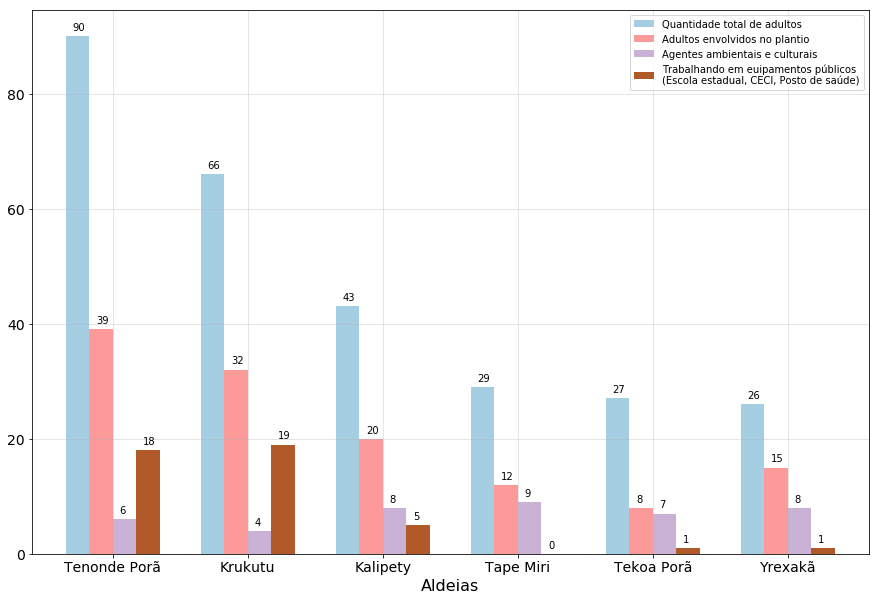

In [98]:
fig, ax = plt.subplots(figsize=(15,10))
ax = trabalho[['Quantidade total de adultos', 'Adultos envolvidos no plantio', 'Agentes ambientais e culturais','Trabalhando em euipamentos públicos\n(Escola estadual, CECI, Posto de saúde)']].plot.bar(ax=ax, rot=0, cmap='Paired', fontsize=14, width=.7)

ax.set_xlabel('Aldeias', fontsize=16)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x()+.05, p.get_height() +1), horizontalalignment='left')
plt.grid(True, alpha=.4)
plt.savefig('16.Adultos_aldeia.png', dpi=200, bbox_inches='tight')

In [468]:
trabalho

escola  ceci  posto  Agente ambiental ou cultural  fora  \
Tenonde Porã     7.0   7.0    4.0                           6.0   0.0   
Krukutu          2.0  12.0    5.0                           4.0   0.0   
Kalipety         3.0   1.0    1.0                           8.0   0.0   
Tape Miri        0.0   0.0    0.0                           9.0   0.0   
Tekoa Porã       0.0   1.0    0.0                           7.0   0.0   
Yrexakã          0.0   0.0    1.0                           8.0   0.0   

              Envolvidos no plantio  Quantidade total de adultos  \
Tenonde Porã                   39.0                         90.0   
Krukutu                        32.0                         66.0   
Kalipety                       20.0                         43.0   
Tape Miri                      12.0                         29.0   
Tekoa Porã                      8.0                         27.0   
Yrexakã                        15.0                         26.0   

              Equipamentos Públicos\n(Escola Estadual, CECI, Posto de saúde)  
Tenonde Porã                                               18.0               
Krukutu                                                    19.0               
Kalipety                                                    5.0               
Tape Miri                                                   0.0               
Tekoa Porã                                                  1.0               
Yrexakã                                                     1.0

In [52]:
df_trabalho = df2[['fora_roça', 'roça', 'agente']]
#df_trabalho['total'] = df_trabalho.loc[:, 'fora_roça':'agente'].sum(axis=1)

#df_trabalho['fora_roça'] = df_trabalho['fora_roça']*100/df_trabalho.total
#df_trabalho['roça'] = df_trabalho['roça']*100/df_trabalho.total
#df_trabalho['agente'] = df_trabalho['agente']*100/df_trabalho.total

In [55]:
df_trabalho['Aldeia'] = df2.Aldeia

/Users/leozeine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_trabalho.head()

fora_roça  roça  agente      Aldeia
0        1.0  15.0     7.0  Tekoa Porã
1        1.0  23.0     8.0     Yrexakã
2        0.0  21.0     9.0   Tape Miri
3        5.0  28.0     8.0    Kalipety
4        0.0   3.0     0.0     Krukutu

In [64]:
df_trabalho.columns = ['Adultos que trabalham fora da roça', 'Adultos que trabalham na roça', 'Agentes culturais ou ambientais', 'Aldeia']

In [76]:
cma = cm.Paired(np.linspace(0,1,8))

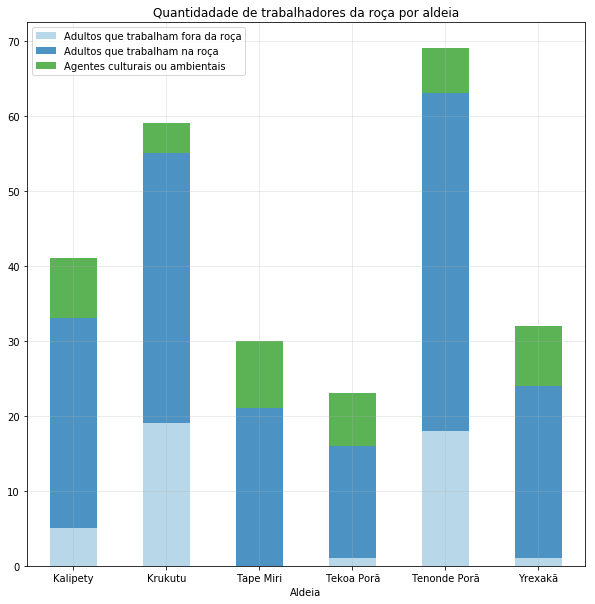

In [81]:
df_trabalho.groupby('Aldeia').sum().plot.bar(stacked=True, colors= cma, figsize=(10,10), rot=0, alpha=.8)
plt.grid(True, alpha=.3)
plt.title('Quantidadade de trabalhadores da roça por aldeia')
plt.savefig('Trabalhadores da aldeia.png', dpi=200)

In [85]:
df2[df2.Aldeia=='Tenonde Porã']['Caracterização do grupo/Quantos compõem o grupo']

14     7
15     7
16     5
17     8
18     6
19    15
20     3
21     5
22    10
23    20
24     6
25     1
26    12
27    15
28    45
Name: Caracterização do grupo/Quantos compõem o grupo, dtype: int64

In [ ]:
for name, group in df2.groupby('Aldeia'):
    fig, ax = plt.subplots()
    group.plot()
    
    

In [98]:
df2[df2.Unidade_Produtiva=='Grupo Pedro Vicente tenonde'][['Caracterização do grupo/Quantos compõem o grupo','Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas']]
                                                          
                                                          
                                                          

Caracterização do grupo/Quantos compõem o grupo  \
25                                                1   

    Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas  
25                                                  1

In [101]:
df2['Quantos compõem o grupo'] = df2['Caracterização do grupo/Quantos compõem o grupo']
df2['Quantas pessoas envolvidas no plantio'] = df2['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas']

In [110]:
df2.groupby('Aldeia')['Quantos compõem o grupo'].sum()

Aldeia
Kalipety         63
Krukutu         111
Tape Miri        44
Tekoa Porã       65
Tenonde Porã    165
Yrexakã          44
Name: Quantos compõem o grupo, dtype: int64

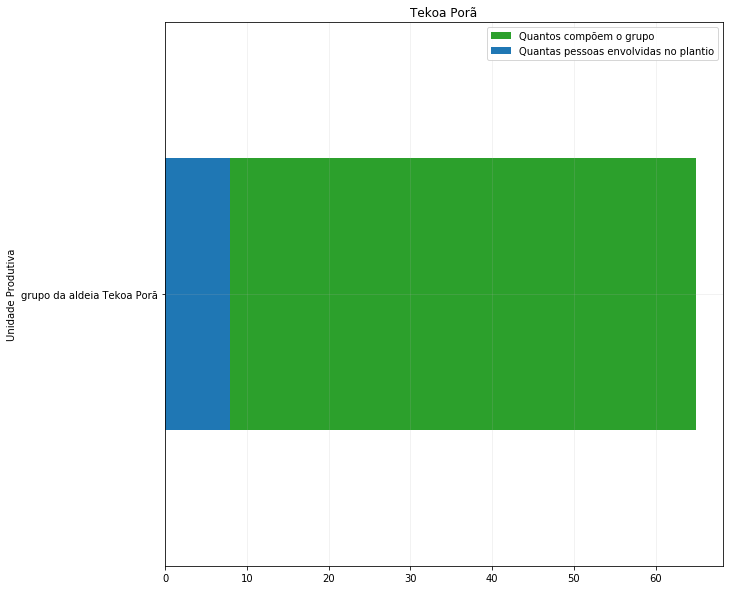

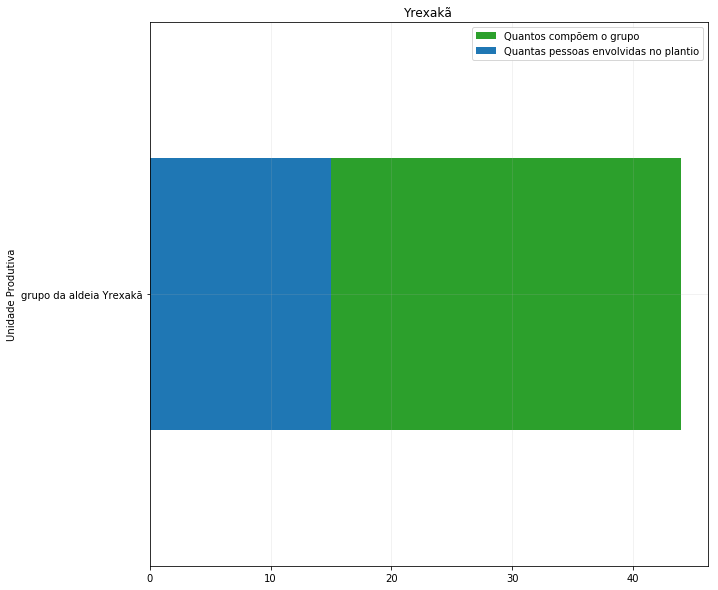

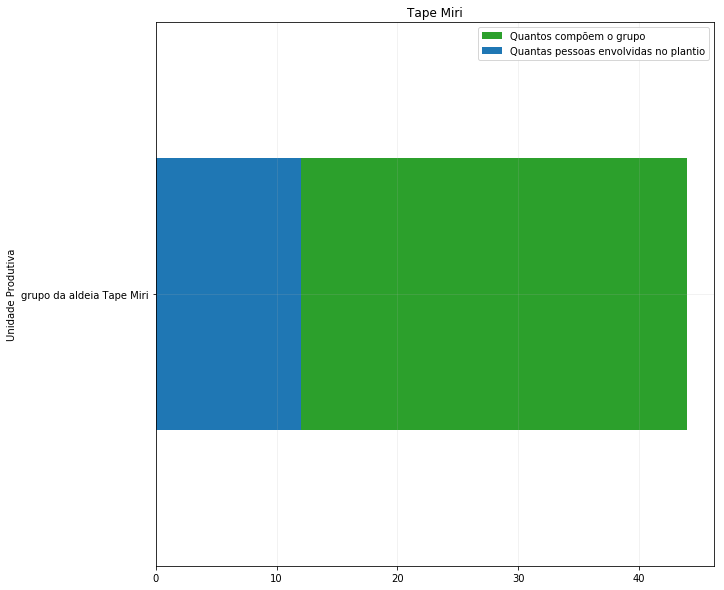

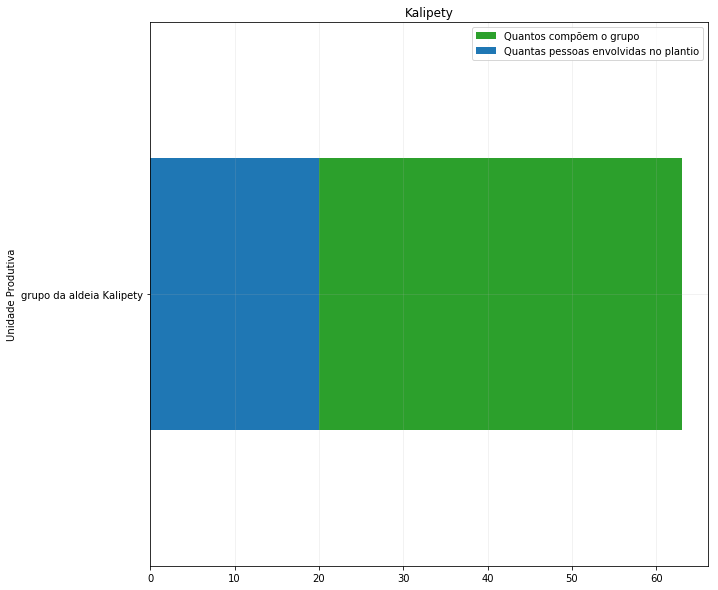

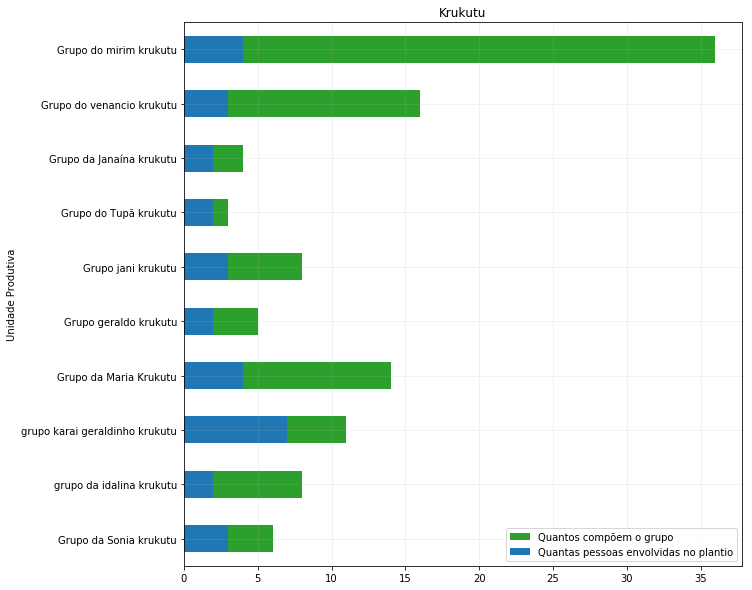

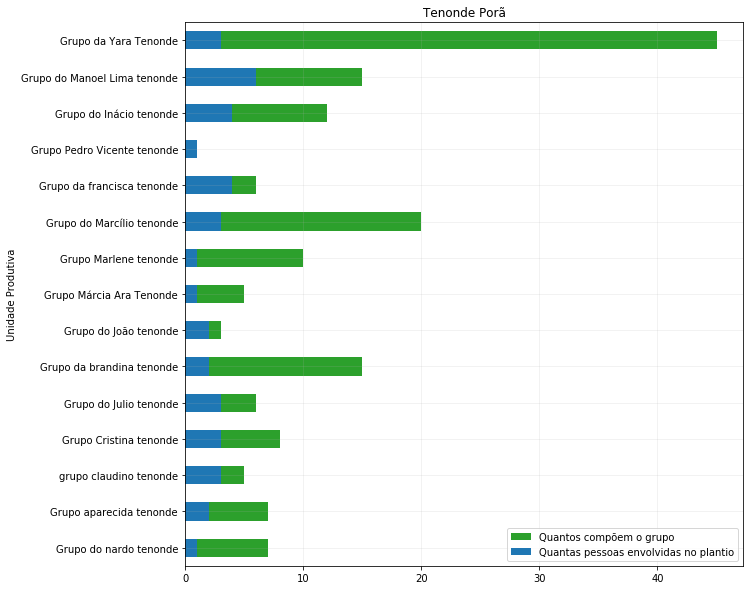

In [132]:
for aldeia in df2.Aldeia.unique():
    fig, ax = plt.subplots(figsize=(10,10))
    df2[df2.Aldeia==aldeia].plot.barh('Unidade_Produtiva','Quantos compõem o grupo', ax=ax, color='tab:green')
    df2[df2.Aldeia==aldeia].plot.barh('Unidade_Produtiva','Quantas pessoas envolvidas no plantio', ax=ax)
    #ax.barh(-1, 60, height=.5)
    #ax.set_ylim(-2, len(df2[df2.Aldeia==aldeia].Unidade_Produtiva.unique()))
    plt.ylabel('Unidade Produtiva')
    plt.grid(True, alpha=.2)
    if (aldeia!='Tekoa Porã' and aldeia!='Yrexakã' and aldeia!='Tape Miri' and aldeia!='Kalipety'):
        plt.savefig(aldeia+'roça.png', dpi=200, bbox_inches='tight')
    plt.title(aldeia)



In [158]:
df2.groupby('Aldeia')['Quantas pessoas envolvidas no plantio'].sum().values*100/df2.groupby('Aldeia')['Quantos compõem o grupo'].sum().values

array([31.74603175, 28.82882883, 27.27272727, 12.30769231, 23.63636364,
       34.09090909])

In [165]:
valores

array([31.74603175, 28.82882883, 27.27272727, 12.30769231, 23.63636364,
       34.09090909])

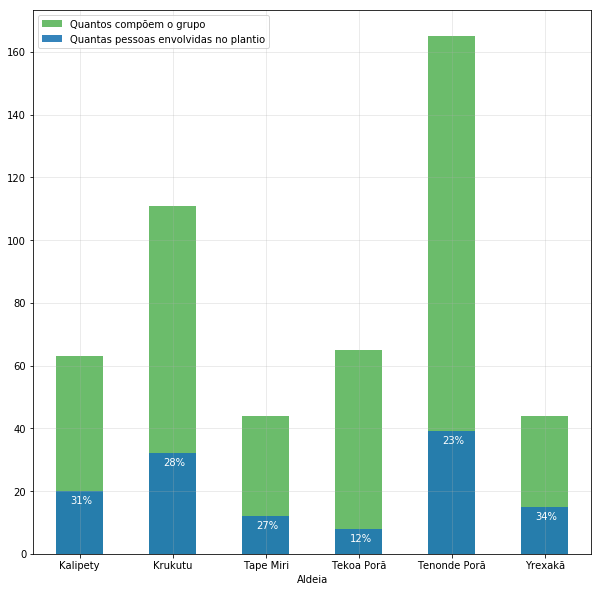

In [172]:
fig, ax = plt.subplots(figsize=(10,10))
df2.groupby('Aldeia')['Quantos compõem o grupo'].sum().plot.bar(ax=ax, color='tab:green', rot=0, label='Quantos compõem o grupo', alpha=.7)
plot2 = df2.groupby('Aldeia')['Quantas pessoas envolvidas no plantio'].sum().plot.bar(ax=ax, color='tab:blue', rot=0, label = 'Quantas pessoas envolvidas no plantio', alpha=.9)
plt.legend()
valores = df2.groupby('Aldeia')['Quantas pessoas envolvidas no plantio'].sum().values*100/df2.groupby('Aldeia')['Quantos compõem o grupo'].sum().values
for p in range(6):
    ax.annotate(str(int(valores[p]))+'%', (plot2.patches[p].get_x() +0.15, df2.groupby('Aldeia')['Quantas pessoas envolvidas no plantio'].sum()[p]-4), color='white')
plt.grid(True, alpha=.3)
plt.savefig('grupo_plantio.png', dpi=200, bbox_inches='tight')

In [ ]:
df2[df2.Aldeia=='Tenonde Porã']['Caracterização do grupo/Quantos compõem o grupo']

In [8]:
for col in df2.columns:
    print(col)

start
end
today
deviceid
Nome do Grupo ou Família (unidade produtiva)
Aldeia
Data de hoje
Record your current location
_Record your current location_latitude
_Record your current location_longitude
_Record your current location_altitude
_Record your current location_precision
Caracterização do grupo/Quantos compõem o grupo
Caracterização do grupo/Quantos adultos
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por sexo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Homem
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Mulher
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por tipo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_ti

In [27]:
values=[]
for name, group in df2.groupby('Aldeia'):
    values.append((group.loc[:, 'Plantio/Principal problema ou desafio no plantio/recuperar solo degradado':'Plantio/Principal problema ou desafio no plantio/falta de água'].sum(axis=0).values)*100/group.loc[:, 'Plantio/Principal problema ou desafio no plantio/recuperar solo degradado':'Plantio/Principal problema ou desafio no plantio/falta de água'].sum(axis=0).values.sum())
    
probs = pd.DataFrame(values)
probs.index=df2.groupby('Aldeia').groups.keys()
probs.columns = ['Recuperar solo degradado', 'Falta de espaço', 'Falta de organização coletiva', 'Falta de conhecimento/interesse dos jovens', 'Pouca disponibilidade de sementes, mudas e ramas', 'Ataque de animais', 'Falta de ferramentas e infraestrutura', 'Falta de água']

In [28]:
df2.groupby('Aldeia')['start'].count()

Aldeia
Kalipety         1
Krukutu         10
Tape Miri        1
Tekoa Porã       1
Tenonde Porã    15
Yrexakã          1
Name: start, dtype: int64

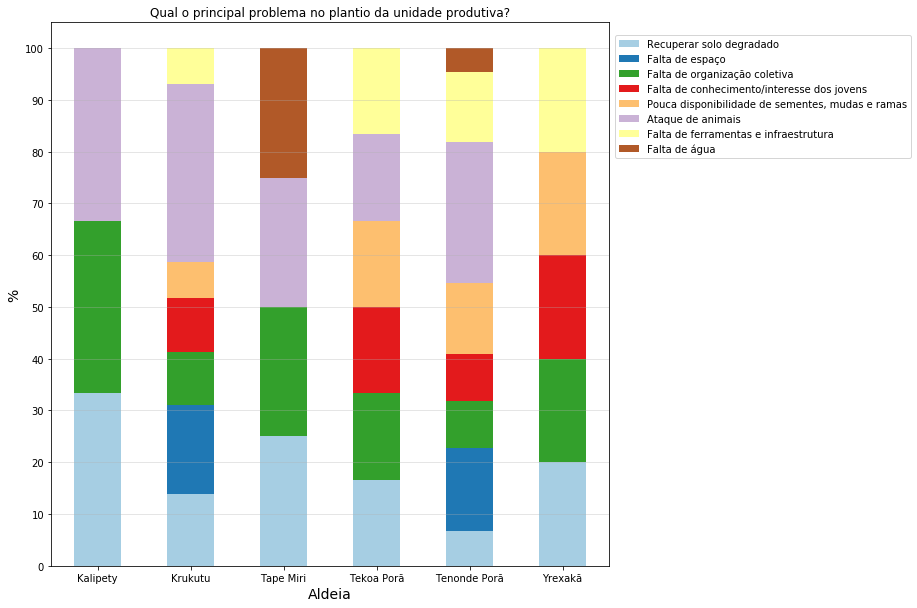

In [30]:
probs.plot.bar(stacked=True, rot=0, cmap='Paired', figsize=(10,10))
plt.legend(loc=(1.01,.75))
plt.xlabel('Aldeia', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.title('Qual o principal problema no plantio da unidade produtiva?')
plt.yticks(np.arange(0,110,10))
plt.grid(True, alpha=.4, axis='y')
plt.savefig('44a.problema.png', dpi=200, bbox_inches='tight')

In [279]:
probs['total'] = probs.sum(axis=1)

In [280]:
probs = probs/probs['total'].values

ValueError: Unable to coerce to Series, length must be 9: given 6

In [275]:
probs

Ataque de animais  Falta de conhecimento/interesse dos jovens  \
Kalipety                    NaN                                         NaN   
Krukutu                     NaN                                         NaN   
Tape Miri                   NaN                                         NaN   
Tekoa Porã                  NaN                                         NaN   
Tenonde Porã                NaN                                         NaN   
Yrexakã                     NaN                                         NaN   

              Falta de espaço  Falta de ferramentas e infraestrutura  \
Kalipety                  NaN                                    NaN   
Krukutu                   NaN                                    NaN   
Tape Miri                 NaN                                    NaN   
Tekoa Porã                NaN                                    NaN   
Tenonde Porã              NaN                                    NaN   
Yrexakã                   NaN                                    NaN   

              Falta de organização coletiva  Falta de água  Kalipety  Krukutu  \
Kalipety                                NaN            NaN       NaN      NaN   
Krukutu                                 NaN            NaN       NaN      NaN   
Tape Miri                               NaN            NaN       NaN      NaN   
Tekoa Porã                              NaN            NaN       NaN      NaN   
Tenonde Porã                            NaN            NaN       NaN      NaN   
Yrexakã                                 NaN            NaN       NaN      NaN   

              Pouca disponibilidade de sementes, mudas e ramas  \
Kalipety                                                   NaN   
Krukutu                                                    NaN   
Tape Miri                                                  NaN   
Tekoa Porã                                                 NaN   
Tenonde Porã                                               NaN   
Yrexakã                                                    NaN   

              Recuperar solo degradado  Tape Miri  Tekoa Porã  Tenonde Porã  \
Kalipety                           NaN        NaN         NaN           NaN   
Krukutu                            NaN        NaN         NaN           NaN   
Tape Miri                          NaN        NaN         NaN           NaN   
Tekoa Porã                         NaN        NaN         NaN           NaN   
Tenonde Porã                       NaN        NaN         NaN           NaN   
Yrexakã                            NaN        NaN         NaN           NaN   

              Yrexakã  total  
Kalipety          NaN    NaN  
Krukutu           NaN    NaN  
Tape Miri         NaN    NaN  
Tekoa Porã        NaN    NaN  
Tenonde Porã      NaN    NaN  
Yrexakã           NaN    NaN

In [7]:
df2['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas']

0      8
1     15
2     12
3     20
4      3
5      2
6      7
7      4
8      2
9      3
10     2
11     2
12     3
13     4
14     1
15     2
16     3
17     3
18     3
19     2
20     2
21     1
22     1
23     3
24     4
25     1
26     4
27     6
28     3
Name: Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas, dtype: int64

In [84]:
df2['Condições de vida na aldeia/A falta de espaço é um problema na aldeia?'].value_counts()

Sim              16
Não              11
Mais ou menos     2
Name: Condições de vida na aldeia/A falta de espaço é um problema na aldeia?, dtype: int64

In [87]:
df2['grupos_names2'] = grupos_names2

In [123]:
labels2 = []
for i in df2.groupby('Condições de vida na aldeia/A falta de espaço é um problema na aldeia?').Unidade_Produtiva.unique().values:
    labels2.append((i+np.repeat('\n ', len(i))).sum())
labels2[0] = '\n '+labels2[0]
labels2[1] = '\n '+labels2[1]

In [98]:
df2.grupos_names2 = df2.grupos_names2.replace(['Grupo da Sônia'], ['  Grupo da Sônia'])

In [122]:
df2.Unidade_Produtiva = df2.Unidade_Produtiva.replace(['Grupo da Sonia krukutu'], [' Grupo da Sonia krukutu'])

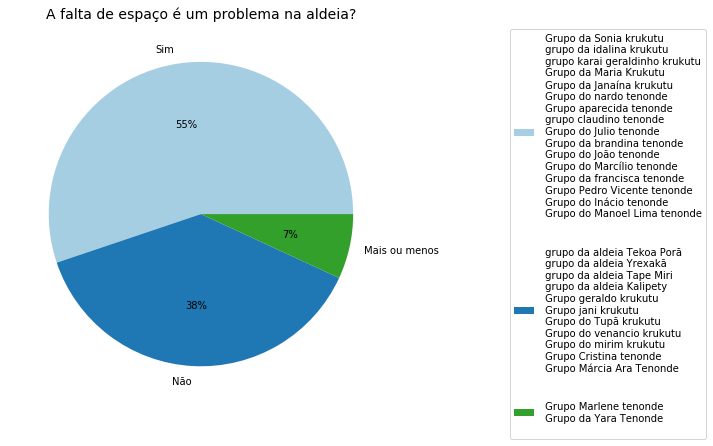

In [127]:
plt.subplots(figsize=(7,7))
df2['Condições de vida na aldeia/A falta de espaço é um problema na aldeia?'].value_counts().plot.pie(subplots=True, colors = cm.Paired(np.linspace(0,1,8)), autopct='%1.f%%', labels=['Sim', 'Não', 'Mais ou menos'])
plt.ylabel('')
plt.legend(labels=[labels2[2], labels2[1], labels2[0]], bbox_to_anchor=(1.3, 1))
plt.title('A falta de espaço é um problema na aldeia?', fontsize=14)
plt.savefig('Falta_de_espaço.png', dpi=200, bbox_inches='tight')

In [15]:
df = pd.read_csv('Unidade_Produtiva_Guarani - all versions - labels - 2019-12-23-18-45-22.csv', sep=';')

In [6]:
df.shape

(29, 254)

In [7]:
df.Aldeia.unique()

array(['TekoaP', 'Yyrexaka', 'TapeMiri', 'Kalipety', 'Krukutu', 'Tenonde'],
      dtype=object)

In [8]:
df = df.rename(columns = {'Tem_demanda_de_insumos_ou_infr/adubo':'Adubo', \
                         'Tem_demanda_de_insumos_ou_infr/calc_rio':'Calcário', \
                         'Tem_demanda_de_insumos_ou_infr/cobertura_vegetal':'Cobertura Vegetal', \
                         'Tem_demanda_de_insumos_ou_infr/cercado':'Cercado',
                          'Tem_demanda_de_insumos_ou_infr/sistema_de_irriga_o':'Sistem de Irrigação', \
                         'Tem_demanda_de_insumos_ou_infr/aprender_com_os_mais_velhos':'Aprender com os mais velhos', \
                          'Tem_demanda_de_insumos_ou_infr/melhor_organiza_o_de_trabalho':'Melhor organização e \nparticipação coletiva\nno trabalho', \
                         'Tem_demanda_de_insumos_ou_infr/assit_ncia_t_cnica_e_forma_o':'Assistência técnica e formação',\
                          'Tem_demanda_de_insumos_ou_infr/ferramentas_e_m_quinas':'Ferramentas e máquinas', \
                         'Tem_demanda_de_insumos_ou_infr/casa_de_sementes__silo':'Casa de semente', \
                          'Tem_demanda_de_insumos_ou_infr/aduba_o_verde':'Adubação verde', \
                         'Tem_demanda_de_insumos_ou_infr/valorizar_mais_o_modo_de_vida_':'Valorizar mais o modo de vida tradicional',\
                          'Tem_demanda_de_insumos_ou_infr/interc_mbio_para_troca_de_seme':'Intercâmbio para troca de sementes', \
                         'Tem_demanda_de_insumos_ou_infr/ter_mais_espa_':'Ter mais espaço para plantio'} )
                          

In [9]:
df_melhor = df.loc[:, 'Adubo':'Ter mais espaço para plantio']
df_melhor['Aldeia'] = df.Aldeia
df_melhor['Unidade_Produtiva'] = df.Unidade_Produtiva

In [10]:
df.groupby('Aldeia').start.count().values.reshape(6,1)

array([[ 1],
       [10],
       [ 1],
       [ 1],
       [15],
       [ 1]])

In [11]:
df_t = (df_melhor.groupby('Aldeia').sum()*100/df.groupby('Aldeia').start.count().values.reshape(6,1))
df_t[(df_t.index=='Krukutu') | (df_t.index=='Tenonde')]

Adubo   Calcário  Cobertura Vegetal  Cercado  \
Aldeia                                                      
Krukutu  70.000000  50.000000                0.0     30.0   
Tenonde  53.333333  33.333333                0.0     60.0   

         Sistem de Irrigação  Aprender com os mais velhos  \
Aldeia                                                      
Krukutu                  0.0                    20.000000   
Tenonde                  0.0                     6.666667   

         Melhor organização e \nparticipação coletiva\nno trabalho  \
Aldeia                                                               
Krukutu                                               40.0           
Tenonde                                               20.0           

         Assistência técnica e formação  Ferramentas e máquinas  \
Aldeia                                                            
Krukutu                       30.000000               60.000000   
Tenonde                        6.666667               53.333333   

         Casa de semente  Adubação verde  \
Aldeia                                     
Krukutu             10.0        0.000000   
Tenonde              0.0        6.666667   

         Valorizar mais o modo de vida tradicional  \
Aldeia                                               
Krukutu                                       10.0   
Tenonde                                       20.0   

         Intercâmbio para troca de sementes  Ter mais espaço para plantio  
Aldeia                                                                     
Krukutu                           30.000000                     50.000000  
Tenonde                           26.666667                     66.666667

In [16]:
df = df.rename(columns = {'Por_que_o_plantio_importante/garantir_alimento_saud_vel':'Garantir alimento saudável', \
                         'Por_que_o_plantio_importante/modo_de_fortalecer_os_saberes_':'Modo de fortalecer os saberes e práticias tradicionais\n(nhandereko/cultura guarani)',\
                          'Por_que_o_plantio_importante/circular_conhecimentos_entre_g':'Circular conhecimentos entre gerações', \
                          'Por_que_o_plantio_importante/mostrar_pros_n_o_ind_genas_a_r':'Mostrar para os não indígenas a resistência no território', \
                          'Por_que_o_plantio_importante/possibilidade_de_gerar_renda':'Possibilidade de gerar renda', \
                          'Por_que_o_plantio_importante/autonomia___soberania_alimenta':'Alcançar maior autonomia'}
                        
              )

In [17]:
df_impor = df[['Garantir alimento saudável', 'Modo de fortalecer os saberes e práticias tradicionais\n(nhandereko/cultura guarani)', \
  'Circular conhecimentos entre gerações', 'Mostrar para os não indígenas a resistência no território', 'Possibilidade de gerar renda','Alcançar maior autonomia' ]]
df_impor['Aldeia'] = df.Aldeia
df_impor['Unidade_Produtiva'] = df.Unidade_Produtiva





/Users/leozeine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/leozeine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
df_impor.groupby('Aldeia').sum().sum(axis=1).values.reshape(6,1)

array([[ 3],
       [23],
       [ 3],
       [ 3],
       [32],
       [ 3]])

In [24]:
a

Garantir alimento saudável  \
Aldeia                                 
Kalipety                           1   
Krukutu                            8   
TapeMiri                           1   
TekoaP                             1   
Tenonde                            9   
Yyrexaka                           1   

          Modo de fortalecer os saberes e práticias tradicionais\n(nhandereko/cultura guarani)  \
Aldeia                                                                                            
Kalipety                                                  1                                       
Krukutu                                                   6                                       
TapeMiri                                                  1                                       
TekoaP                                                    1                                       
Tenonde                                                  10                                       
Yyrexaka                                                  1                                       

          Circular conhecimentos entre gerações  \
Aldeia                                              
Kalipety                                        0   
Krukutu                                         5   
TapeMiri                                        0   
TekoaP                                          1   
Tenonde                                         6   
Yyrexaka                                        1   

          Mostrar para os não indígenas a resistência no território  \
Aldeia                                                                    
Kalipety                                                  0               
Krukutu                                                   0               
TapeMiri                                                  0               
TekoaP                                                    0               
Tenonde                                                   2               
Yyrexaka                                                  0               

          Alcançar maior autonomia  
Aldeia                               
Kalipety                          1  
Krukutu                           4  
TapeMiri                          1  
TekoaP                            0  
Tenonde                           5  
Yyrexaka                          0

In [39]:
a = df_impor.groupby('Aldeia').sum()
#a = a.drop(['Possibilidade de gerar renda'], axis=1)

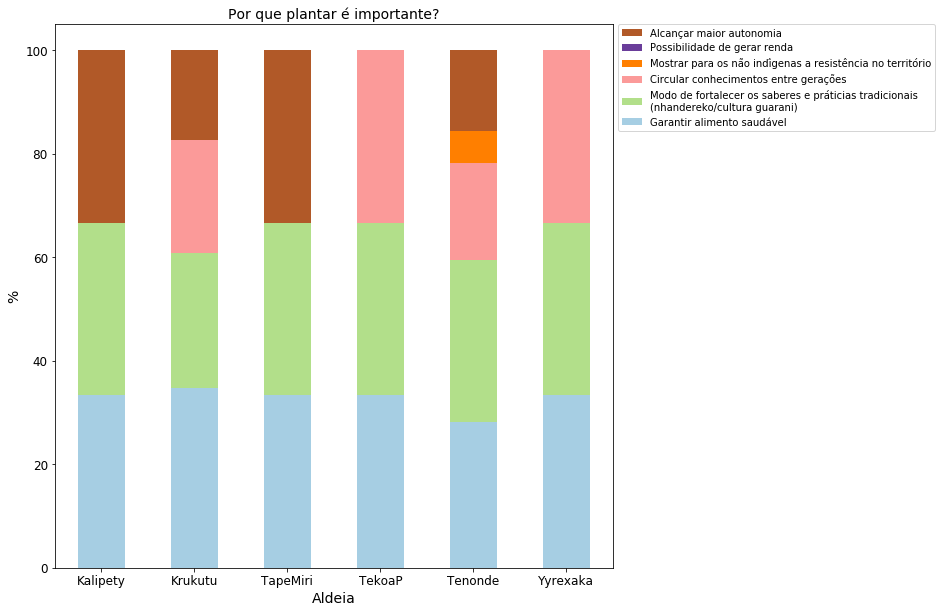

In [43]:
plot2 = pd.DataFrame(a*100/df_impor.groupby('Aldeia').sum().sum(axis=1).values.reshape(6,1)).plot.bar(stacked='True', cmap='Paired', figsize=(10,10), rot=0, fontsize=12,color= cm.Paired(np.linspace(0,1,6)))
handles, labels = plot2.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1,1.01))
plt.ylabel('%', fontsize=14)
plt.xlabel('Aldeia', fontsize=14)
plt.title('Por que plantar é importante?', fontsize=14)
plt.savefig('56.Plantio_Importante.png', dpi=200, bbox_inches='tight')


In [71]:
supo

Possibilidade de gerar renda  \
0                           0.0   

   Mostrar para os não indígenas a resistência no território  \
0                                           2.985075               

   Alcançar maior autonomia  Circular conhecimentos entre gerações  \
0                   16.41791                                19.402985   

   Modo de fortalecer os saberes e práticias tradicionais\n(nhandereko/cultura guarani)  \
0                                          29.850746                                       

   Garantir alimento saudável  
0                   31.343284

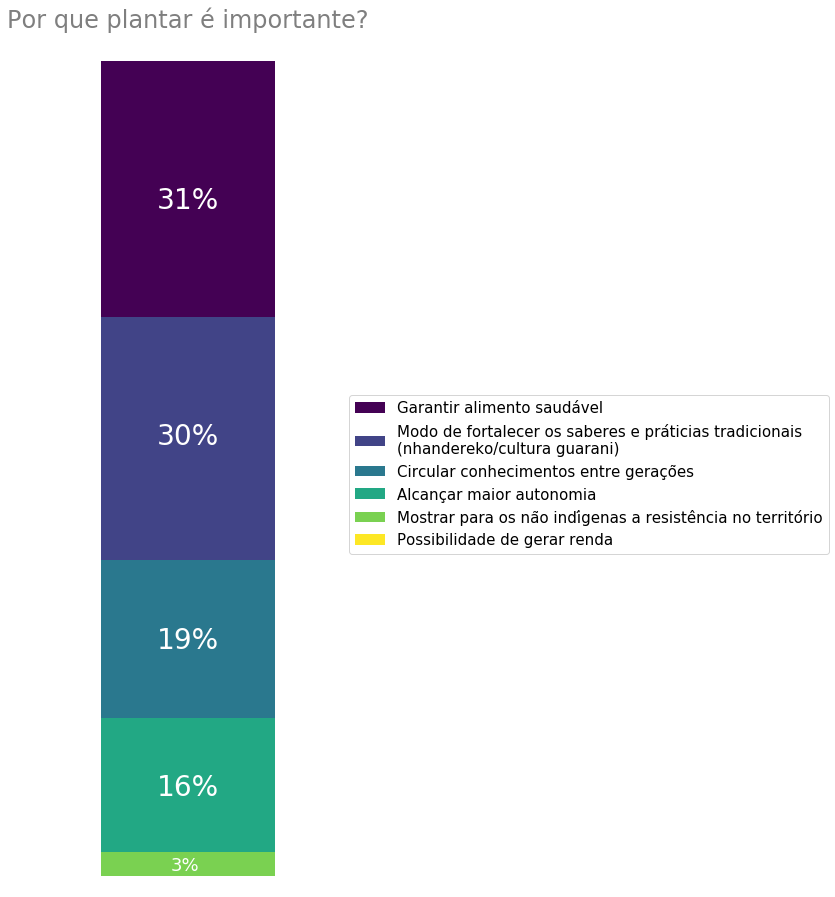

In [85]:
supo = pd.DataFrame(data=(df_impor.groupby('Aldeia').sum().sum(axis=0).values*100/df_impor.groupby('Aldeia').sum().sum(axis=0).values.sum()).reshape(1,6), columns=df_impor.groupby('Aldeia').sum().columns)
supo = supo.T.sort_values(by=0).T
plot2 = supo.plot.bar(stacked=True, figsize=(5,15), color= cm.viridis(np.linspace(0,1,6))[::-1], legend=False)
handles, labels = plot2.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1.05,.6), fontsize=15)
plt.xlim(-.4,.4)
plt.ylim(-0.01, 100)
plt.annotate(xy =(-0.09,82),s='31%', fontsize=28, color='white')
#plt.annotate(xy =(0.38,15.65),s='Para garantir uma alimentação saudável', fontsize=20, color='grey')

plt.annotate(xy =(-0.09,53),s='30%', fontsize=28, color='white')
#plt.annotate(xy =(.38,15.65*2+29.9/2),s='Modo de fortalecer os saberes e práticias tradicionais\n(nhandereko / cultura guarani)', fontsize=20, color='grey')

plt.annotate(xy =(-0.09,28),s='19%', fontsize=28, color='white')
#plt.annotate(xy =(.38,15.65*2+29.9/2*2+19.4/2),s='Mostar para os não indígenas \na resistência no território', fontsize=20, color='grey')


plt.annotate(xy =(-0.05,0.7),s='3%', fontsize=18, color='white')
#plt.annotate(xy =(.38,15.65*2+29.9/2*2+19.4/2*2+1),s='Circular alimentos entre gerações', fontsize=20, color='grey')

plt.annotate(xy =(-0.09,10),s='16%', fontsize=28, color='white')
#plt.annotate(xy =(.38,15.65*2+29.9/2*2+19.4/2*2+1.5*2+16.4/2),s='Alcançar maior autonomia', fontsize=20, color='grey')
plt.axis('off')
plt.title('Por que plantar é importante?\n', fontsize=24, alpha=.5, horizontalalignment='center')
#plt.annotate(xy =(.39, 115), s='Por que o plantio é importante?', fontsize=20, color='darkgrey')
plt.savefig('55.importante2.png', dpi=200, bbox_inches='tight')

In [284]:
colors =cm.get_cmap('Paired', 2)

In [14]:
df.Aldeia = df.Aldeia.replace(['TekoaP', 'Yyrexaka', 'TapeMiri', 'Kalipety', 'Krukutu', 'Tenonde'], \
                             ['Tekoa Porã', 'Yrexakã', 'Tape Mirim', 'Kalipety', 'Krukutu', 'Tenonde Porã'])

In [3]:
df.head()

start                            end       today  \
0  2019-11-28T11:11:22.960-03:00  2019-11-29T19:14:13.287-03:00  2019-11-27   
1  2019-11-28T11:22:34.820-03:00  2019-11-29T19:03:31.106-03:00  2019-11-27   
2  2019-11-28T11:32:22.527-03:00  2019-11-29T19:10:33.446-03:00  2019-11-27   
3  2019-11-28T11:42:08.878-03:00  2019-11-29T18:51:20.041-03:00  2019-11-27   
4  2019-12-04T08:46:12.592-03:00  2019-12-12T17:18:18.738-03:00  2019-12-04   

                                        deviceid           Unidade_Produtiva  \
0  ee.humanitarianresponse.info:i6GWM7S05KNmgalk  grupo da aldeia Tekoa Porã   
1  ee.humanitarianresponse.info:i6GWM7S05KNmgalk     grupo da aldeia Yrexakã   
2  ee.humanitarianresponse.info:i6GWM7S05KNmgalk   grupo da aldeia Tape Miri   
3  ee.humanitarianresponse.info:i6GWM7S05KNmgalk    grupo da aldeia Kalipety   
4                                355043091213455      Grupo da Sonia krukutu   

     Aldeia        Data                     Record_your_current_location  \
0    TekoaP  2019-11-12                        -23.849093 -46.647983 0 0   
1  Yyrexaka  2019-11-13      -23.935062498785555 -46.680181324481964 0 0   
2  TapeMiri  2019-11-14       -23.894203989766538 -46.63896130397916 0 0   
3  Kalipety  2019-11-18         -23.90111713204533 -46.6472343262285 0 0   
4   Krukutu  2019-12-04  -23.864789460785687 -46.6188033297658 763.0 4.5   

   _Record_your_current_location_latitude  \
0                              -23.849093   
1                              -23.935062   
2                              -23.894204   
3                              -23.901117   
4                              -23.864789   

   _Record_your_current_location_longitude  ...  \
0                               -46.647983  ...   
1                               -46.680181  ...   
2                               -46.638961  ...   
3                               -46.647234  ...   
4                               -46.618803  ...   

   O_que_vem_do_mundo_dos_jurua_q/outro           Qual_outro_009  \
0                                   0.0                      NaN   
1                                   1.0  turismo sem autorização   
2                                   1.0        governo bolsonaro   
3                                   1.0                   Escola   
4                                   0.0                      NaN   

   Como_avaliam_a_impor_ue_dependem_da_terra  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          0   

                                           Explica_o  \
0  A aldeia foi fundada no contexto das conquista...   
1  Essa aldeia foi reocupada no contexto do proce...   
2  Foi uma luta que ajudou a estarem nessa nova a...   
3  A aldeia e mais espaço pra plantio são conquis...   
4  Pelo fato de ainda estar na aldeia krukutu não...   

                                   Plantio_no_futuro       _id  \
0  Que todos trabalhem coletivamente de verdade p...  76180486   
1  Crescer a população da aldeia para fortalecer,...  76182978   
2  estudar para se defender depois, lutar dentro ...  76185571   
3          [ver reflexão extensa em relatório final]  76194425   
4   galinheiro maior. Plantar mais milho e mandioca.  76933388   

                                  _uuid     _submission_time  \
0  ee96d79a-93f4-477a-a87a-4b39a33bd5b0  2019-11-28T14:22:41   
1  4422d410-9610-4a43-9bff-fe693b0514fc  2019-11-28T14:32:32   
2  92982a58-d067-4726-b83d-17cf9fa7eb85  2019-11-28T14:42:16   
3  a1be7c3e-9560-4d35-a00b-71f6e44d6680  2019-11-28T15:20:12   
4  cee9d0ce-3be0-44a3-b77b-33cfc924849f  2019-12-04T20:24:23   

   _validation_status  _index  
0            Approved       1  
1            Approved       2  
2            Approved       3  
3            Approved       4  
4                 NaN       5  

[5 rows x 254 columns]

In [355]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
y = [0.69,0.48,.42,.36,0.06,0] 

(0.0, 1.0, -0.05, 0.8)

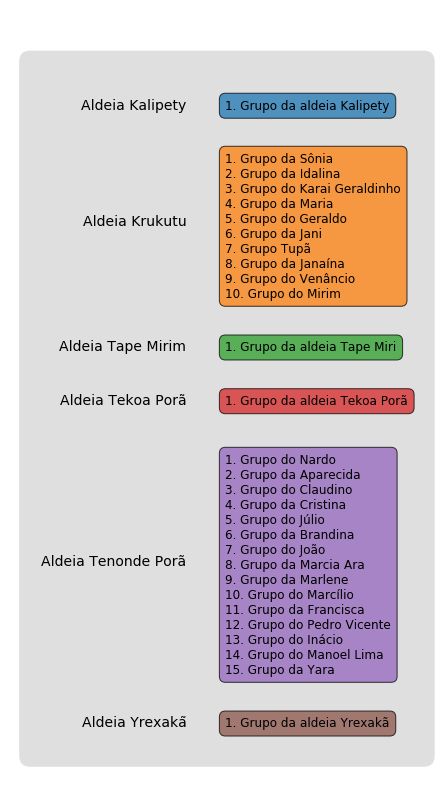

In [442]:
fig, ax = plt.subplots(figsize=(7,14))
bbox_props = dict(boxstyle='round,pad=1.1', fc='grey', alpha=.25, ec='white')
ax.text(0, -.03, '                                                                                                                              \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n', bbox=bbox_props)

k=0
for name, group in df.groupby('Aldeia'):
    bbox_props = dict(boxstyle='round,pad=.5', fc=colors[k], alpha=.75)
    text=''
    cont=1
    for i in group.grupos_names2.unique():
        if (i!=group.grupos_names2.unique()[-1]):
            text+= str(cont)+'. '+i+'\n'
        else:
            text+=str(cont)+'. '+i
        cont+=1
    ax.text(.5, y[k],text,size=12, fontdict={'family':'Helvetica'}, bbox=bbox_props)
    k+=1
    
aldeias = ['Aldeia Kalipety', 'Aldeia Krukutu', 'Aldeia Tape Mirim', 'Aldeia Tekoa Porã', 'Aldeia Tenonde Porã', 'Aldeia Yrexakã']


y2 = [0.69,0.56,.42,.36,0.18,0] 
for aldeia in aldeias:
    ax.text(.4, y2[aldeias.index(aldeia)], aldeia, fontsize=14, horizontalalignment='right',  fontdict={'family':'Helvetica'})



#plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], bbox_to_anchor=(1.4,.5))

ax.set_ylim(-.05, 0.8)
ax.set_xlim(0, 1)
ax = plt.gca()
#fig.patch.set_facecolor((.9, .9, .9))
plt.axis('off')

#plt.savefig('Infográfico_Aldeias_Cinza_Teste.png',facecolor=fig.get_facecolor(), edgecolor='none', dpi=200)


In [46]:
text

'grupo da aldeia Yrexakã'

In [15]:
df['lon'] = df['_Record_your_current_location_latitude']
df['lat'] = df['_Record_your_current_location_longitude']

In [16]:
grupos_names = ['Grupo da aldeia Tekoa Porã', 'Grupo da aldeia Yrexakã','Grupo da aldeia Tape Miri', 'Grupo da aldeia Kalipety', 'Grupo\nda Sônia', \
'Grupo\nda Idalina', 'Grupo\nKarai Geraldinho', 'Grupo\nda Maria', 'Grupo\ndo Geraldo', 'Grupo\nJani', 'Grupo\ndo Tupã', \
'Grupo\nda Janaína', 'Grupo\ndo Venâncio', 'Grupo\ndo Mirim', 'Grupo\ndo Nardo', 'Grupo\nAparecida', 'Grupo\nClaudino', \
'Grupo\nda Cristina', 'Grupo\ndo Júlio', 'Grupo\nda Brandina', 'Grupo\ndo João', 'Grupo\nMarcia Ara', 'Grupo\nda Marlene', \
'Grupo\ndo Marcílio', 'Grupo\nda Francisca', 'Grupo\nPedro Vicente', 'Grupo\ndo Inácio', 'Grupo\ndo Manoel Lima', 'Grupo\nda Yara']

df['grupos_names'] = grupos_names

In [17]:
grupos_names2 = ['Grupo da aldeia Tekoa Porã', 'Grupo da aldeia Yrexakã','Grupo da aldeia Tape Miri', 'Grupo da aldeia Kalipety', 'Grupo da Sônia', \
'Grupo da Idalina', 'Grupo do Karai Geraldinho', 'Grupo da Maria', 'Grupo do Geraldo', 'Grupo da Jani', 'Grupo Tupã', \
'Grupo da Janaína', 'Grupo do Venâncio', 'Grupo do Mirim', 'Grupo do Nardo', 'Grupo da Aparecida', 'Grupo do Claudino', \
'Grupo da Cristina', 'Grupo do Júlio', 'Grupo da Brandina', 'Grupo do João', 'Grupo da Marcia Ara', 'Grupo da Marlene', \
'Grupo do Marcílio', 'Grupo da Francisca', 'Grupo do Pedro Vicente', 'Grupo do Inácio', 'Grupo do Manoel Lima', 'Grupo da Yara']

df['grupos_names2'] = grupos_names2

In [18]:
df_vari = df.loc[:, 'Quantas_de_milho_avaxi':'Quantas_de_arroz_aroi_'].fillna(0)
df_vari['Aldeia'] = df['Aldeia']
df_vari['Unidade_Produtiva'] = df['Unidade_Produtiva']
df_vari['grupos_names'] = df['grupos_names2']

In [21]:
df_vari[df_vari.grupos_names=='Grupo da Francisca']

Quantas_de_milho_avaxi  Quantas_de_batata_doce_jety  \
24                     0.0                          4.0   

    Quantas_de_feij_o_kumanda  Quantas_de_amendoim_manduvi  \
24                        0.0                          0.0   

    Quantas_de_mandioca_mandi_o  Quantas_de_ab_bora_anda  \
24                          2.0                      0.0   

    Quantas_de_melancia_xanjau  Quantas_de_cana_sorgo_takua_re_e_miri  \
24                         0.0                                    0.0   

    Quantas_de_banana_pakova  Quantas_de_arroz_aroi_   Aldeia  \
24                       0.0                     0.0  Tenonde   

             Unidade_Produtiva        grupos_names  
24  Grupo da francisca tenonde  Grupo da Francisca

In [23]:
def dif_zero(num):
    if (num!=0):
        return 1
    else:
        return np.nan

In [24]:
cols = df.loc[:, 'Quantas_de_milho_avaxi':'Quantas_de_arroz_aroi_'].columns

In [25]:
df_vari['Milho'] = df_vari['Quantas_de_milho_avaxi'].apply(dif_zero)
df_vari['Batata-doce'] = df_vari['Quantas_de_batata_doce_jety'].apply(dif_zero)
df_vari['Feijão'] = df_vari['Quantas_de_feij_o_kumanda'].apply(dif_zero)
df_vari['Amendoim'] = df_vari['Quantas_de_amendoim_manduvi'].apply(dif_zero)
df_vari['Mandioca'] = df_vari['Quantas_de_mandioca_mandi_o'].apply(dif_zero)
df_vari['Abóbora'] = df_vari['Quantas_de_ab_bora_anda'].apply(dif_zero)
df_vari['Melancia'] = df_vari['Quantas_de_melancia_xanjau'].apply(dif_zero)
df_vari['Cana'] = df_vari['Quantas_de_cana_sorgo_takua_re_e_miri'].apply(dif_zero)
df_vari['Banana'] = df_vari['Quantas_de_banana_pakova'].apply(dif_zero)
df_vari['Arroz'] = df_vari['Quantas_de_arroz_aroi_'].apply(dif_zero)

In [25]:
names = df_vari.loc[:,'Milho':'Arroz'].columns
names

Index(['Milho', 'Batata-doce', 'Feijão', 'Amendoim', 'Mandioca', 'Abóbora',
       'Melancia', 'Cana', 'Banana', 'Arroz'],
      dtype='object')

In [39]:
df[df_vari['Quantas_de_amendoim_manduvi']!=0]['Unidade_Produtiva']

26         Grupo do Inácio tenonde
27    Grupo do Manoel Lima tenonde
Name: Unidade_Produtiva, dtype: object

In [53]:
#df_vari.to_csv('df_vari.csv')

In [154]:
df_vari.Unidade_Produtiva = df_vari.Unidade_Produtiva.replace(['Grupo da Yara Tenonde', 'Grupo Márcia Ara Tenonde', 'Grupo da Maria Krukutu'], ['Grupo da Yara tenonde','Grupo Márcia Ara tenonde', 'Grupo da Maria krukutu'])





Text(0.5, 1.0, 'Plantas com mais de uma variedade por unidade produtiva')

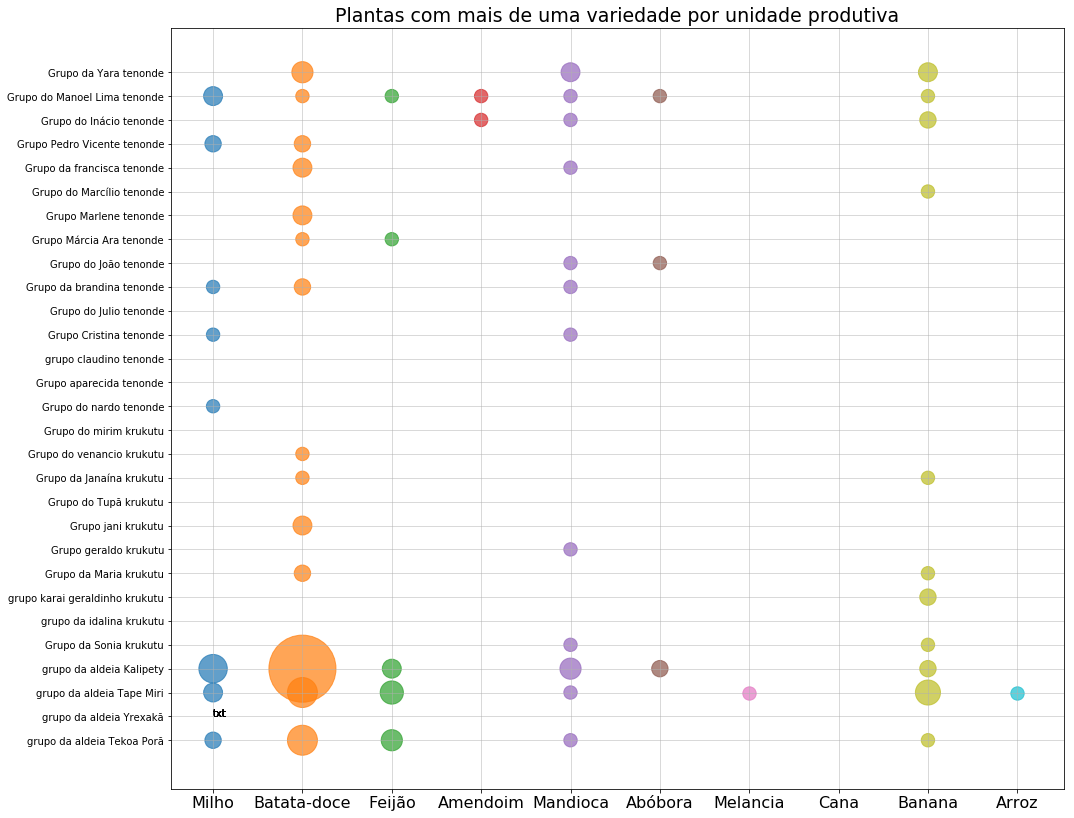

In [215]:
fig, ax = plt.subplots(figsize=(16,14))
sizes = []
for i in range(len(names)):
    scatter = ax.scatter(df_vari[names[i]]*(i+1),df_vari.Unidade_Produtiva, \
               s=df_vari[cols[i]]*90, alpha=.7)
    
    
    g=0
    ax.text(1, 1, 'txt')
    '''for j in df_vari[names[i]]*(i+1):
        if(j!=np.nan):
            ax.text(j,df_vari.Unidade_Produtiva[g],df_vari[cols[i]][g])
        g+=1'''
    
plt.grid(True, alpha=.6)
ax.set_xticks(np.arange(1,11))
ax.set_xticklabels(names, fontsize=16)
ax.set_title('Plantas com mais de uma variedade por unidade produtiva', fontsize=19)

#plt.savefig('Variedades.png', dpi=200, bbox_inches='tight')t

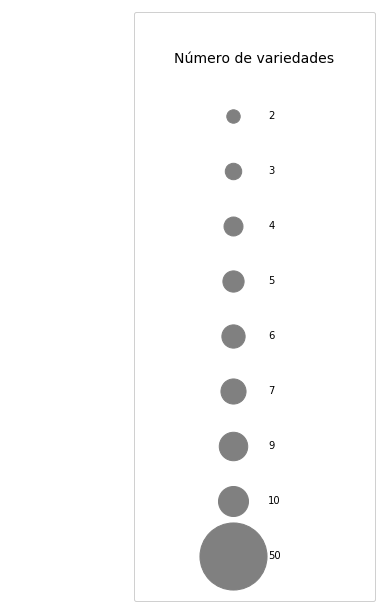

In [146]:
for pw in pws:
    plt.scatter([], [], s=pw*90, c="grey",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], np.array(l[1:]).flatten().astype(float).astype(int), labelspacing=4.5, handletextpad=3,title="Número de variedades",title_fontsize=14, borderpad=4, 
            frameon=True, framealpha=0.9, loc=(0.0), numpoints=1, handlelength=1)
plt.axis('off')
plt.savefig('legenda_variedades.png', dpi=200, bbox_inches='tight')

In [59]:
df_vari2 = df_vari.loc[:, 'Quantas_de_milho_avaxi':'Quantas_de_arroz_aroi_']
df_vari2['grupos'] = df_vari.grupos_names

In [56]:
df_vari.columns

Index(['Quantas_de_milho_avaxi', 'Quantas_de_batata_doce_jety',
       'Quantas_de_feij_o_kumanda', 'Quantas_de_amendoim_manduvi',
       'Quantas_de_mandioca_mandi_o', 'Quantas_de_ab_bora_anda',
       'Quantas_de_melancia_xanjau', 'Quantas_de_cana_sorgo_takua_re_e_miri',
       'Quantas_de_banana_pakova', 'Quantas_de_arroz_aroi_', 'Aldeia',
       'Unidade_Produtiva', 'grupos_names', 'Milho', 'Batata-doce', 'Feijão',
       'Amendoim', 'Mandioca', 'Abóbora', 'Melancia', 'Cana', 'Banana',
       'Arroz'],
      dtype='object')

In [36]:
df_vari[df.grupos_names=='Grupo da aldeia Kalipety']

Quantas_de_milho_avaxi  Quantas_de_batata_doce_jety  \
3                     9.0                         50.0   

   Quantas_de_feij_o_kumanda  Quantas_de_amendoim_manduvi  \
3                        4.0                          0.0   

   Quantas_de_mandioca_mandi_o  Quantas_de_ab_bora_anda  \
3                          5.0                      3.0   

   Quantas_de_melancia_xanjau  Quantas_de_cana_sorgo_takua_re_e_miri  \
3                         0.0                                    0.0   

   Quantas_de_banana_pakova  Quantas_de_arroz_aroi_  ... Milho Batata-doce  \
3                       3.0                     0.0  ...   1.0         1.0   

  Feijão  Amendoim  Mandioca  Abóbora  Melancia  Cana  Banana  Arroz  
3    1.0       NaN       1.0      1.0       NaN   NaN     1.0    NaN  

[1 rows x 23 columns]

'\nlegend_elements = [Line2D([0], [0], marker=\'o\', color=\'w\', label=\'2 variedades\',\n                          markerfacecolor=\'grey\', alpha=.3, markersize=13),                  Line2D([0], [0], marker=\'o\', color=\'w\', label=\'2 variedades\',\n                          markerfacecolor=\'grey\', alpha=.3, markersize=40)]\nlegend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")\nax.add_artist(legend1)\nplt.show()'

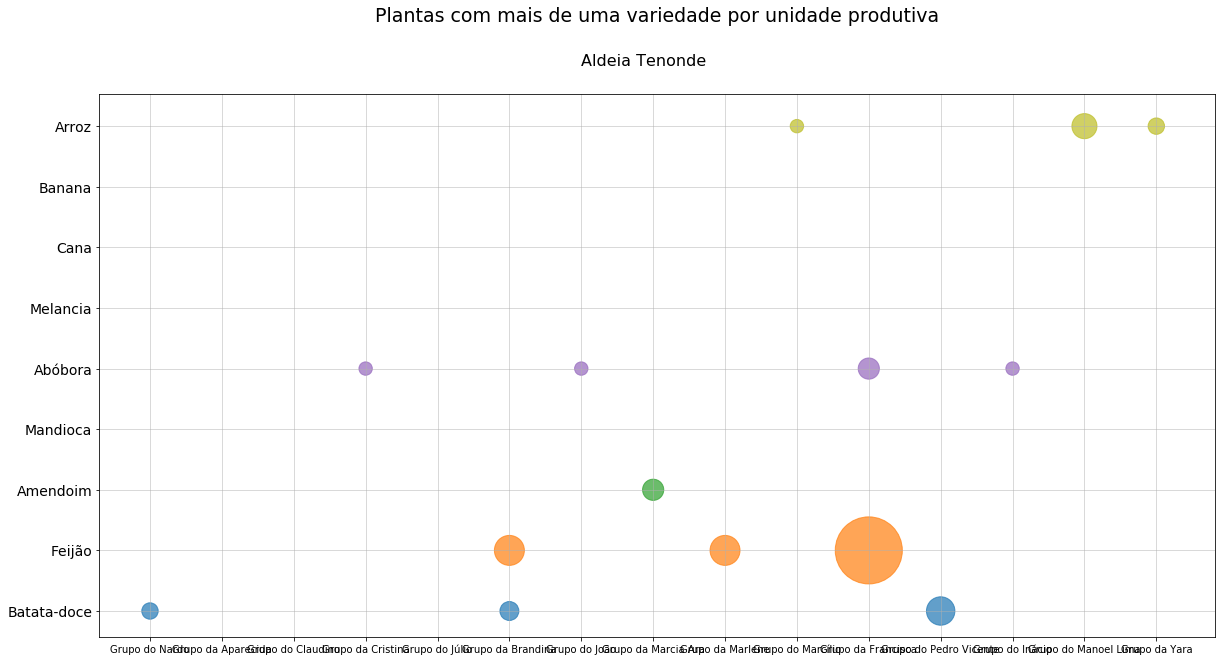

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sizes = []
for i in range(len(names)):
    scatter = ax.scatter(df_vari[df_vari.Aldeia=='Tenonde'].grupos_names, df_vari[df_vari.Aldeia=='Tenonde'][names[i]]*(i+1), \
               s=df_vari[cols[i]]*90, alpha=.7)
    for i in df_vari[cols[i]]*90:
        sizes.append(i)
plt.grid(True, alpha=.6)
ax.set_yticklabels(names, fontsize=14)
ax.set_title('Plantas com mais de uma variedade por unidade produtiva\n\n\n', fontsize=19)
ax.text(6,10, 'Aldeia Tenonde', fontsize=16)

texts = ["Green Data Description", "RedData Description"]

'''
legend_elements = [Line2D([0], [0], marker='o', color='w', label='2 variedades',
                          markerfacecolor='grey', alpha=.3, markersize=13),\
                  Line2D([0], [0], marker='o', color='w', label='2 variedades',
                          markerfacecolor='grey', alpha=.3, markersize=40)]
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()'''

#plt.savefig('Variedades_Tenonde.png', dpi=200)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sizes = []
for i in range(len(names)):
    scatter = ax.scatter(df_vari[df_vari.Aldeia=='Tekoa Porã'].grupos_names, df_vari[df_vari.Aldeia=='Tekoa Porã'][names[i]]*(i+1), \
               s=df_vari[cols[i]]*90, alpha=.7)
    for i in df_vari[cols[i]]*90:
        sizes.append(i)
plt.grid(True, alpha=.6)
ax.set_yticklabels(names, fontsize=14)
ax.set_title('Plantas com mais de uma variedade por unidade produtiva\n\n\n', fontsize=19)
ax.text(6,10, 'Aldeia Tenonde', fontsize=16)

texts = ["Green Data Description", "RedData Description"]

'''
legend_elements = [Line2D([0], [0], marker='o', color='w', label='2 variedades',
                          markerfacecolor='grey', alpha=.3, markersize=13),\
                  Line2D([0], [0], marker='o', color='w', label='2 variedades',
                          markerfacecolor='grey', alpha=.3, markersize=40)]
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()'''

#plt.savefig('Variedades_Tenonde.png', dpi=200)

'\nlegend_elements = [Line2D([0], [0], marker=\'o\', color=\'w\', label=\'2 variedades\',\n                          markerfacecolor=\'grey\', alpha=.3, markersize=13),                  Line2D([0], [0], marker=\'o\', color=\'w\', label=\'2 variedades\',\n                          markerfacecolor=\'grey\', alpha=.3, markersize=40)]\nlegend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")\nax.add_artist(legend1)\nplt.show()'

In [ ]:
plt 

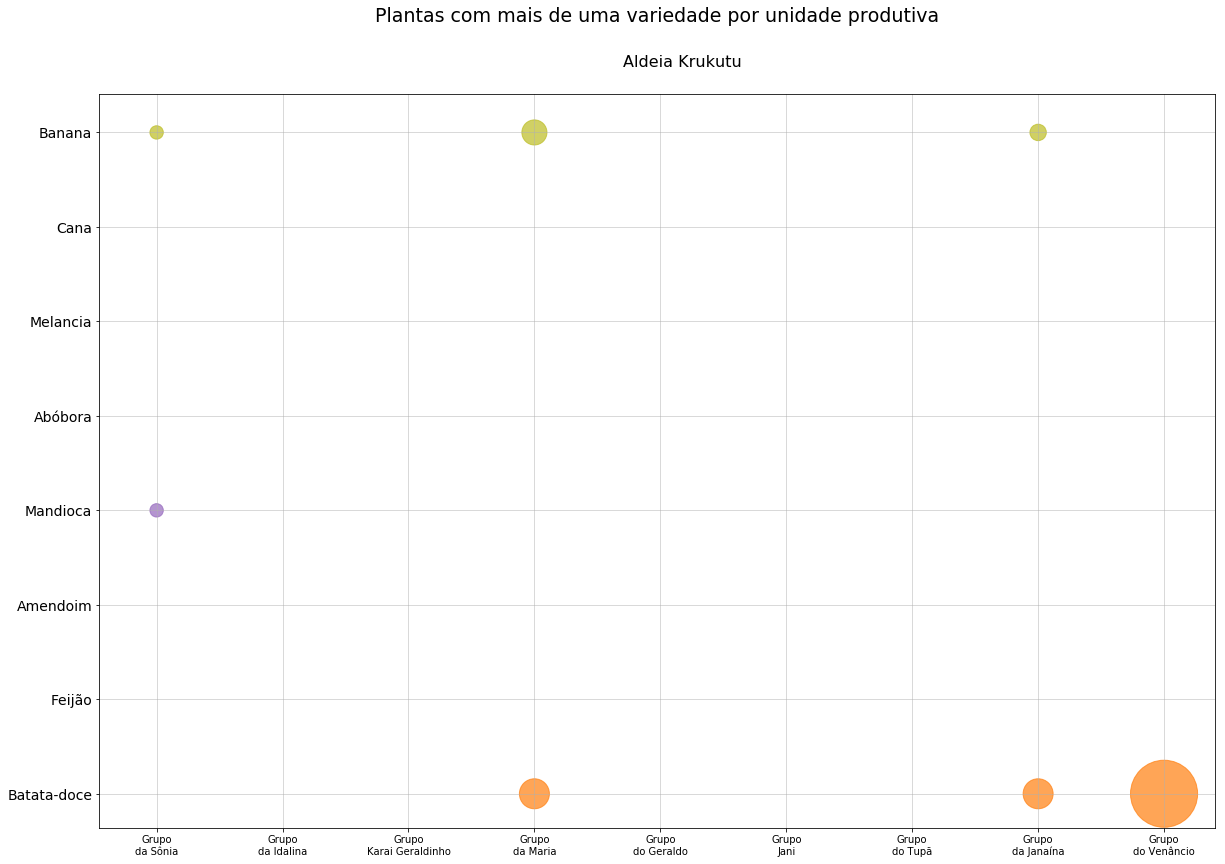

In [32]:
fig, ax = plt.subplots(figsize=(20,13.5))
sizes = []
for i in range(len(names)):
    scatter = ax.scatter(df_vari[df_vari.Aldeia=='Krukutu'].grupos_names, df_vari[df_vari.Aldeia=='Krukutu'][names[i]]*(i+1), \
               s=df_vari[cols[i]]*90, alpha=.7)
    for i in df_vari[cols[i]]*90:
        sizes.append(i)
plt.grid(True, alpha=.6)
ax.set_yticklabels(names, fontsize=14)
ax.set_title('Plantas com mais de uma variedade por unidade produtiva\n\n\n', fontsize=19)
ax.text(3.7,9.7, 'Aldeia Krukutu', fontsize=16)
texts = ["Green Data Description", "RedData Description"]

'''
legend_elements = [Line2D([0], [0], marker='o', color='w', label='2 variedades',
                          markerfacecolor='grey', alpha=.3, markersize=13),\
                  Line2D([0], [0], marker='o', color='w', label='2 variedades',
                          markerfacecolor='grey', alpha=.3, markersize=40)]
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()'''

plt.savefig('Variedades_Krukutu.png', dpi=200)

In [58]:
df.groupby('Unidade_Produtiva').groups.keys()

dict_keys(['Grupo Cristina tenonde', 'Grupo Marlene tenonde', 'Grupo Márcia Ara Tenonde', 'Grupo Pedro Vicente tenonde', 'Grupo aparecida tenonde', 'Grupo da Janaína krukutu', 'Grupo da Maria Krukutu', 'Grupo da Sonia krukutu', 'Grupo da Yara Tenonde', 'Grupo da brandina tenonde', 'Grupo da francisca tenonde', 'Grupo do Inácio tenonde', 'Grupo do João tenonde', 'Grupo do Julio tenonde', 'Grupo do Manoel Lima tenonde', 'Grupo do Marcílio tenonde', 'Grupo do Tupã krukutu', 'Grupo do mirim krukutu', 'Grupo do nardo tenonde', 'Grupo do venancio krukutu', 'Grupo geraldo krukutu', 'Grupo jani krukutu', 'grupo claudino tenonde', 'grupo da aldeia Kalipety', 'grupo da aldeia Tape Miri', 'grupo da aldeia Tekoa Porã', 'grupo da aldeia Yrexakã', 'grupo da idalina krukutu', 'grupo karai geraldinho krukutu'])

In [88]:
group.values

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'Yyrexaka']],
      dtype=object)

In [36]:
df[['Aldeia', 'Tem_alguma_planta_que_possui_m']].groupby('Aldeia')['Tem_alguma_planta_que_possui_m'].apply(list).reset_index()



Aldeia                     Tem_alguma_planta_que_possui_m
0  Kalipety  [milho__avaxi batata_doce__jety kumanda__feij_...
1   Krukutu  [mandioca__mandi_o banana__pakova, nan, banana...
2  TapeMiri  [milho__avaxi batata_doce__jety kumanda__feij_...
3    TekoaP  [milho__avaxi batata_doce__jety kumanda__feij_...
4   Tenonde  [milho__avaxi, nan, nan, milho__avaxi mandioca...
5  Yyrexaka                                              [nan]

In [622]:
df[df.Aldeia=='TapeMiri'][['Milho_avaxi', 'Banana_pakova', 'Mandioca_mandi_o', 'Feij_o_kumanda', 'Batata_doce_jety', 'Amendoim_manduvi', 'Ab_bora_anda', 'Melancia_xanjau', 'Inhame', 'Frut_feras_em_geral', 'Hortali_as_em_geral', 'Arroz_aroi', 'Cana_sorgo_takua_re_e_miri', 'Outras']]





Milho_avaxi  Banana_pakova  Mandioca_mandi_o  Feij_o_kumanda  \
2          NaN            3.0               1.0             1.0   

   Batata_doce_jety  Amendoim_manduvi  Ab_bora_anda  Melancia_xanjau  Inhame  \
2               1.0               NaN           1.0              NaN     NaN   

   Frut_feras_em_geral  Hortali_as_em_geral  Arroz_aroi  \
2                  NaN                  3.0         NaN   

   Cana_sorgo_takua_re_e_miri  Outras  
2                         NaN     NaN

In [17]:
df[['Milho_avaxi', 'Banana_pakova', 'Mandioca_mandi_o', 'Feij_o_kumanda', 'Batata_doce_jety', 'Amendoim_manduvi', 'Ab_bora_anda', 'Melancia_xanjau', 'Inhame', 'Frut_feras_em_geral', 'Hortali_as_em_geral', 'Arroz_aroi', 'Cana_sorgo_takua_re_e_miri', 'Outras', 'Aldeia']]

Milho_avaxi  Banana_pakova  Mandioca_mandi_o  Feij_o_kumanda  \
0           NaN            NaN               NaN             NaN   
1           NaN            1.0               NaN             NaN   
2           NaN            3.0               1.0             1.0   
3           1.0            3.0               1.0             1.0   
4           1.0            3.0               3.0             NaN   
5           1.0            NaN               1.0             1.0   
6           3.0            NaN               NaN             NaN   
7           NaN            3.0               NaN             1.0   
8           NaN            3.0               1.0             NaN   
9           NaN            1.0               1.0             NaN   
10          NaN            3.0               1.0             NaN   
11          NaN            NaN               1.0             NaN   
12          NaN            3.0               1.0             NaN   
13          1.0            3.0               1.0             NaN   
14          1.0            1.0               1.0             1.0   
15          1.0            3.0               1.0             1.0   
16          NaN            1.0               NaN             1.0   
17          NaN            1.0               NaN             NaN   
18          3.0            1.0               3.0             3.0   
19          1.0            3.0               1.0             NaN   
20          1.0            1.0               3.0             1.0   
21          1.0            1.0               1.0             NaN   
22          1.0            3.0               1.0             1.0   
23          1.0            3.0               1.0             NaN   
24          1.0            NaN               1.0             NaN   
25          1.0            1.0               3.0             1.0   
26          NaN            3.0               1.0             NaN   
27          3.0            3.0               3.0             3.0   
28          1.0            3.0               1.0             NaN   

    Batata_doce_jety  Amendoim_manduvi  Ab_bora_anda  Melancia_xanjau  Inhame  \
0                NaN               NaN           NaN              NaN     NaN   
1                NaN               NaN           NaN              NaN     NaN   
2                1.0               NaN           1.0              NaN     NaN   
3                3.0               NaN           1.0              NaN     1.0   
4                1.0               NaN           NaN              NaN     NaN   
5                NaN               NaN           NaN              NaN     NaN   
6                NaN               NaN           NaN              NaN     NaN   
7                1.0               NaN           NaN              NaN     NaN   
8                NaN               NaN           NaN              NaN     NaN   
9                NaN               NaN           NaN              NaN     NaN   
10               NaN               NaN           NaN              NaN     NaN   
11               NaN               NaN           NaN              NaN     NaN   
12               1.0               NaN           NaN              NaN     NaN   
13               1.0               NaN           1.0              NaN     NaN   
14               NaN               NaN           NaN              NaN     NaN   
15               1.0               NaN           NaN              NaN     NaN   
16               NaN               NaN           NaN              NaN     NaN   
17               1.0               NaN           NaN              NaN     NaN   
18               1.0               NaN           NaN              NaN     NaN   
19               1.0               NaN           NaN              NaN     NaN   
20               1.0               NaN           1.0              NaN     NaN   
21               NaN               NaN           NaN              NaN     NaN   
22               1.0               NaN           NaN              NaN     NaN   
23               1.

In [102]:
df['alimentacao'] = df['Quanto_conseguem_se_a_produ_o_das_ro_as']

In [463]:
df['aposentadoria'] = df['Aposentadoria']
df['Auxílios Regulares'] = df['Aux_lios_regulares_efici_ncia_reclus_o']
df['Bolsa-família'] = df['Bolsa_fam_lia']
df['Outro Auxílio'] = df['Outro_001']

In [104]:
df['escola'] = df['Escola_Estadual']
df['ceci'] = df['Ceci']
df['posto'] = df['Posto_de_Sa_de']
df['agente'] = df['Agente_ambiental_ou_cultural']
df['fora'] = df['Emprego_para_n_o_ind_gena_fora_da_aldeia']
df['outra_ocupacao'] = df['Qual_outro_001']
df['outro'] = df['Outro']

In [105]:
df['trabalho'] = df.Homem+df.Mulher

In [7]:
df.Aldeia.fillna(0).unique()

array(['TekoaP', 'Yyrexaka', 'TapeMiri', 'Kalipety', 'Krukutu', 'Tenonde'],
      dtype=object)

In [8]:
df.shape

(29, 264)

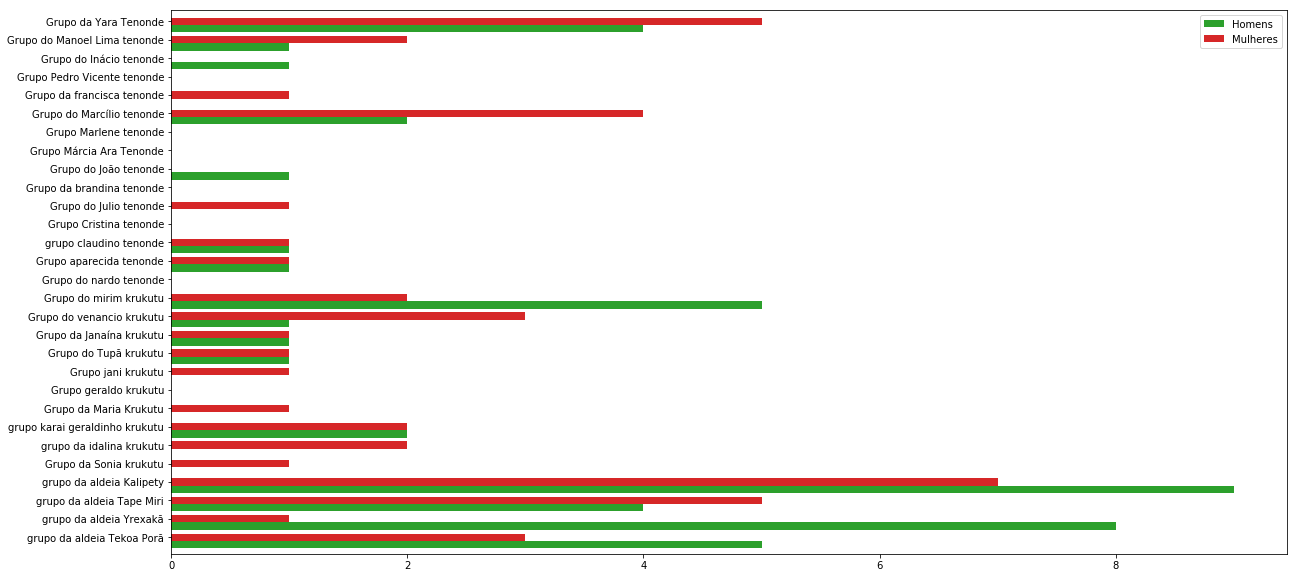

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
width = 0.4
ind = np.arange(len(df))+.5

ax.barh(ind, df.Homem, width, color='tab:green', label='Homens')
ax.barh(ind + width, df.Mulher, width, color='tab:red', label='Mulheres')

ax.set(yticks=ind + width, yticklabels=df.Unidade_Produtiva, ylim=[2*width - 1, len(df)])
ax.legend()
ax.set_ylim(0,len(df)+.5)
plt.legend()

In [ ]:
df

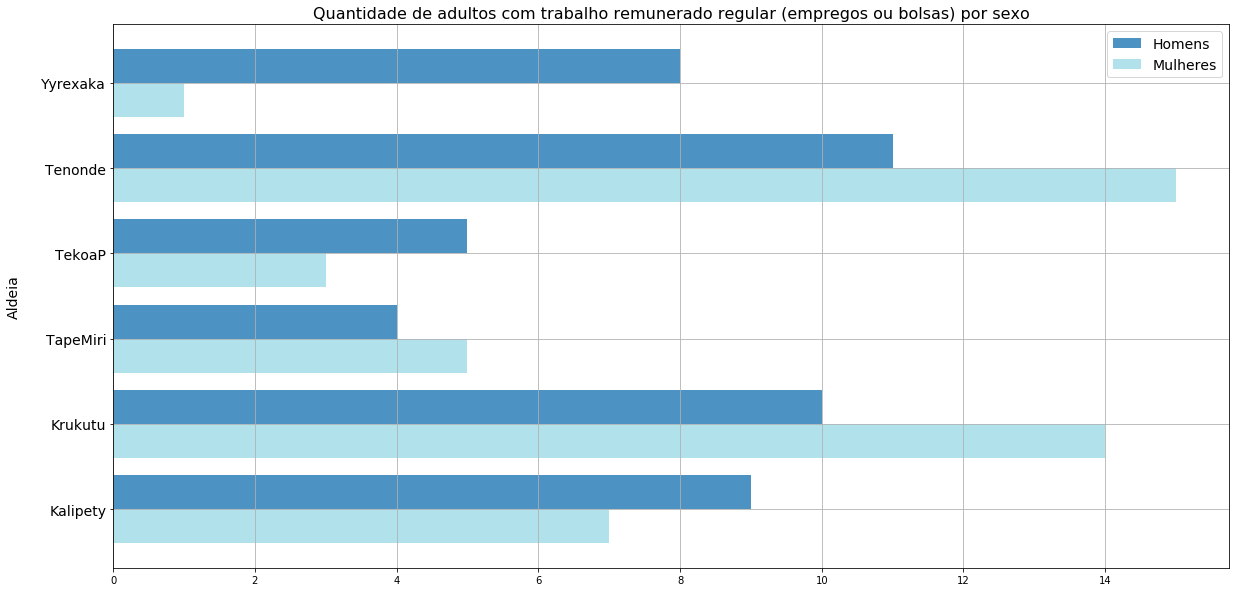

In [109]:
colors = cm.get_cmap('tab20', 2)
fig, ax = plt.subplots(figsize=(20,10))
width = 0.4
ind = np.arange(len(df.Aldeia.unique()))-1

ax.barh(ind+width/2, df.groupby(['Aldeia']).sum()['Homem'].values, width, label='Homens', alpha=.8, color=colors.colors[0])
ax.barh(ind - width/2, df.groupby(['Aldeia']).sum()['Mulher'].values, width, color=colors.colors[1], label='Mulheres',alpha=.8)
#ax.plot(df.groupby('Aldeia').Adultos_grupo.sum(), np.arange(len(df.groupby(['Aldeia']).sum()['Homem'].index))-1, label='Total de adultos')
ax.set(yticks=ind, yticklabels=df.groupby(['Aldeia']).sum()['Homem'].index)
plt.yticks(fontsize=14)
ax.legend()
plt.grid()
#ax.set_ylim(0,len(df)+.5)
plt.title('Quantidade de adultos com trabalho remunerado regular (empregos ou bolsas) por sexo', fontsize=16)
plt.ylabel('Aldeia\n', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('18.Remuneração por sexo.png', dpi=200)


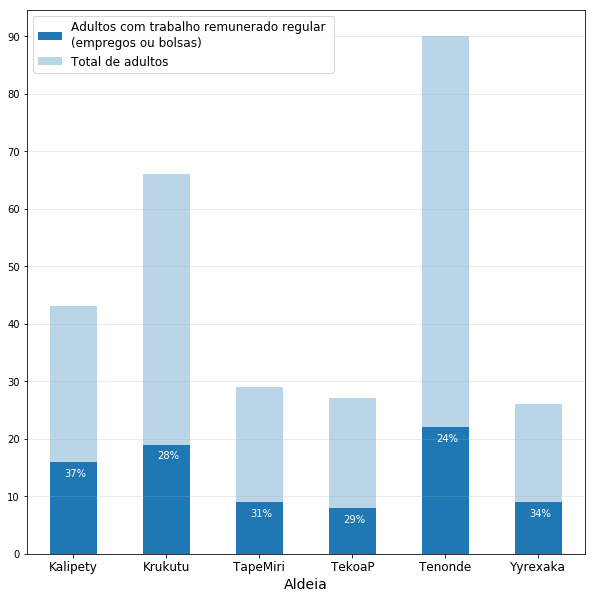

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
plot = df.groupby('Aldeia').trabalho.sum().plot(kind='bar', stacked=True, ax=ax, label='Adultos com trabalho remunerado regular \n(empregos ou bolsas)', fontsize=10)
plot2 = df.groupby('Aldeia').Adultos_grupo.sum().plot(kind='bar', stacked=True, ax=ax, alpha=.3, label='Total de adultos')
ano = ((df.groupby('Aldeia').trabalho.sum().values/df.groupby('Aldeia').Adultos_grupo.sum().values)*100).astype(int)
for p in range(6):
    ax.annotate(str(ano[p])+'%', (plot2.patches[p].get_x() +0.15, plot2.patches[p].get_height() -2.5), color='white')

ax.set_xticklabels(df.groupby('Aldeia').trabalho.sum().index, rotation=0, fontsize=12)
plt.yticks(np.arange(0,100,10))
plt.grid(axis='y', alpha=.3)
plt.xlabel('Aldeia', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('17.Remuneração.png', dpi=200)


In [118]:
df['adultos'] = df['Adultos_grupo']

In [306]:
df[['escola','ceci', 'posto', 'agente', 'fora', 'outro', 'Aldeia']].groupby('Aldeia').sum()

escola  ceci  posto  agente  fora  outro
Aldeia                                            
Kalipety     3.0   1.0    1.0     8.0   0.0    3.0
Krukutu      2.0  12.0    5.0     4.0   0.0    1.0
TapeMiri     0.0   0.0    0.0     9.0   0.0    0.0
TekoaP       0.0   1.0    0.0     7.0   0.0    0.0
Tenonde      7.0   7.0    4.0     6.0   0.0    1.0
Yyrexaka     0.0   0.0    1.0     8.0   0.0    0.0

In [14]:
df.groupby('Aldeia').trabalho.sum()

Aldeia
Kalipety    16.0
Krukutu     19.0
TapeMiri     9.0
TekoaP       8.0
Tenonde     22.0
Yyrexaka     9.0
Name: trabalho, dtype: float64

In [19]:
df[['escola','ceci', 'posto', 'agente', 'fora', 'outro', 'Aldeia']].groupby('Aldeia').sum().sum(axis=1).values

array([16., 24.,  9.,  8., 25.,  9.])

In [210]:
df[['escola','ceci', 'posto', 'agente', 'fora', 'outro', 'Aldeia']].groupby('Aldeia').sum()

escola  ceci  posto  agente  fora  outro
Aldeia                                            
Kalipety     3.0   1.0    1.0     8.0   0.0    3.0
Krukutu      2.0  12.0    5.0     4.0   0.0    1.0
TapeMiri     0.0   0.0    0.0     9.0   0.0    0.0
TekoaP       0.0   1.0    0.0     7.0   0.0    0.0
Tenonde      7.0   7.0    4.0     6.0   0.0    1.0
Yyrexaka     0.0   0.0    1.0     8.0   0.0    0.0

In [124]:
np.round(df[['escola','ceci', 'posto', 'agente', 'fora', 'outro', 'Aldeia']].groupby('Aldeia').sum()*100/df.groupby('Aldeia').adultos.sum().values.reshape(6, 1))




escola  ceci  posto  agente  fora  outro
Aldeia                                            
Kalipety     7.0   2.0    2.0    19.0   0.0    7.0
Krukutu      3.0  18.0    8.0     6.0   0.0    2.0
TapeMiri     0.0   0.0    0.0    31.0   0.0    0.0
TekoaP       0.0   4.0    0.0    26.0   0.0    0.0
Tenonde      8.0   8.0    4.0     7.0   0.0    1.0
Yyrexaka     0.0   0.0    4.0    31.0   0.0    0.0

In [121]:
df.groupby('Aldeia').adultos.sum()

Aldeia
Kalipety    43
Krukutu     66
TapeMiri    29
TekoaP      27
Tenonde     90
Yyrexaka    26
Name: adultos, dtype: int64

In [111]:
a = ((df[['escola','ceci', 'posto', 'agente', 'outro', 'Aldeia']].groupby('Aldeia').sum().T/df[['escola','ceci', 'posto', 'agente', 'fora', 'outro', 'Aldeia']].groupby('Aldeia').sum().sum(axis=1).values)*100).T

In [112]:
df.groupby('outra_ocupacao')['Aldeia'].sum()

outra_ocupacao
POT - Programa Operação Trabalho [para apoio aos agricultores]    Kalipety
bolsa agricultura                                                  Tenonde
estágio na escola                                                  Krukutu
Name: Aldeia, dtype: object

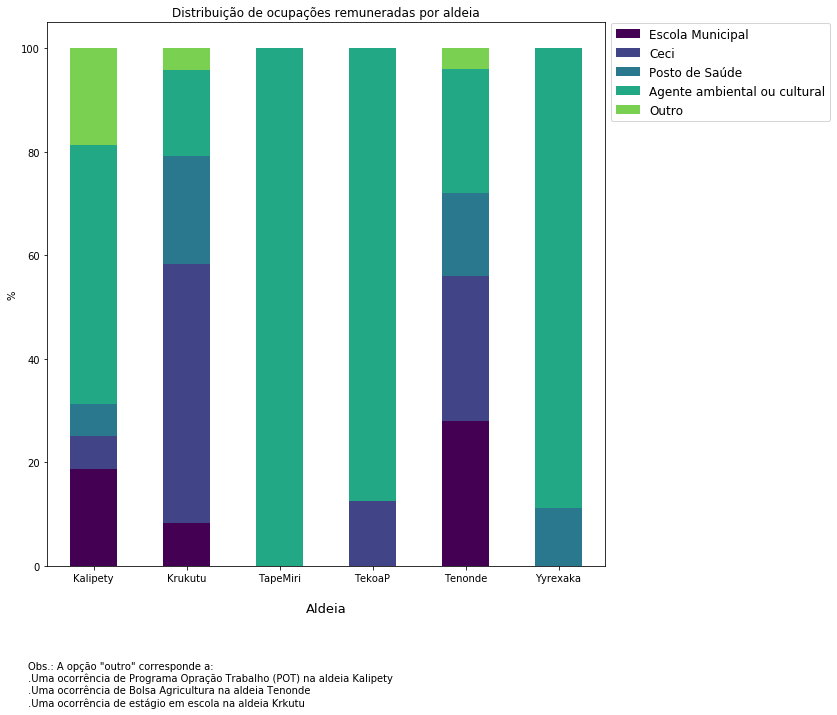

In [114]:
colors = cm.viridis(np.linspace(0,1,6))
ax = a.plot(kind='bar', stacked=True, figsize=(10,10), color=colors)
ax.set_xticklabels(df.groupby('Aldeia').trabalho.sum().index, rotation=0)
legend = plt.legend(labels = ['Escola Municipal', 'Ceci', 'Posto de Saúde', 'Agente ambiental ou cultural', 'Outro'],\
           bbox_to_anchor=(1, 1.01), fontsize=12)
frame = legend.get_frame()
#frame.set_facecolor((.9, 0.9, 0.9))
#ax.set_facecolor((.9, 0.9, 0.9))
plt.ylabel('%')
plt.xlabel('\nAldeia', fontsize=13)
plt.title('Distribuição de ocupações remuneradas por aldeia')
plt.text(s='Obs.: A opção \"outro\" corresponde a:\n.Uma ocorrência de Programa Opração Trabalho (POT) na aldeia Kalipety\
\n.Uma ocorrência de Bolsa Agricultura na aldeia Tenonde\n.Uma ocorrência de estágio em escola na aldeia Krkutu', x=-.7,y=-27)
plt.savefig('19.Tipo_de_trabalho.png', dpi=200, bbox_inches='tight')

In [43]:
outer_colors = cmap(np.arange(10))
outer_colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       [0.271305, 0.019942, 0.347269, 1.      ],
       [0.272594, 0.025563, 0.353093, 1.      ],
       [0.273809, 0.031497, 0.358853, 1.      ],
       [0.274952, 0.037752, 0.364543, 1.      ],
       [0.276022, 0.044167, 0.370164, 1.      ],
       [0.277018, 0.050344, 0.375715, 1.      ],
       [0.277941, 0.056324, 0.381191, 1.      ]])

In [45]:
outer_colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ]])

In [126]:
df.groupby('alimentacao').Unidade_Produtiva.unique()

alimentacao
0    [grupo da aldeia Tekoa Porã, grupo da aldeia Y...
1    [grupo da aldeia Tape Miri, grupo da aldeia Ka...
3                        [Grupo Pedro Vicente tenonde]
Name: Unidade_Produtiva, dtype: object

In [127]:
np.repeat('\n ', len(df.Unidade_Produtiva.unique()))

array(['\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ',
       '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ',
       '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ', '\n ',
       '\n ', '\n '], dtype='<U2')

In [128]:
df.groupby('alimentacao').Unidade_Produtiva.unique().values[0]

array(['grupo da aldeia Tekoa Porã', 'grupo da aldeia Yrexakã',
       'grupo karai geraldinho krukutu', 'Grupo do Marcílio tenonde'],
      dtype=object)

In [129]:
a = np.array([1,2,2])
np.insert(a, len(a), 9)

array([1, 2, 2, 9])

In [130]:
len(labels)

3

In [131]:
def replace_g(grupo):
    return 'G'+grupo[1:]

In [132]:
df['grupo'] = df.Unidade_Produtiva.apply(replace_g)

In [133]:
df.alimentacao.value_counts()

1    24
0     4
3     1
Name: alimentacao, dtype: int64

In [134]:
df['alimentacao2'] = df.alimentacao.replace([0], [1])

In [135]:
labels2 = []
for i in df.groupby('alimentacao2').grupo.unique().values:
    labels2.append((i+np.repeat('\n ', len(i))).sum())
labels2[0] = '\n '+labels2[0]
labels2[1] = '\n '+labels2[1]

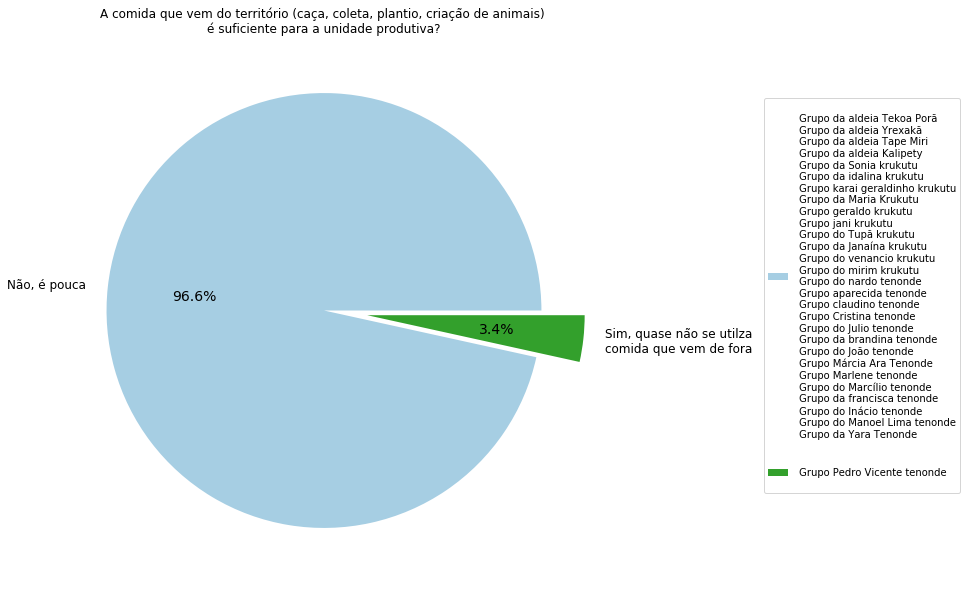

In [137]:
colors = cm.Paired(np.linspace(0,1,5))
explode = (.0, .2)
fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(df.alimentacao2.value_counts().sort_index().values, colors=colors, explode=explode, labels = ['Não, é pouca','Sim, quase não se utilza \ncomida que vem de fora' ],autopct='%1.1f%%',\
                                                       textprops={'fontsize': 14})
for text in texts:
    text.set_fontsize(12)
plt.title('A comida que vem do território (caça, coleta, plantio, criação de animais) \né suficiente para a unidade produtiva?', fontsize=12)
plt.legend(labels=labels2, bbox_to_anchor=(1.3, .9))
plt.savefig('21.Joint_Alimntação_pieplot.png', dpi=200, bbox_inches='tight')


In [29]:
labels = []
for i in df.groupby('alimentacao').grupo.unique().values:
    labels.append((i+np.repeat('\n ', len(i))).sum())
labels[0] = '\n '+labels[0]
labels[1] = '\n '+labels[1]
labels[2] = '\n '+labels[2]

In [391]:
df.groupby('alimentacao').grupo.unique().values

array([array(['Grupo da aldeia Tekoa Porã', 'Grupo da aldeia Yrexakã',
       'Grupo karai geraldinho krukutu', 'Grupo do Marcílio tenonde'],
      dtype=object),
       array(['Grupo da aldeia Tape Miri', 'Grupo da aldeia Kalipety',
       'Grupo da Sonia krukutu', 'Grupo da idalina krukutu',
       'Grupo da Maria Krukutu', 'Grupo geraldo krukutu',
       'Grupo jani krukutu', 'Grupo do Tupã krukutu',
       'Grupo da Janaína krukutu', 'Grupo do venancio krukutu',
       'Grupo do mirim krukutu', 'Grupo do nardo tenonde',
       'Grupo aparecida tenonde', 'Grupo claudino tenonde',
       'Grupo Cristina tenonde', 'Grupo do Julio tenonde',
       'Grupo da brandina tenonde', 'Grupo do João tenonde',
       'Grupo Márcia Ara Tenonde', 'Grupo Marlene tenonde',
       'Grupo da francisca tenonde', 'Grupo do Inácio tenonde',
       'Grupo do Manoel Lima tenonde', 'Grupo da Yara Tenonde'],
      dtype=object),
       array(['Grupo Pedro Vicente tenonde'], dtype=object)], dtype=object)

In [24]:
df.alimentacao.value_counts().sort_index().values

array([ 4, 24,  1])

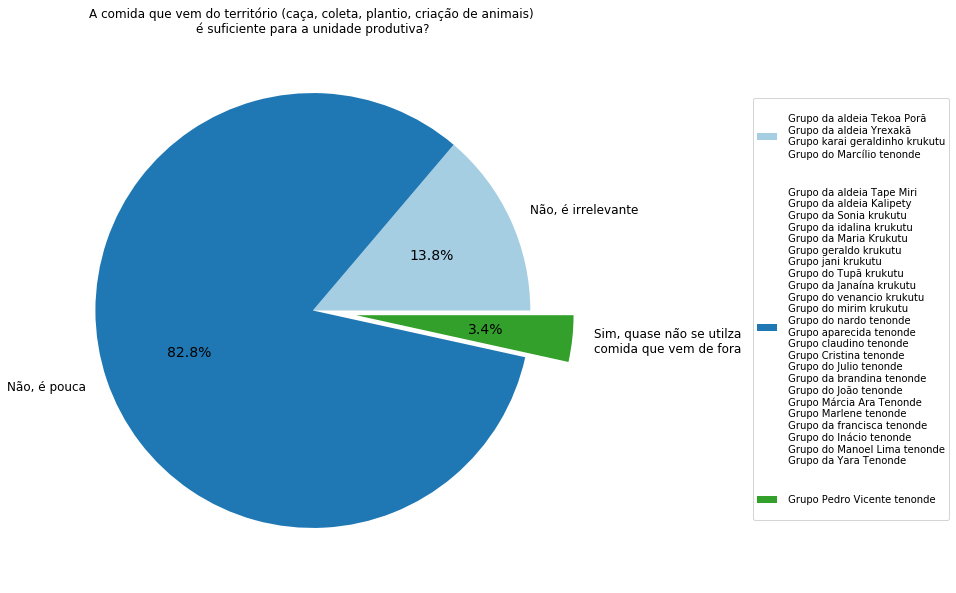

In [34]:
colors = cm.Paired(np.linspace(0,1,8))
explode = (.0, .0, .2)
fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(df.alimentacao2.value_counts().sort_index().values, colors=colors, explode=explode, labels = ['Não, é irrelevante',
                                                       'Não, é pouca','Sim, quase não se utilza \ncomida que vem de fora' ],autopct='%1.1f%%',\
                                                       textprops={'fontsize': 14})
for text in texts:
    text.set_fontsize(12)
plt.title('A comida que vem do território (caça, coleta, plantio, criação de animais) \né suficiente para a unidade produtiva?', fontsize=12)
plt.legend(labels=labels, bbox_to_anchor=(1.3, .9))
plt.savefig('Alimntação_pieplot', dpi=200, bbox_inches='tight')

In [60]:
def open_map(name):
    maps = gpd.read_file('files/'+name+'.shp')
    maps = maps.to_crs({'init': 'epsg:4326'}) 
    return maps
    

In [61]:
mapa = open_map('SIRGAS_SHP_densidade_demografica_2010')

In [62]:
mapa.habit_hect = mapa.habit_hect.fillna(0)

In [330]:
mapa.head()

id       setor_cens  populacao  area_hect   habit_hect  ano_densid  \
0  32355  355030865000149      573.0   0.100683  5691.134318        2010   
1  32356  355030865000148      156.0   0.226534   688.637730        2010   
2  24960  355030864000087      350.0   5.201065    67.293912        2010   
3  24961  355030864000088      306.0   2.962862   103.278515        2010   
4  24964  355030864000058      997.0   8.876239   112.322347        2010   

   an_censo                                           geometry  
0      2010  POLYGON ((-46.78918189559759 -23.5991948416245...  
1      2010  POLYGON ((-46.78954589819359 -23.5990648399843...  
2      2010  POLYGON ((-46.50862427314981 -23.5201383088821...  
3      2010  POLYGON ((-46.50762525934772 -23.5185533047118...  
4      2010  POLYGON ((-46.50381821503486 -23.5149382996356...

In [332]:
mapa.habit_hect.min()

0.0

In [333]:
mapa.habit_hect.max()

30345.556016

In [56]:
vmin = 100
vmax=120

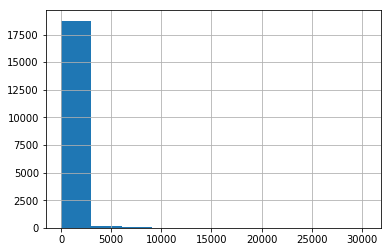

In [353]:
mapa.habit_hect.hist()

In [342]:
mapa.head()

id       setor_cens  populacao  area_hect   habit_hect  ano_densid  \
0  32355  355030865000149      573.0   0.100683  5691.134318        2010   
1  32356  355030865000148      156.0   0.226534   688.637730        2010   
2  24960  355030864000087      350.0   5.201065    67.293912        2010   
3  24961  355030864000088      306.0   2.962862   103.278515        2010   
4  24964  355030864000058      997.0   8.876239   112.322347        2010   

   an_censo                                           geometry  
0      2010  POLYGON ((-46.78918189559759 -23.5991948416245...  
1      2010  POLYGON ((-46.78954589819359 -23.5990648399843...  
2      2010  POLYGON ((-46.50862427314981 -23.5201383088821...  
3      2010  POLYGON ((-46.50762525934772 -23.5185533047118...  
4      2010  POLYGON ((-46.50381821503486 -23.5149382996356...

/Users/leozeine/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


NameError: name 'geo_df' is not defined

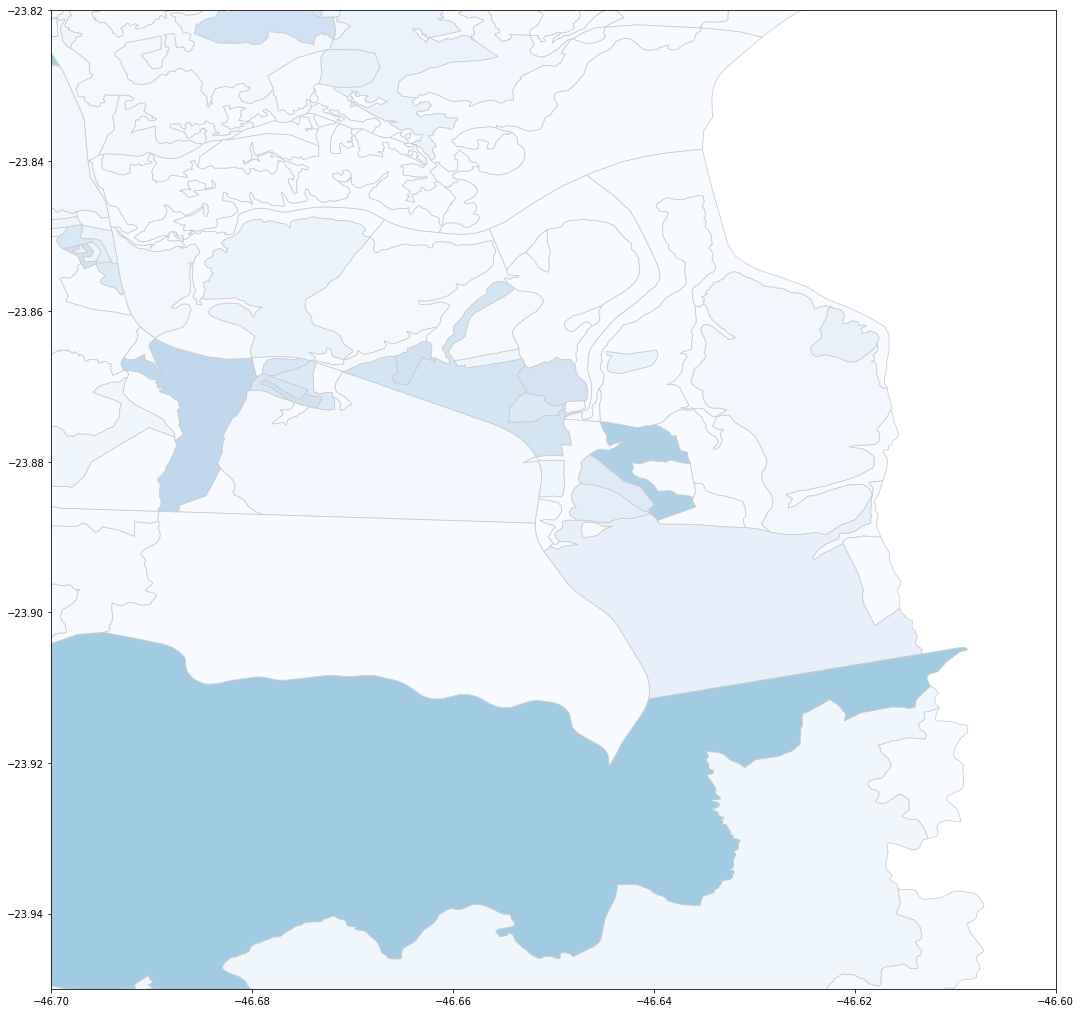

In [63]:
fig, ax = plt.subplots(1, figsize = (18, 18))
ax.set_ylim([-23.95, -23.82])
ax.set_xlim([-46.7, -46.6])
variable = 'area_hect'
mapa.plot(column='populacao', cmap='Blues',linewidth=.8, ax=ax, edgecolor='.8')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
k=0
for name, group in geo_df.groupby('Aldeia'):
    group.plot(label='Aldeia '+name, ax=ax, color=colors[k])
    
        
    k+=1
    

cbar = fig.colorbar(sm)
#plt.savefig('setor_censitario.png', dpi=200)

In [354]:
mapa2 = open_map('DEINFO_DISTRITO')

In [355]:
mapa2.head()

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST COD_SUB  \
0      4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47      27   
1      4.0  8583484.0         1.0     JD SAO LUIS        JDS       46      18   
2      4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5      21   
3      4.0  8583479.0         1.0         JAGUARA        JAG       40      08   
4      4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93      29   

   DATA_CRIAC  USUARIO_ID                                           geometry  
0  2007-03-19         0.0  POLYGON ((-46.44622454666138 -23.5565080755499...  
1  2007-03-19         0.0  POLYGON ((-46.75837535443548 -23.6485912240209...  
2  2007-03-19         0.0  POLYGON ((-46.47500966228348 -23.5238137473753...  
3  2007-03-19         0.0  POLYGON ((-46.75599587331336 -23.4951613574067...  
4  2007-03-19         0.0  POLYGON ((-46.58146994582895 -23.5729872790950...

In [284]:
teste = gpd.read_file('LAYER_GEOTECNICA/DEINFO_DECLIVIDADE.shp')

In [556]:
pd.DataFrame(df2.groupby('Unidade_Produtiva').adultos.sum())

adultos
Unidade_Produtiva                      
Grupo Cristina tenonde                6
Grupo Marlene tenonde                 6
Grupo Márcia Ara Tenonde              3
Grupo Pedro Vicente tenonde           1
Grupo aparecida tenonde               3
Grupo da Janaína krukutu              2
Grupo da Maria Krukutu               10
Grupo da Sonia krukutu                3
Grupo da Yara Tenonde                23
Grupo da brandina tenonde            10
Grupo da francisca tenonde            4
Grupo do Inácio tenonde               5
Grupo do João tenonde                 2
Grupo do Julio tenonde                2
Grupo do Manoel Lima tenonde         10
Grupo do Marcílio tenonde            11
Grupo do Tupã krukutu                 2
Grupo do mirim krukutu               24
Grupo do nardo tenonde                2
Grupo do venancio krukutu             9
Grupo geraldo krukutu                 2
Grupo jani krukutu                    4
grupo claudino tenonde                2
grupo da aldeia Kalipety             43
grupo da aldeia Tape Miri            29
grupo da aldeia Tekoa Porã           27
grupo da aldeia Yrexakã              26
grupo da idalina krukutu              3
grupo karai geraldinho krukutu        7

In [400]:
teste.head()

ID        AREA    CLASSE  CODIGO  \
0   4564    0.020051  05 a 25%       2   
1   5707   36.261402  05 a 25%       2   
2   7048  201.025467   0 a 05%       1   
3   9774    1.494003  25 a 60%       3   
4  10088    0.020059  05 a 25%       2   

                                            geometry  
0  POLYGON ((330087.0884458264 7408500.851596082,...  
1  POLYGON ((329587.1267063076 7401000.811248207,...  
2  POLYGON ((329587.1366562728 7399900.799681251,...  
3  POLYGON ((358787.2799788546 7390500.748636888,...  
4  POLYGON ((358887.2323977205 7390000.722998474,...

In [285]:
teste.crs

{'init': 'epsg:29193'}

In [286]:
teste = teste.to_crs({'init': 'epsg:4326'}) 

In [287]:
teste.head()

ID        AREA    CLASSE  CODIGO  \
0   4564    0.020051  05 a 25%       2   
1   5707   36.261402  05 a 25%       2   
2   7048  201.025467   0 a 05%       1   
3   9774    1.494003  25 a 60%       3   
4  10088    0.020059  05 a 25%       2   

                                            geometry  
0  POLYGON ((-46.66351155680985 -23.4249610388976...  
1  POLYGON ((-46.66925483258395 -23.4926273230457...  
2  POLYGON ((-46.66937986711817 -23.5025593667477...  
3  POLYGON ((-46.38436676685546 -23.5902455733144...  
4  POLYGON ((-46.3834347742508 -23.59476959613671...

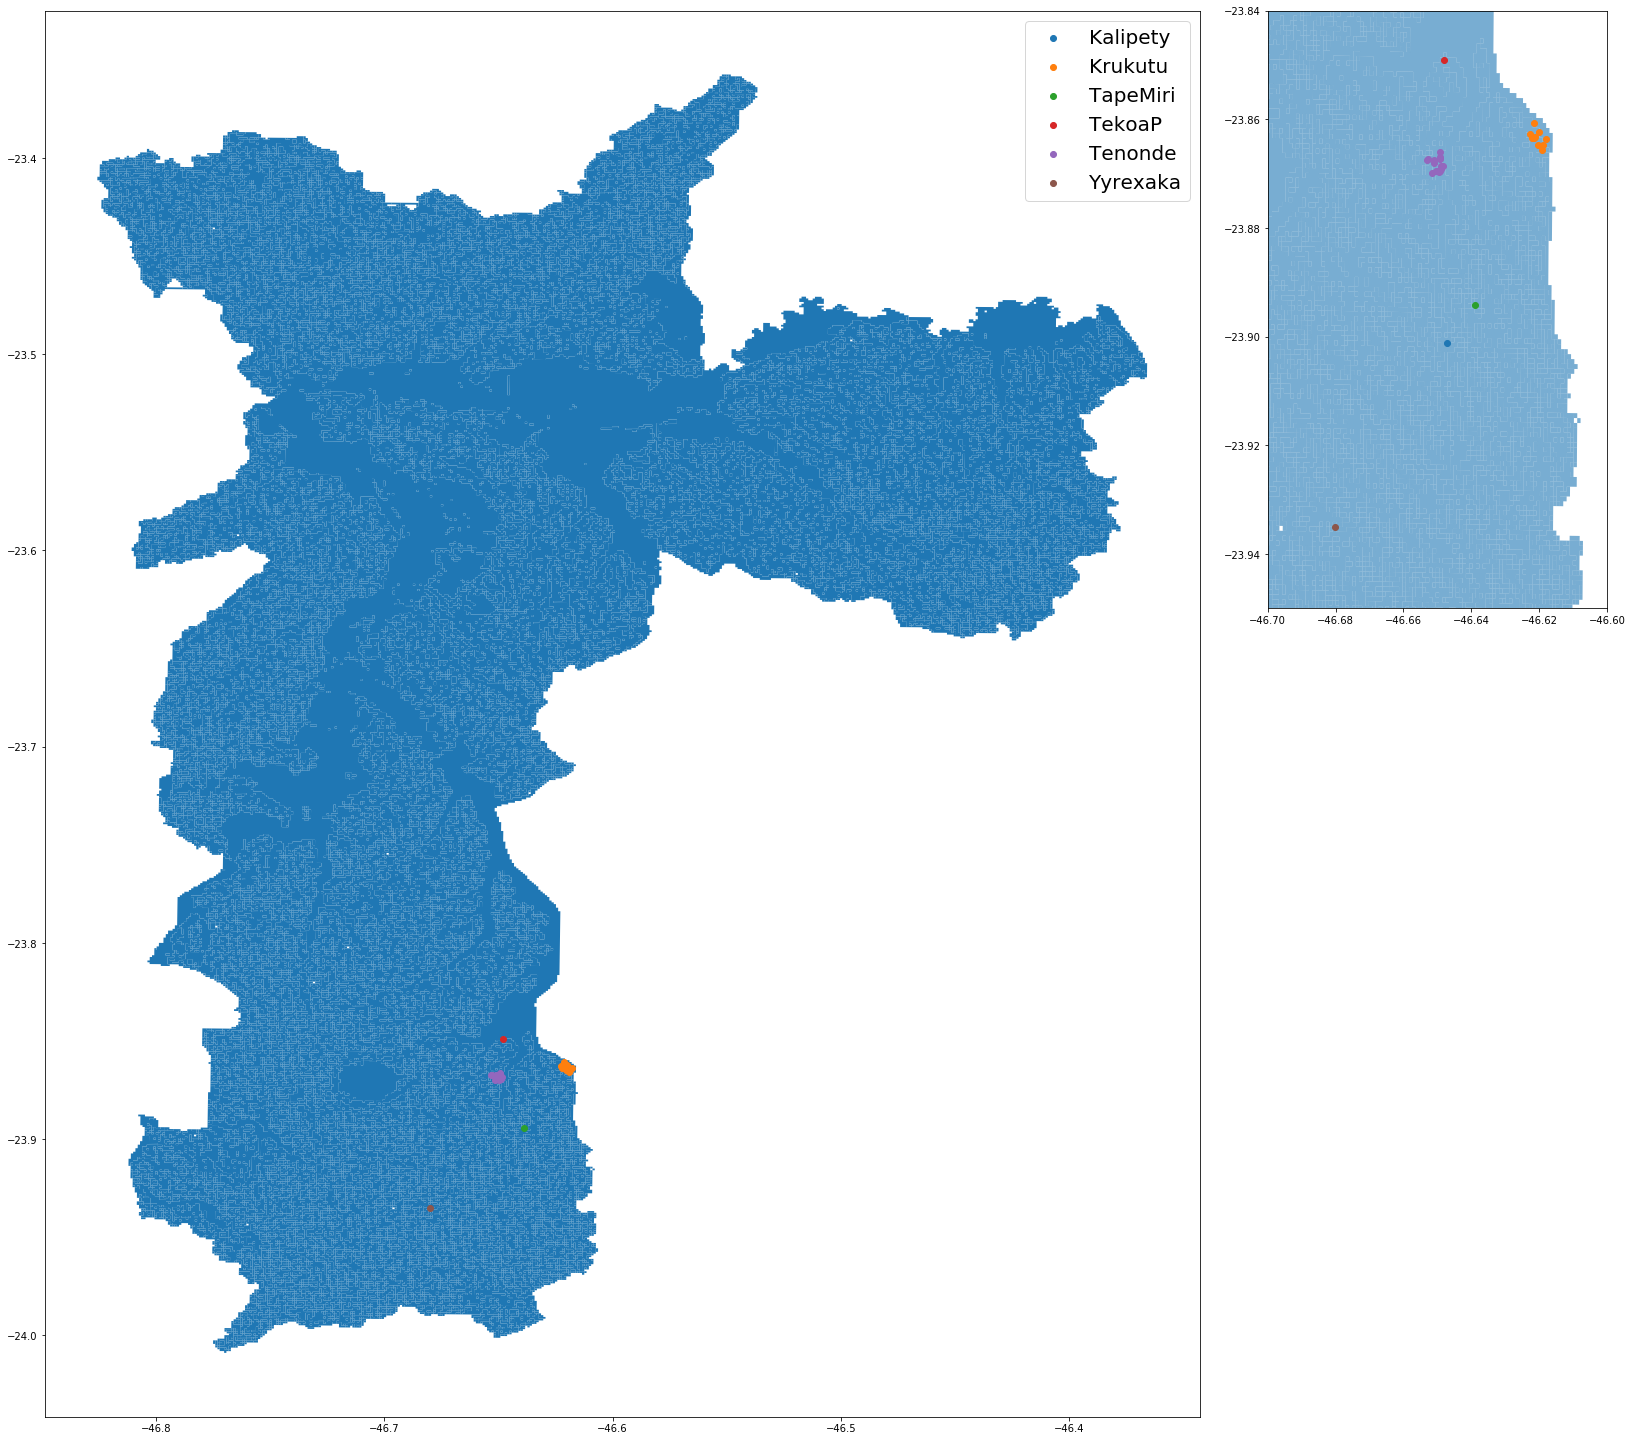

In [453]:
gridspec.GridSpec(4,4)
from matplotlib.pyplot import figure
figure(num=None, figsize=(28, 35), facecolor='w', edgecolor='k')

gridspec.GridSpec(6,4)
ax = plt.subplot2grid((4,4), (0,0), colspan=3, rowspan=3)

teste.plot(ax=ax, alpha=1)
for name, group in geo_df.groupby('Aldeia'):
    group.plot(label=name, ax=ax)

plt.legend(fontsize=20)
    
ax2 = plt.subplot2grid((6,4), (0,3), colspan=2, rowspan=2)

teste.plot(ax=ax2, alpha=1)
for name, group in geo_df.groupby('Aldeia'):
    group.plot(label=name, ax=ax2)


ax2.set_ylim([-23.95, -23.84])
ax2.set_xlim([-46.7, -46.6])
plt.savefig('mapa.png', dpi=100, bbox_inches='tight')
#plt.suptitle('Aldeias guarani do Município de São Paulo')

In [479]:
distrito.head()

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST COD_SUB  \
0      4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47      27   
1      4.0  8583484.0         1.0     JD SAO LUIS        JDS       46      18   
2      4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5      21   
3      4.0  8583479.0         1.0         JAGUARA        JAG       40      08   
4      4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93      29   

   DATA_CRIAC  USUARIO_ID                                           geometry  
0  2007-03-19         0.0  POLYGON ((-46.44622454666138 -23.5565080755499...  
1  2007-03-19         0.0  POLYGON ((-46.75837535443548 -23.6485912240209...  
2  2007-03-19         0.0  POLYGON ((-46.47500966228348 -23.5238137473753...  
3  2007-03-19         0.0  POLYGON ((-46.75599587331336 -23.4951613574067...  
4  2007-03-19         0.0  POLYGON ((-46.58146994582895 -23.5729872790950...

No handles with labels found to put in legend.


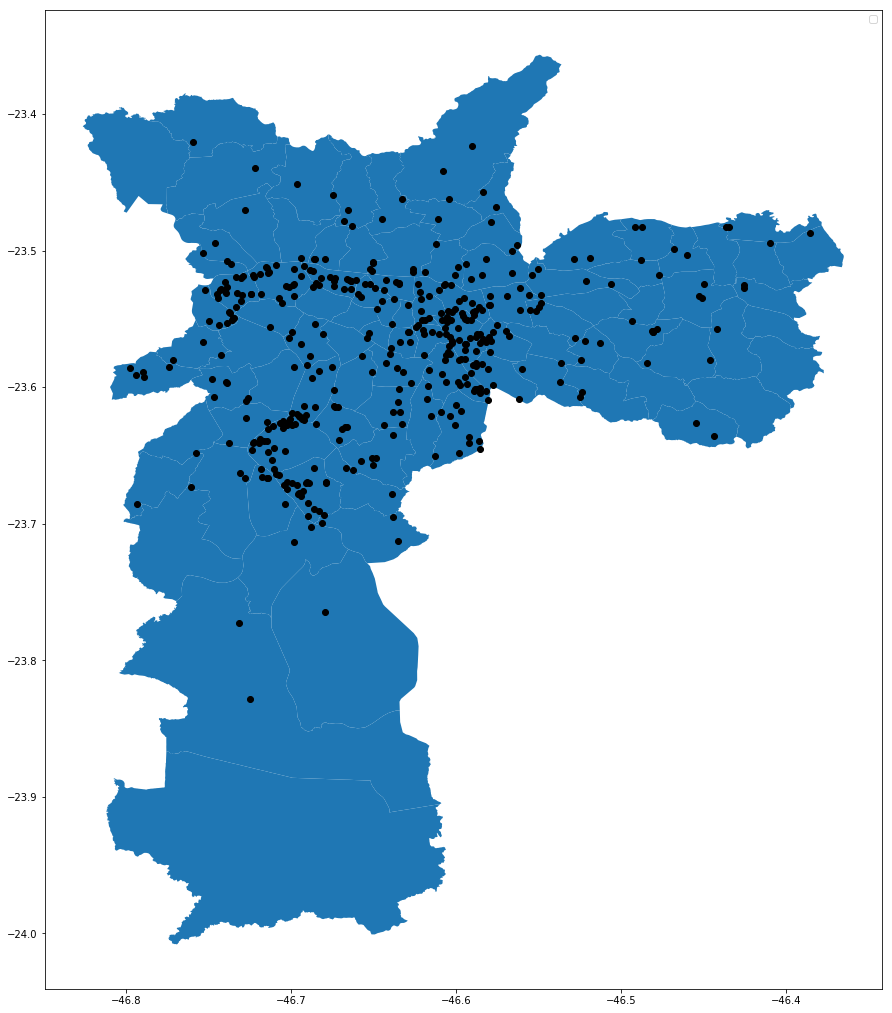

In [533]:
conta = gpd.read_file('files/DEINFO_AREAS_CONTAMINADAS.shp')
conta = conta.to_crs({'init': 'epsg:4326'}) 

distrito = gpd.read_file('files/DEINFO_DISTRITO.shp')
distrito = distrito.to_crs({'init': 'epsg:4326'}) 

fig, ax = plt.subplots(figsize = (15, 18))
distrito.plot(ax=ax)
conta.plot(ax=ax, color='black')
plt.legend()

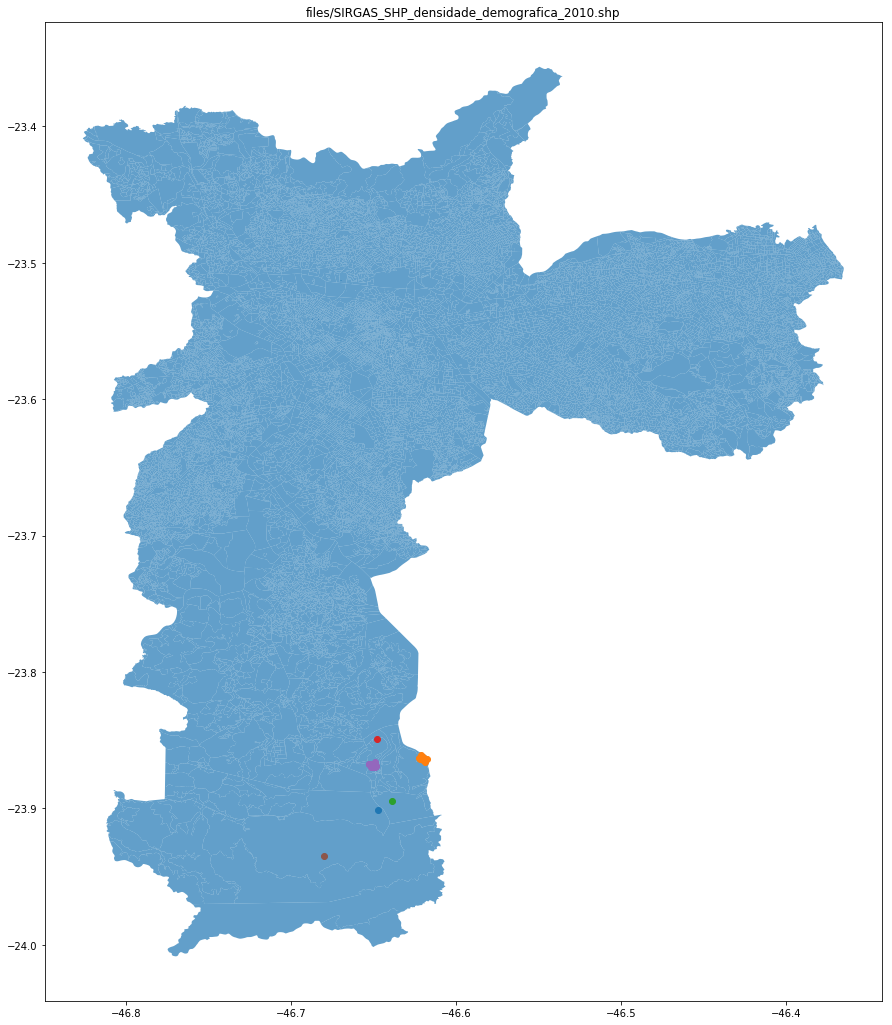

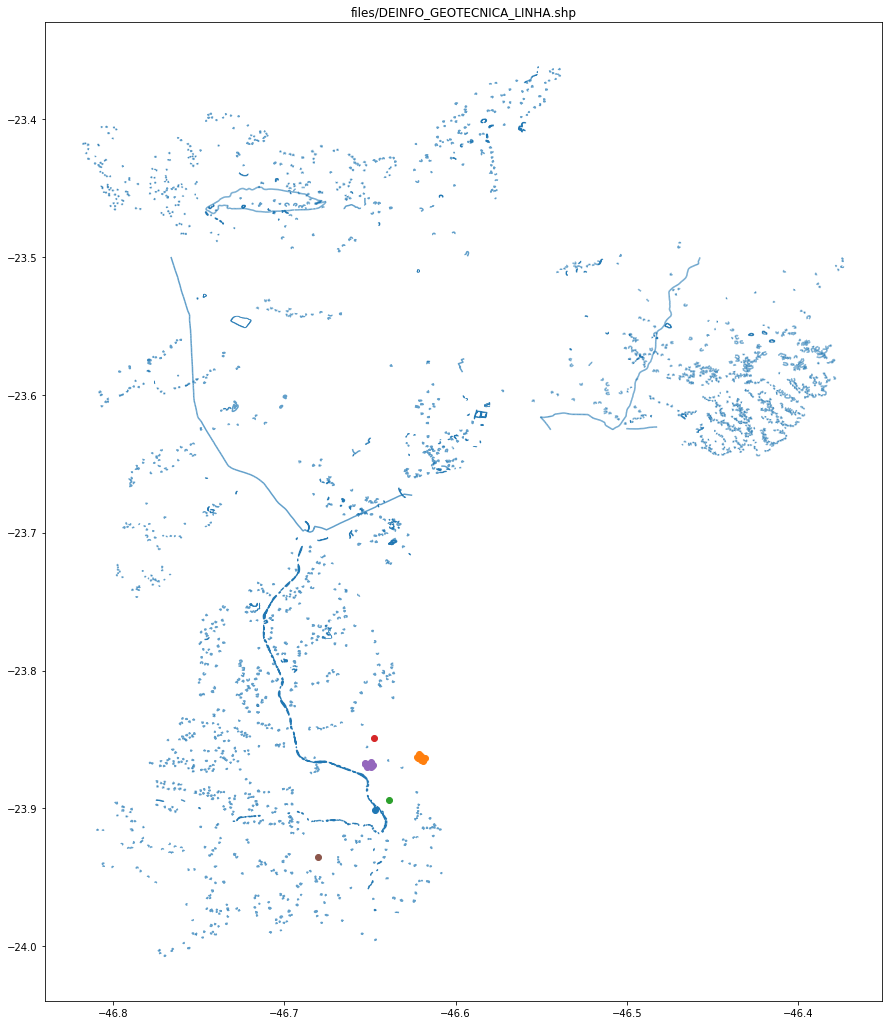

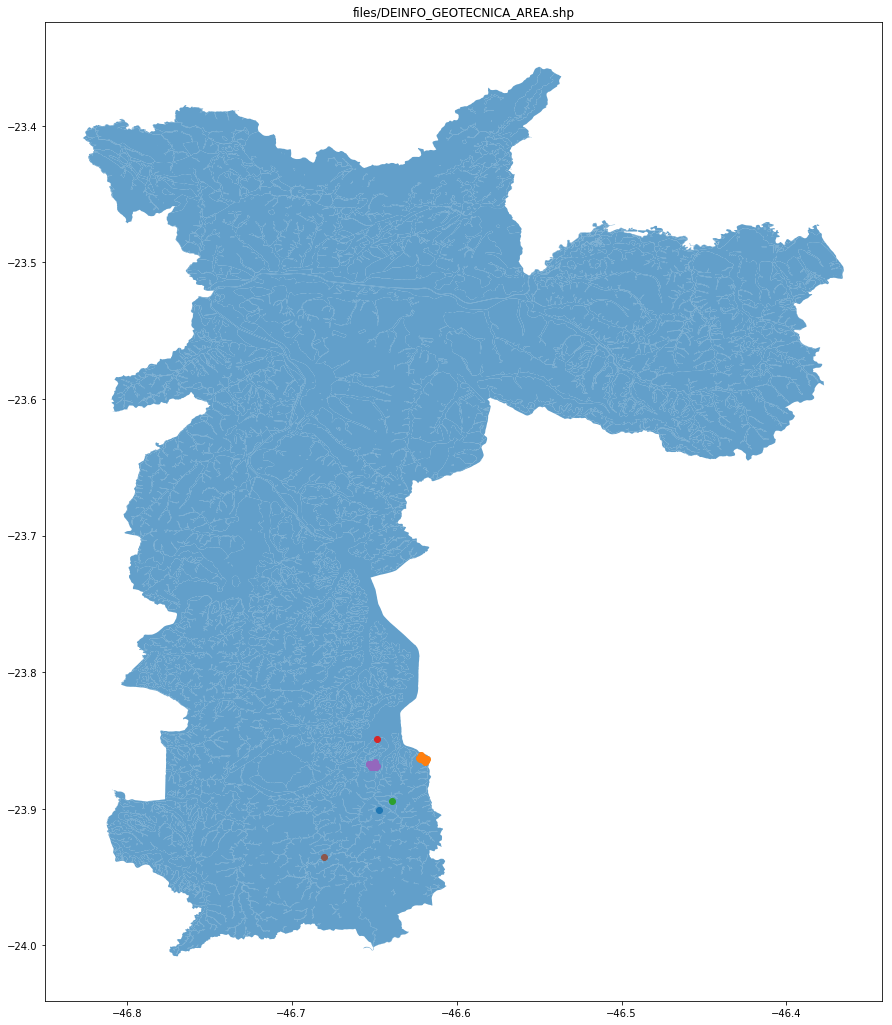

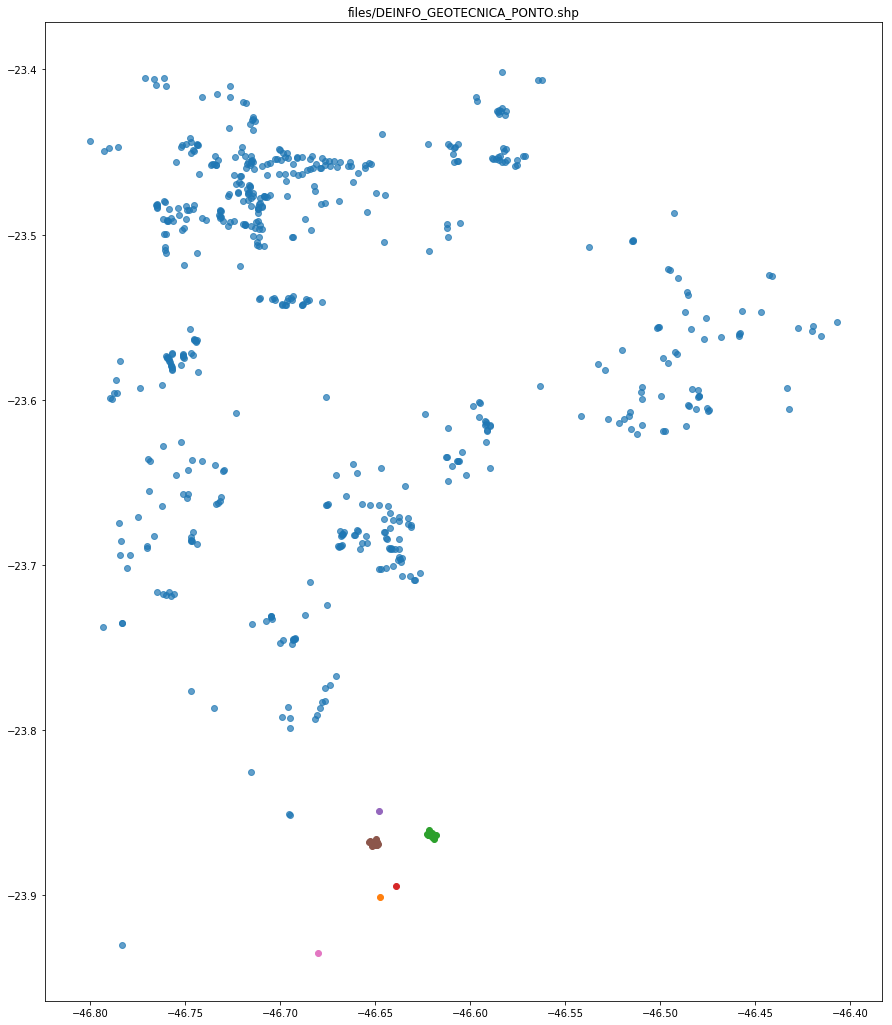

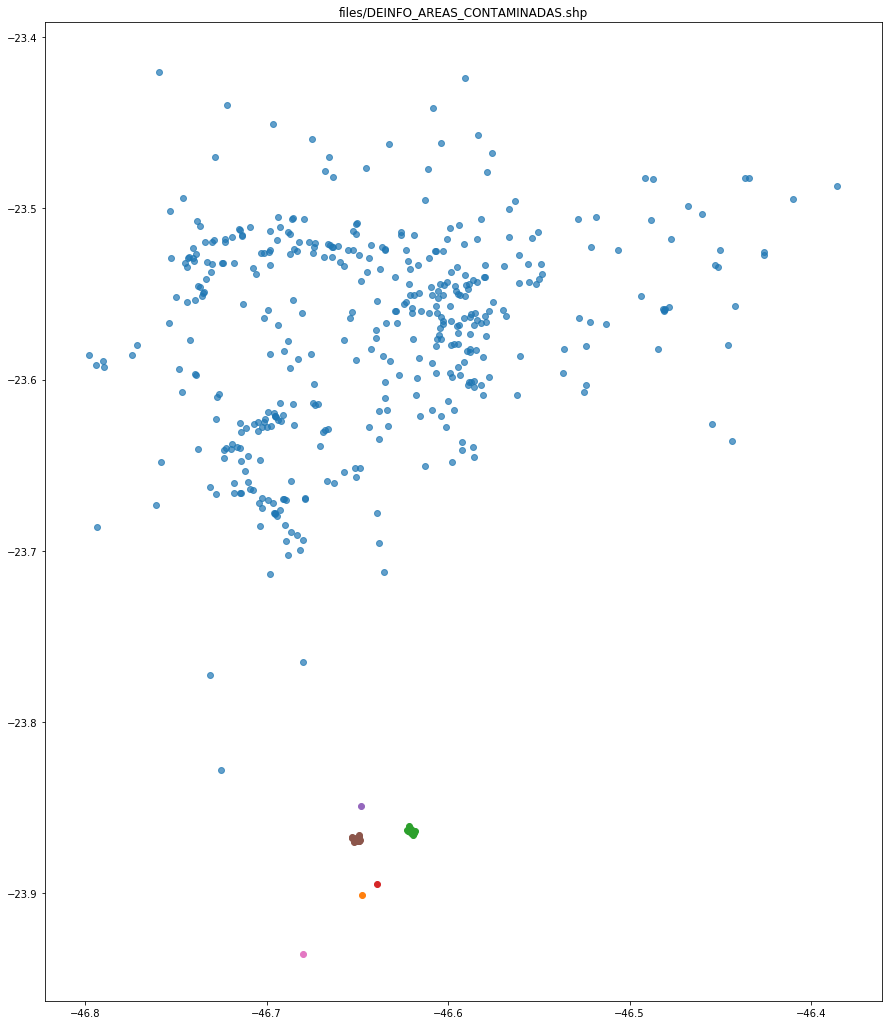

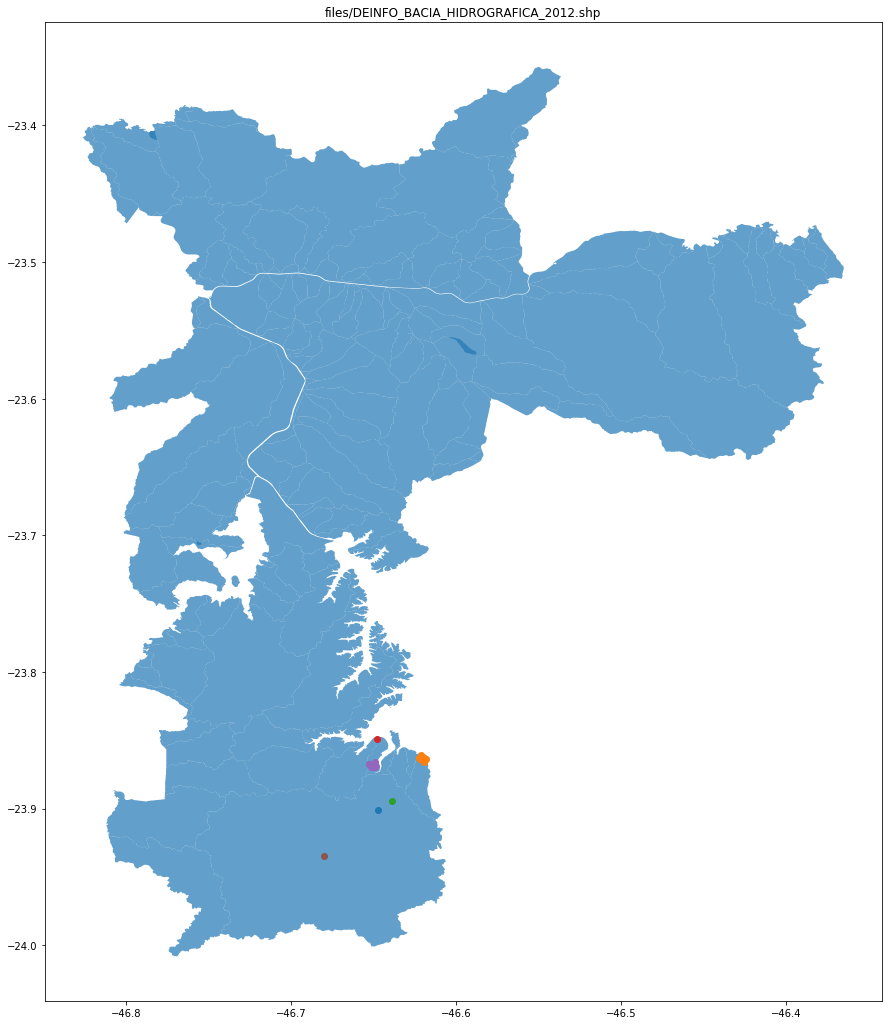

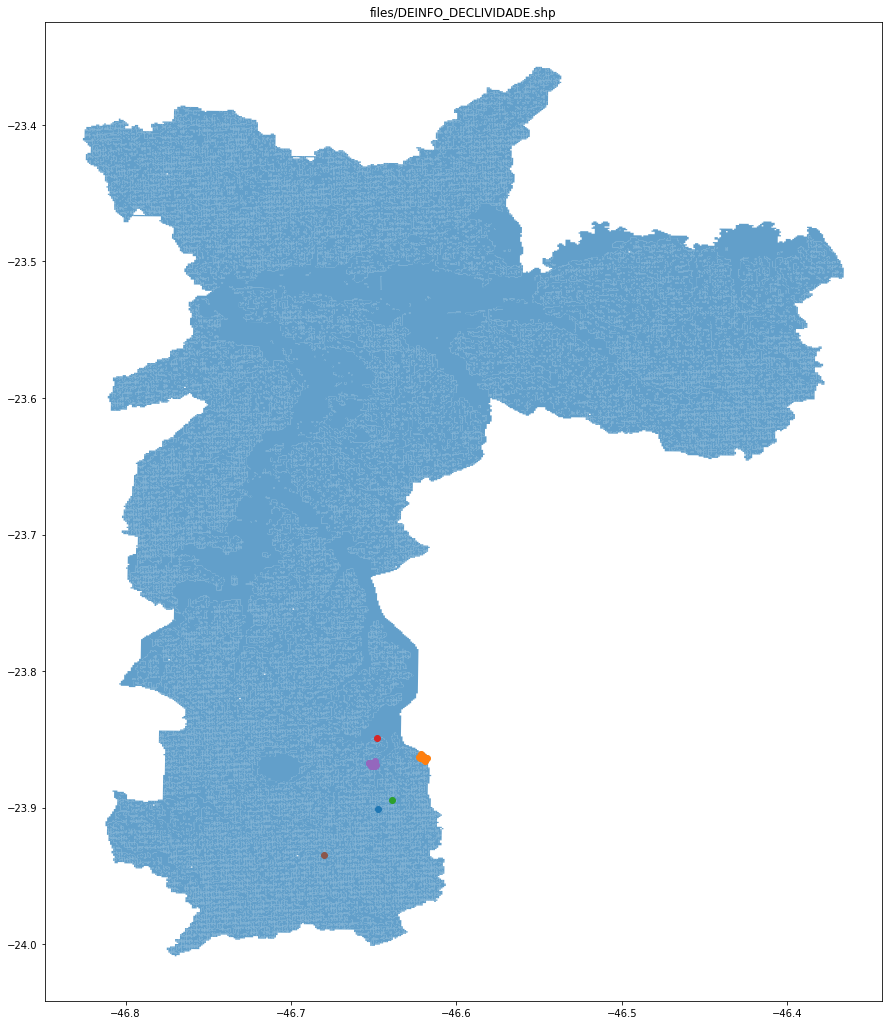

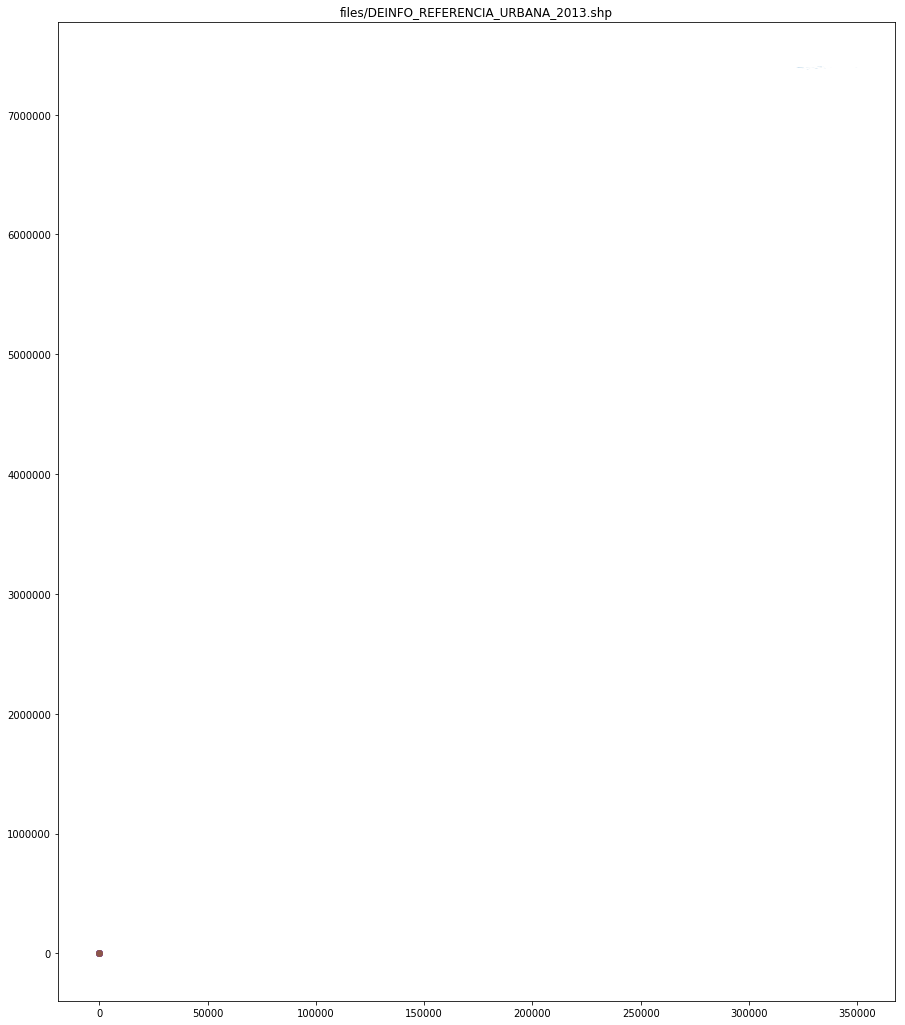

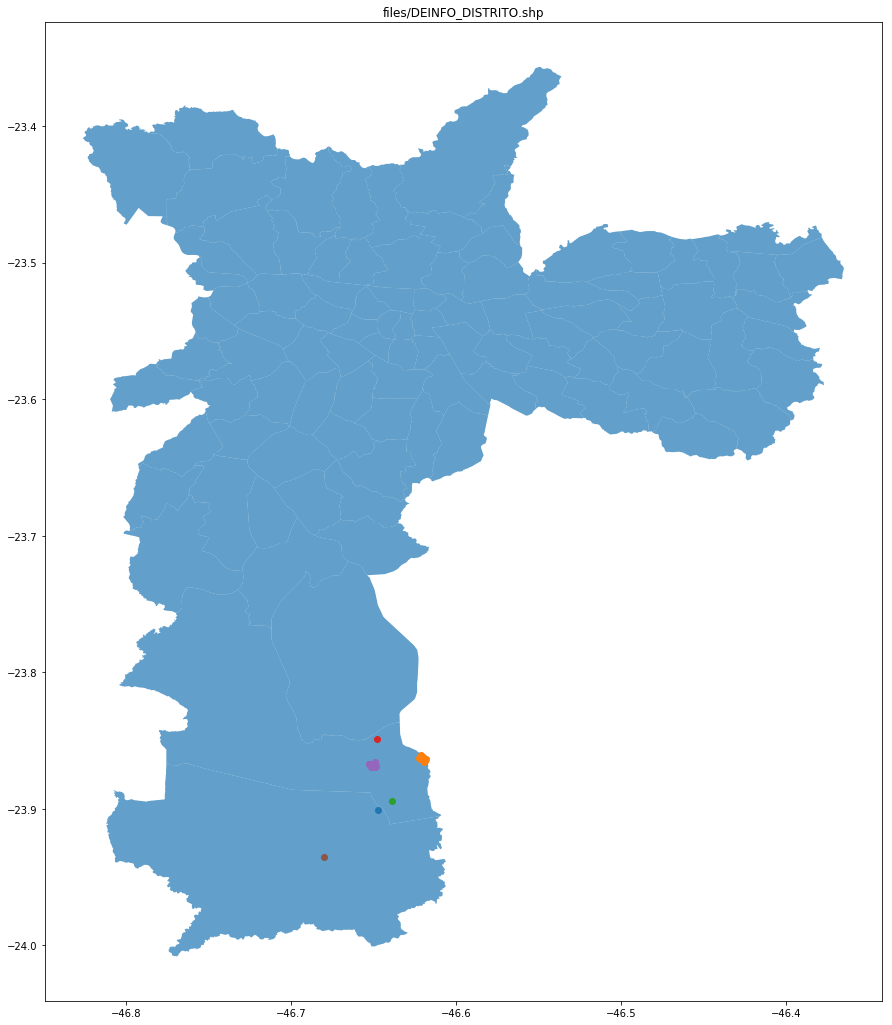

In [475]:
path = 'files/' # use your path
all_files = glob.glob(path + "/*.shp")

maps = []

for filename in all_files:
    try:
        df = gpd.read_file(filename)
        df = df.to_crs({'init': 'epsg:4326'}) 
        maps.append(df)
    except:
        pass
    
    fig, ax = plt.subplots(figsize = (15, 18))
    df.plot(ax=ax, alpha=.7)
    for name, group in geo_df.groupby('Aldeia'):
        group.plot(label=name, ax=ax)
    plt.title(filename)


In [667]:
aldeia.index('Krukutu')

1

In [673]:
np.array(muito)

array([Index(['Milho_avaxi', 'Mandioca_mandi_o', 'Feij_o_kumanda', 'Ab_bora_anda',
       'Inhame', 'Frut_feras_em_geral', 'Hortali_as_em_geral'],
      dtype='object'),
       Index(['Mandioca_mandi_o', 'Batata_doce_jety', 'Milho_avaxi',
       'Frut_feras_em_geral', 'Feij_o_kumanda', 'Hortali_as_em_geral',
       'Banana_pakova', 'Ab_bora_anda', 'Cana_sorgo_takua_re_e_miri'],
      dtype='object'),
       Index(['Mandioca_mandi_o', 'Feij_o_kumanda', 'Batata_doce_jety',
       'Ab_bora_anda'],
      dtype='object'),
       Index(['Hortali_as_em_geral'], dtype='object'),
       Index(['Milho_avaxi', 'Mandioca_mandi_o', 'Batata_doce_jety', 'Banana_pakova',
       'Feij_o_kumanda', 'Frut_feras_em_geral', 'Amendoim_manduvi',
       'Ab_bora_anda', 'Hortali_as_em_geral', 'Arroz_aroi',
       'Cana_sorgo_takua_re_e_miri'],
      dtype='object'),
       Index(['Banana_pakova', 'Frut_feras_em_geral'], dtype='object')],
      dtype=object)

In [219]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

In [227]:
df['Milho - avaxi'] = df['Milho_avaxi']
df['Banana - pakova'] = df['Banana_pakova']
df['Madioca - mandi\'o'] = df['Mandioca_mandi_o']
df['Feijão - kumanda'] = df['Feij_o_kumanda']
df['Batata-doce - jety'] = df['Batata_doce_jety']
df['Amendoim - manduvi'] = df['Amendoim_manduvi']
df['Abóbora - andaí'] = df['Ab_bora_anda']
df['Melancia - xanjau'] = df['Melancia_xanjau']
df['Frutíferas em geral'] = df['Frut_feras_em_geral']
df['Hortaliças em geral'] = df['Hortali_as_em_geral']
df['Arroz - aroi'] = df['Arroz_aroi']
df['Cana/sorgo - takua re\'e miri'] = df['Cana_sorgo_takua_re_e_miri']

In [230]:
aldeia, muito, pouco = [], [], []
for name, group in df[['Aldeia','Milho - avaxi', 'Banana - pakova', 'Madioca - mandi\'o', 'Feijão - kumanda', 'Batata-doce - jety', 'Amendoim - manduvi', 'Abóbora - andaí', 'Melancia - xanjau', 'Inhame', 'Frutíferas em geral', 'Hortaliças em geral', 'Arroz - aroi', 'Cana/sorgo - takua re\'e miri', 'Outras']].groupby('Aldeia'):
    aldeia.append(name)
    df_T = pd.DataFrame(data=group.iloc[:,1:].apply(pd.Series.value_counts)).fillna(0).T.sort_values(by=1, ascending=False)
    muito.append(df_T[df_T[1]!=0].index.tolist())
    try:
        df_T = pd.DataFrame(data=group.iloc[:,1:].apply(pd.Series.value_counts)).fillna(0).T.sort_values(by=3, ascending=False)
        pouco.append(df_T[df_T[3]!=0].index.tolist())
    except:
        pouco.append([''])

In [232]:
muito

[['Milho - avaxi',
  "Madioca - mandi'o",
  'Feijão - kumanda',
  'Abóbora - andaí',
  'Inhame',
  'Frutíferas em geral',
  'Hortaliças em geral'],
 ["Madioca - mandi'o",
  'Batata-doce - jety',
  'Milho - avaxi',
  'Frutíferas em geral',
  'Feijão - kumanda',
  'Hortaliças em geral',
  'Banana - pakova',
  'Abóbora - andaí',
  "Cana/sorgo - takua re'e miri"],
 ["Madioca - mandi'o",
  'Feijão - kumanda',
  'Batata-doce - jety',
  'Abóbora - andaí'],
 ['Hortaliças em geral'],
 ['Milho - avaxi',
  "Madioca - mandi'o",
  'Batata-doce - jety',
  'Banana - pakova',
  'Feijão - kumanda',
  'Frutíferas em geral',
  'Amendoim - manduvi',
  'Abóbora - andaí',
  'Hortaliças em geral',
  'Arroz - aroi',
  "Cana/sorgo - takua re'e miri"],
 ['Banana - pakova', 'Frutíferas em geral']]

In [234]:
df.Aldeia.unique()

array(['Tekoa Porã', 'Yrexakã', 'Tape Mirim', 'Kalipety', 'Krukutu',
       'Tenonde Porã'], dtype=object)

In [235]:
pos

aldeia       x       y
0      Kalipety -46.663 -23.910
1       Krukutu -46.625 -23.856
2    Tape Mirim -46.635 -23.895
3    Tekoa Porã -46.650 -23.844
4  Tenonde Porã -46.673 -23.880
5       Yrexakã -46.690 -23.930

In [239]:
pos[pos.aldeia=='Tekoa Porã'].y.values[0]

-23.844

In [242]:
name='Tekoa Porã'

In [243]:
pos[pos.aldeia==name].x.values[0], pos[pos.aldeia==name].y.values[0]

(-46.65, -23.844)

In [358]:
maps.head()

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST COD_SUB  \
0      4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47      27   
1      4.0  8583484.0         1.0     JD SAO LUIS        JDS       46      18   
2      4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5      21   
3      4.0  8583479.0         1.0         JAGUARA        JAG       40      08   
4      4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93      29   

   DATA_CRIAC  USUARIO_ID                                           geometry  
0  2007-03-19         0.0  POLYGON ((-46.44622454666138 -23.5565080755499...  
1  2007-03-19         0.0  POLYGON ((-46.75837535443548 -23.6485912240209...  
2  2007-03-19         0.0  POLYGON ((-46.47500966228348 -23.5238137473753...  
3  2007-03-19         0.0  POLYGON ((-46.75599587331336 -23.4951613574067...  
4  2007-03-19         0.0  POLYGON ((-46.58146994582895 -23.5729872790950...

In [64]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
geo_df = gpd.GeoDataFrame(df, crs= crs, geometry = geometry)

KeyError: 'lat'

In [346]:
pos = pd.DataFrame({'aldeia':['Kalipety', 'Krukutu', 'Tape Mirim', 'Tekoa Porã', 'Tenonde Porã', 'Yrexakã'], \
                   'x' : [-46.663, -46.625, -46.635,-46.65, -46.675, -46.69],
                   'y': [-23.91, -23.856, -23.895, -23.844, -23.88, -23.93]})

geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs= crs, geometry = geometry)


maps = open_map('DEINFO_DISTRITO')
fig, ax = plt.subplots(figsize = (18, 18),dpi=100)
    
ax.set_ylim([-23.95, -23.82])
ax.set_xlim([-46.7, -46.6])
k=0
maps.plot(ax=ax, alpha=.6,edgecolor='grey')
for name, group in geo_df.groupby('Aldeia'):
    group.plot(label='Aldeia '+name, ax=ax, color=colors[k])
    bbox_props = dict(boxstyle='round,pad=.5', fc=colors[k], alpha=.75)
    text=''

    for i in muito[aldeia.index(name)]:
        if (i!=muito[aldeia.index(name)][-1]):
            text+= i+'\n'
        else:
            text+=i
        
    k+=1
    ax.text(pos[pos.aldeia==name].x.values[0], pos[pos.aldeia==name].y.values[0], text,size=14, fontdict={'family':'Helvetica'}, bbox=bbox_props)

ax.text(-46.66, -23.94, s='MARSILAC', color='w', alpha=.25, fontsize=22)
ax.text(-46.695, -23.87, s='PARELHEIROS', color='w', alpha=.25, fontsize=22)
ax.text(-46.67, -23.83, s='GRAJAÚ', color='w', alpha=.25, fontsize=22)



plt.legend(fontsize=12, loc='upper left')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Tipos de plantio presentes na área do grupo\nOrdem decrescente de frequência de uso', fontsize=16)
#plt.savefig('Plantio_0301-2.png', dpi=200)

KeyError: 'lat'

In [26]:
for col in df.columns:
    print(col)

start
end
today
deviceid
Unidade_Produtiva
Aldeia
Data
Record_your_current_location
_Record_your_current_location_latitude
_Record_your_current_location_longitude
_Record_your_current_location_altitude
_Record_your_current_location_precision
Tamanho_do_grupo
Adultos_grupo
Quantos_est_o_em_tra_ou_bolsas_por_sexo
Homem
Mulher
Quantos_est_o_em_tra_ou_bolsas_por_tipo
Escola_Estadual
Ceci
Posto_de_Sa_de
Agente_ambiental_ou_cultural
Emprego_para_n_o_ind_gena_fora_da_aldeia
Outro
Qual_outro_001
Quantos_recebem_bene_ociais_e_quais_tipos
Aposentadoria
Aux_lios_regulares_efici_ncia_reclus_o
Bolsa_fam_lia
Outro_001
Qual_outro_002
Onde_as_pessoas_do_g_ostumam_se_alimentar
Escola_Estadual_001
Ceci_001
Em_casa_ou_em_cozinh_a_do_grupo_ou_aldeia
Fora_da_aldeia_em_restaurantes_etc
Quanto_conseguem_se_a_produ_o_das_ro_as
tem_area_plantio
Por_que_n_o_plantam
Quantas_ro_as_ou_hortas
Quantas_pessoas_envo_e_cuidado_das_reas
Quantos_mais_velhos_mais_de_60_anos
Quantos_jovens_at_20_anos
Quantas_mulheres
Que_t

In [9]:
pd.DataFrame(df2.sort_values(by='Aldeia').groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum()).to_csv('adultos_aldeia.csv')



In [36]:
df[['Unidade_Produtiva', 'Aldeia', 'Tamanho_do_grupo']].to_csv('df_x.csv')

In [12]:
df2[['_id', 'Unidade_Produtiva', 'Caracterização do grupo/Quantos compõem o grupo']].to_csv('quantos_up.csv')

In [20]:
df2[['Unidade_Produtiva','adultos', 'Caracterização do grupo/Quantos compõem o grupo', 'Plantio/Quantas áreas roças ou hortas', 'Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas', 'Plantio/Quantos mais velhos (mais de 60 anos)', 'Plantio/Quantos jovens (até 20 anos)', 'Plantio/Quantas mulheres']].to_excel('planilha.xlsx')





In [24]:
df2[df2.Unidade_Produtiva=='Grupo da Yara Tenonde']

start                            end       today  \
28  2019-12-06T08:57:00.684-03:00  2019-12-16T16:31:27.061-03:00  2019-12-06   

           deviceid Nome do Grupo ou Família (unidade produtiva)  \
28  355043091213455                        Grupo da Yara Tenonde   

          Aldeia Data de hoje  \
28  Tenonde Porã   2019-12-06   

                        Record your current location  \
28  -23.867521919310093 -46.65102663449943 769.0 4.5   

    _Record your current location_latitude  \
28                              -23.867522   

    _Record your current location_longitude  ...  escola  ceci  posto  agente  \
28                               -46.651027  ...     2.0   1.0    3.0     2.0   

    fora  outra_ocupacao  outro  trabalho_roça  adultos  fora_roça  
28   NaN             NaN    NaN              3       23        6.0  

[1 rows x 265 columns]

In [99]:
df2['grupo'] = df2['Caracterização do grupo/Quantos compõem o grupo']
df2['envolvidos'] = df2['Plantio/Quantas pessoas envolvidas no plantio e cuidado das áreas']
df2['mais_velhos'] = df2['Plantio/Quantos mais velhos (mais de 60 anos)']
df2['mais_novos'] = df2['Plantio/Quantos jovens (até 20 anos)']
df2['mulheres'] = df2['Plantio/Quantas mulheres']

In [103]:
pd.DataFrame(df2.groupby('Aldeia').envolvidos.sum()).to_csv('Aldeia_envolvidos.csv')

In [15]:
df2.adultos.sum()

281

In [16]:
data={'adultos':df2.adultos.sum(), 'grupo':df2.grupo.sum(), 'envolvidos':df2.envolvidos.sum(), 'mais_velhos':df2.mais_velhos.sum(), 'mais_novos':df2.mais_novos.sum(), 'mulheres':df2.mulheres.sum()  }




In [17]:
ti = pd.DataFrame(data, index=[0])

In [18]:
ti.head()

adultos  grupo  envolvidos  mais_velhos  mais_novos  mulheres
0      281    492         126         16.0        35.0      57.0

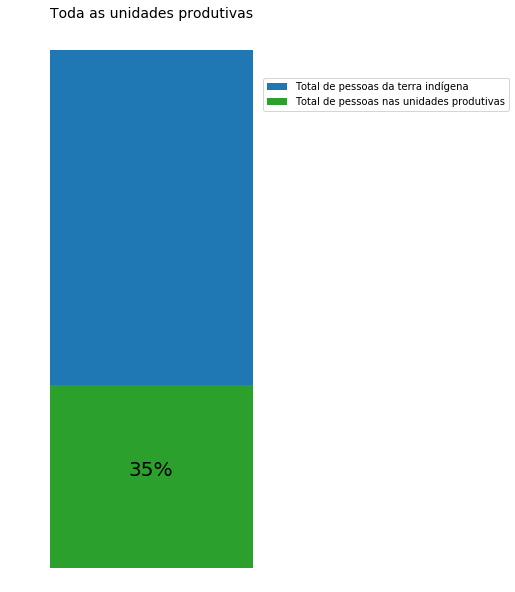

In [316]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar([0], 1390, label='Total de pessoas da terra indígena', color='tab:blue')
ax.bar([0], ti.grupo, label='Total de pessoas nas unidades produtivas', color='tab:green')

plt.legend(loc=(1,.84))
ax.text(0, 492/2, str(int(492*100/(1390)))+'%', fontsize=20, horizontalalignment='center')
plt.title('Toda as unidades produtivas', fontsize=14)
plt.axis('off')
plt.savefig('2d.TI_adultos.png', dpi=200, bbox_inches='tight')

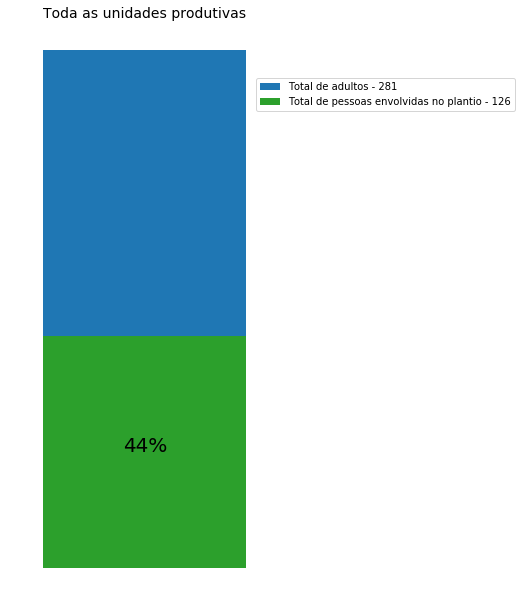

In [31]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar([0], ti.adultos, label='Total de adultos - 281', color='tab:blue')
ax.bar([0], ti.envolvidos, label='Total de pessoas envolvidas no plantio - 126', color='tab:green')
plt.legend(loc=(1,.84))
ax.text(0, 126/2, str(int(126*100/(281)))+'%', fontsize=20, horizontalalignment='center')
plt.title('Toda as unidades produtivas', fontsize=14)
plt.axis('off')
plt.savefig('2c.TI_adultos.png', dpi=200, bbox_inches='tight')

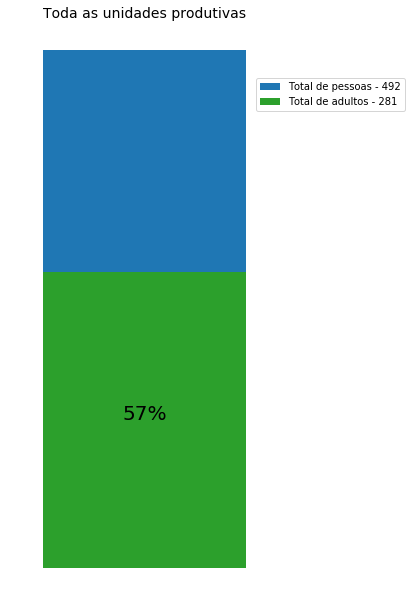

In [26]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar([0], ti.grupo, label='Total de pessoas - 492')
ax.bar([0], ti.adultos, label='Total de adultos - 281', color='tab:green')
plt.legend(loc=(1,.84))
ax.text(0, 281/2, str(int(281*100/492))+'%', fontsize=20, horizontalalignment='center')
plt.title('Toda as unidades produtivas', fontsize=14)
plt.axis('off')
plt.savefig('2b.TI_adultos.png', dpi=200, bbox_inches='tight')

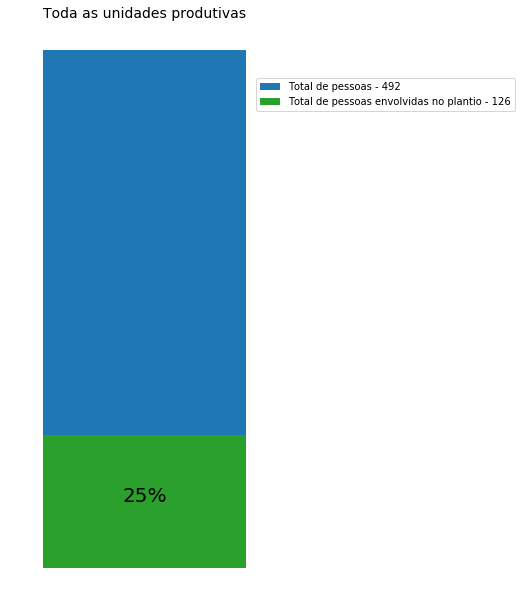

In [25]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar([0], ti.grupo, label='Total de pessoas - 492')
ax.bar([0], ti.envolvidos, label='Total de pessoas envolvidas no plantio - 126', color='tab:green')
plt.legend(loc=(1,.84))
ax.text(0, 126/2, str(int(126*100/492))+'%', fontsize=20, horizontalalignment='center')
plt.title('Toda as unidades produtivas', fontsize=14)
plt.axis('off')
plt.savefig('2a.TI_plantio.png', dpi=200, bbox_inches='tight')

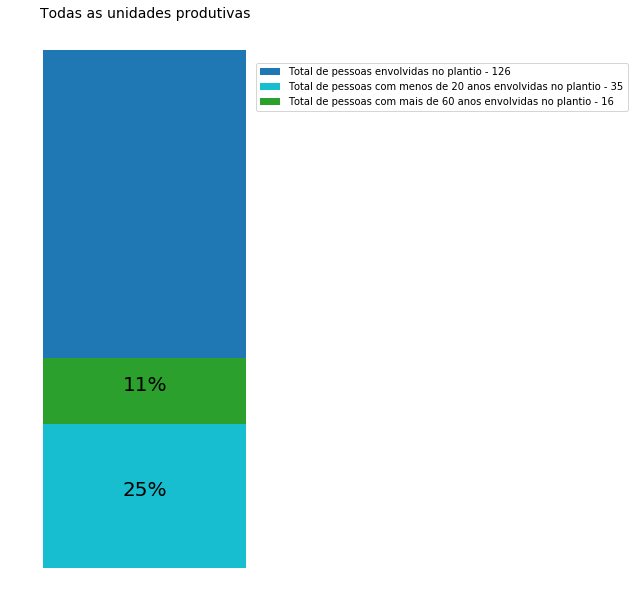

In [32]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar([0], ti.envolvidos, label='Total de pessoas envolvidas no plantio - 126', color='tab:blue')
ax.bar([0], ti.mais_novos, label='Total de pessoas com menos de 20 anos envolvidas no plantio - 35', color='tab:cyan')
ax.bar([0], ti.mais_velhos,bottom=ti.mais_novos, label='Total de pessoas com mais de 60 anos envolvidas no plantio - 16', color='tab:green')
plt.legend(loc=(1,.84))
ax.text(0, 35/2, str(int(35*100/136))+'%', fontsize=20, horizontalalignment='center')
ax.text(0, 35+16/2, str(int(16*100/136))+'%', fontsize=20, horizontalalignment='center')
plt.title('Todas as unidades produtivas', fontsize=14)
plt.axis('off')
plt.savefig('3.TI_etario.png', dpi=200, bbox_inches='tight')

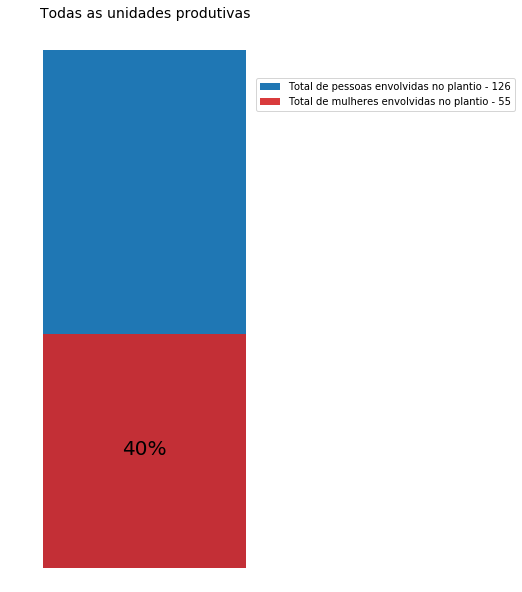

In [33]:
fig, ax = plt.subplots(figsize=(4,10))
ax.bar([0], ti.envolvidos, label='Total de pessoas envolvidas no plantio - 126', color='tab:blue')
ax.bar([0], ti.mulheres, label='Total de mulheres envolvidas no plantio - 55', color='tab:red', alpha=.9)

plt.legend(loc=(1,.84))
ax.text(0, 55/2, str(int(55*100/136))+'%', fontsize=20, horizontalalignment='center')
plt.title('Todas as unidades produtivas', fontsize=14)
plt.axis('off')
plt.savefig('4.TI_mulheres.png', dpi=200, bbox_inches='tight')

In [32]:
problema = pd.DataFrame(df2[['Plantio/Principal problema ou desafio no plantio/recuperar solo degradado', 'Plantio/Principal problema ou desafio no plantio/falta de espaço', 'Plantio/Principal problema ou desafio no plantio/falta de organização coletiva para o trabalho', 'Plantio/Principal problema ou desafio no plantio/falta de conhecimento e interesse dos jovens', 'Plantio/Principal problema ou desafio no plantio/pouca disponibilidade de sementes, mudas e ramas', 'Plantio/Principal problema ou desafio no plantio/ataque de animais', 'Plantio/Principal problema ou desafio no plantio/falta de ferramentas e infraestrutura de apoio', 'Plantio/Principal problema ou desafio no plantio/falta de água', 'Plantio/Principal problema ou desafio no plantio/outro']].sum(axis=0).values*100/df2[['Plantio/Principal problema ou desafio no plantio/recuperar solo degradado', 'Plantio/Principal problema ou desafio no plantio/falta de espaço', 'Plantio/Principal problema ou desafio no plantio/falta de organização coletiva para o trabalho', 'Plantio/Principal problema ou desafio no plantio/falta de conhecimento e interesse dos jovens', 'Plantio/Principal problema ou desafio no plantio/pouca disponibilidade de sementes, mudas e ramas', 'Plantio/Principal problema ou desafio no plantio/ataque de animais', 'Plantio/Principal problema ou desafio no plantio/falta de ferramentas e infraestrutura de apoio', 'Plantio/Principal problema ou desafio no plantio/falta de água', 'Plantio/Principal problema ou desafio no plantio/outro']].sum(axis=0).values.sum()).T




In [33]:
problema

0          1          2         3          4         5          6  \
0  11.827957  12.903226  11.827957  9.677419  10.752688  26.88172  10.752688   

          7         8  
0  3.225806  2.150538

In [34]:
problema.columns = ['Solo degradado - 12%', 'Falta de espaço - 13%', 'Falta de organização coletiva - 12%', 'Falta de conhecimento/interesse dos jovens - 9%', 'Poucas sementes, mudas e ramas - 11%', 'Ataque de animais - 27%', 'Falta de infraestrutura - 11%', 'Falta de água - 3%', 'Outro - 2%']





In [40]:
problema.iloc[:, ::-1].T.sort_values(by=0).T

Outro - 2%  Falta de água - 3%  \
0    2.150538            3.225806   

   Falta de conhecimento/interesse dos jovens - 9%  \
0                                         9.677419   

   Falta de infraestrutura - 11%  Poucas sementes, mudas e ramas - 11%  \
0                      10.752688                             10.752688   

   Falta de organização coletiva - 12%  Solo degradado - 12%  \
0                            11.827957             11.827957   

   Falta de espaço - 13%  Ataque de animais - 27%  
0              12.903226                 26.88172

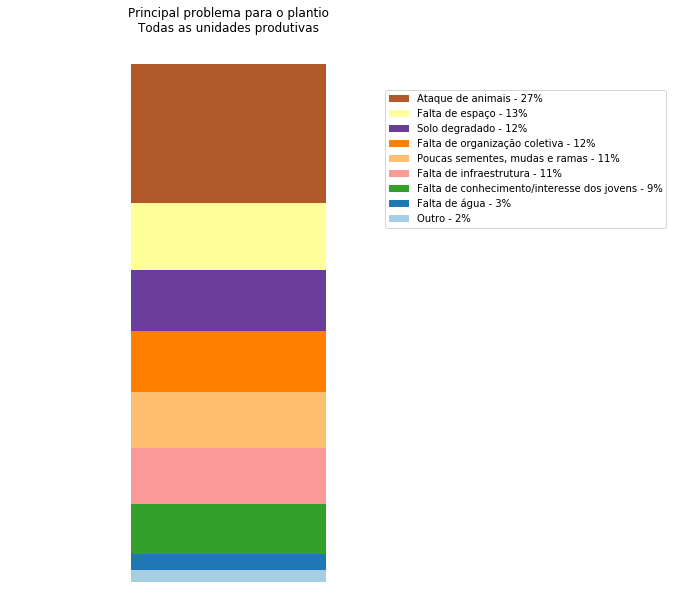

In [47]:
fig, ax = plt.subplots(figsize=(7,10))
problema.iloc[:, ::-1].T.sort_values(by=0).T.plot.bar(stacked=True, ax=ax, cmap='Paired')
plt.title('Principal problema para o plantio\nTodas as unidades produtivas')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(.9,.65))
plt.axis('off')
plt.savefig('44b.problema_TI.png', dpi=200, bbox_inches='tight')

In [90]:
Plantio/Já participaram ou tiveram apoio de projetos ou ações de fortalecimento do plantio?
Plantio/Há locais específicos para desenvolvimento e cuidado de mudas na área?

Solo degradado  Falta de espaço  Falta de organização coletiva  \
0       11.827957        12.903226                      11.827957   

   Falta de conhecimento/interesse dos jovens  Poucas sementes, mudas e ramas  \
0                                    9.677419                       10.752688   

   Ataque de animais  Falta de infraestrutura  Falta de água     outro  
0           26.88172                10.752688       3.225806  2.150538

In [134]:
df2['Plantio/Já participaram ou tiveram apoio de projetos ou ações de fortalecimento do plantio?'].value_counts()['Não']

12

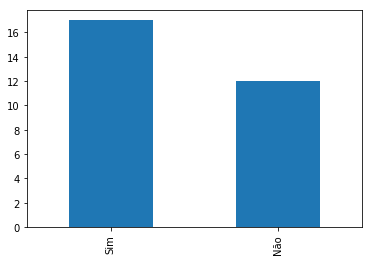

In [121]:
df2['Plantio/Já participaram ou tiveram apoio de projetos ou ações de fortalecimento do plantio?'].value_counts().T.plot.bar(stacked=True)




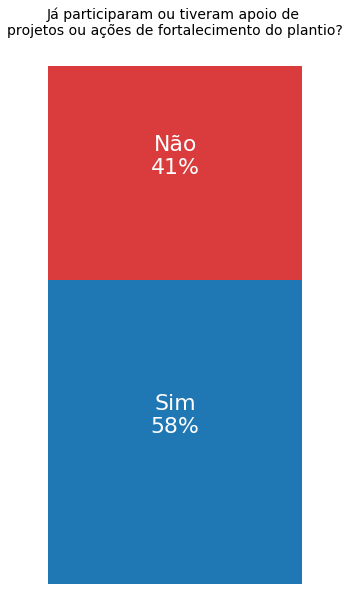

In [34]:
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(0, df2['Plantio/Já participaram ou tiveram apoio de projetos ou ações de fortalecimento do plantio?'].value_counts()['Sim'], label='Sim')
ax.bar(0, df2['Plantio/Já participaram ou tiveram apoio de projetos ou ações de fortalecimento do plantio?'].value_counts()['Não'], bottom = 17, color='tab:red', alpha=.9, label='Não')
handles, labels = ax.get_legend_handles_labels()
ax.text(0, 17/2, 'Sim\n'+str(int(17*100/(17+12)))+'%', horizontalalignment='center', fontsize=22, color='white')
ax.text(0, 17+12/2, 'Não\n'+str(int(12*100/(17+12)))+'%', horizontalalignment='center', fontsize=22, color='white')
#ax.legend(handles[::-1], labels[::-1], loc=(1,.65))
plt.title('Já participaram ou tiveram apoio de \nprojetos ou ações de fortalecimento do plantio?', fontsize=14)
plt.axis('off')
plt.savefig('5.fortalecimento.png', dpi=200, bbox_inches='tight')


In [144]:
df2['Plantio/Há locais específicos para desenvolvimento e cuidado de mudas na área?'].value_counts()['Sim']

4

In [145]:
df2['Plantio/Há locais específicos para desenvolvimento e cuidado de mudas na área?'].value_counts()['Não']

25

(-0.44000000000000006, 0.44000000000000006, 0.0, 30.45)

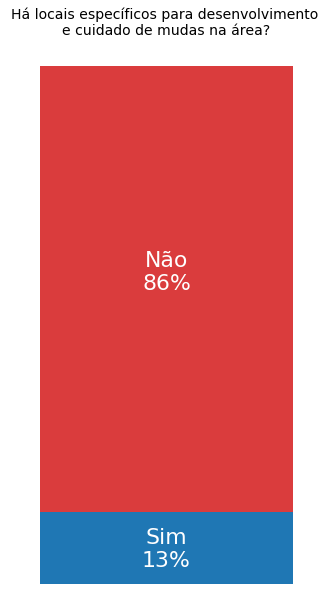

In [14]:
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(0, df2['Plantio/Há locais específicos para desenvolvimento e cuidado de mudas na área?'].value_counts()['Sim'], label='Sim')
ax.bar(0, df2['Plantio/Há locais específicos para desenvolvimento e cuidado de mudas na área?'].value_counts()['Não'], bottom = df2['Plantio/Há locais específicos para desenvolvimento e cuidado de mudas na área?'].value_counts()['Sim'], color='tab:red', alpha=.9, label='Não')
handles, labels = ax.get_legend_handles_labels()
ax.text(0, 4/2-1, 'Sim\n'+str(int(4*100/(4+25)))+'%', horizontalalignment='center', fontsize=22, color='white')
ax.text(0, 4+25/2, 'Não\n'+str(int(25*100/(4+25)))+'%', horizontalalignment='center', fontsize=22, color='white')
#ax.legend(handles[::-1], labels[::-1], loc=(1,.65))
plt.title('Há locais específicos para desenvolvimento \ne cuidado de mudas na área?', fontsize=14)
plt.axis('off')
#plt.savefig('fortalecimento2.png', dpi=200, bbox_inches='tight')


In [161]:
df2[['Plantio/Gostaria de ter mais mudas? Para que?/remédio', 'Plantio/Gostaria de ter mais mudas? Para que?/artesanato', 'Plantio/Gostaria de ter mais mudas? Para que?/ornamental', 'Plantio/Gostaria de ter mais mudas? Para que?/construção', 'Plantio/Gostaria de ter mais mudas? Para que?/reflorestamento', 'Plantio/Gostaria de ter mais mudas? Para que?/frutíferas', 'Plantio/Gostaria de ter mais mudas? Para que?/outra']].sum(axis=0).values



array([ 5,  1,  2,  0,  2, 29,  7])

In [162]:
mais_mudas = pd.DataFrame(df2[['Plantio/Gostaria de ter mais mudas? Para que?/remédio', 'Plantio/Gostaria de ter mais mudas? Para que?/artesanato', 'Plantio/Gostaria de ter mais mudas? Para que?/ornamental', 'Plantio/Gostaria de ter mais mudas? Para que?/construção', 'Plantio/Gostaria de ter mais mudas? Para que?/reflorestamento', 'Plantio/Gostaria de ter mais mudas? Para que?/frutíferas', 'Plantio/Gostaria de ter mais mudas? Para que?/outra']].sum(axis=0).values).T


In [178]:
mais_mudas.columns = ['Remédio - 11%', 'Artesanato - 2%', 'Ornamental - 4%', 'Construção - 0%', 'Reflorestamento - 4%', 'Frutíferas - 63%', 'Variedades Tradicionais - 15%']



In [179]:
mais_mudas*100/mais_mudas.sum(axis=1).values[0]

Remédio - 11%  Artesanato - 2%  Ornamental - 4%  Construção - 0%  \
0      10.869565         2.173913         4.347826              0.0   

   Reflorestamento - 4%  Frutíferas - 63%  Variedades Tradicionais - 15%  
0              4.347826         63.043478                      15.217391

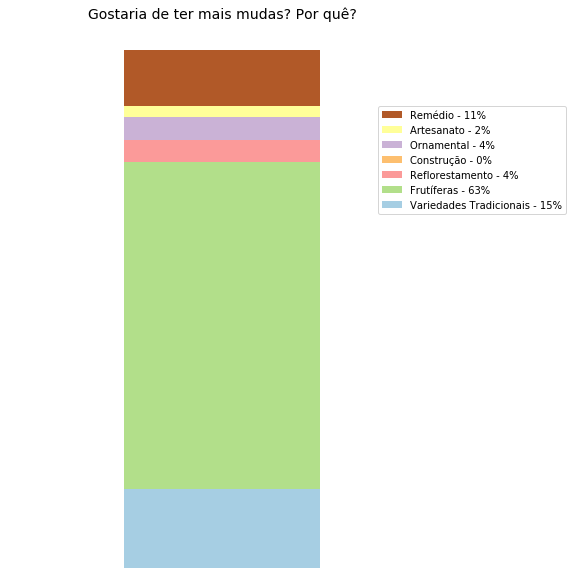

In [181]:
fig, ax = plt.subplots(figsize=(7,10))
mais_mudas.iloc[:, ::-1].plot.bar(stacked=True, ax=ax, cmap='Paired')
plt.title('Gostaria de ter mais mudas? Por quê?', fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(.9,.65))
plt.axis('off')
plt.savefig('mudas?.png', dpi=200, bbox_inches='tight')


In [ ]:
Criação de animais/Tem criação de animais para usar no sustento do grupo?
Criação de animais/Quais?
Criação de animais/Quais?/Porcos
Criação de animais/Quais?/Gansos, patos, marrecos
Criação de animais/Quais?/Galinhas, perus
Criação de animais/Quais?/Vaca
Criação de animais/Quais?/Criação de peixe em açude
Criação de animais/Quais?/Caixa de abelha
Criação de animais/Quais?/Outros
Criação de animais/Qual outro?
Criação de animais/Quantos porcos?
Criação de animais/Quantos gansos, patos e marrecos?
Criação de animais/Quantas galinhas e perus?
Criação de animais/Quantas vacas?
Criação de animais/Quantos peixes?
Criação de animais/Quantas caixas de abelha?
Criação de animais/Quantos outros?
Criação de animais/Gostaria de ter outros animais para usar no sustento do grupo?
Criação de animais/Conseguem tirar algum sustento com a criação de animais?

In [182]:
df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?']

0     Sim
1     Sim
2     Sim
3     Sim
4     Sim
5     Sim
6     Sim
7     Sim
8     Sim
9     Sim
10    Sim
11    Sim
12    Não
13    Sim
14    Sim
15    Não
16    Sim
17    Sim
18    Não
19    Sim
20    Sim
21    Não
22    Não
23    Sim
24    Sim
25    Não
26    Não
27    Sim
28    Sim
Name: Criação de animais/Tem criação de animais para usar no sustento do grupo?, dtype: object

In [435]:
df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()

Sim    22
Não     7
Name: Criação de animais/Tem criação de animais para usar no sustento do grupo?, dtype: int64

In [439]:
7/29

0.2413793103448276

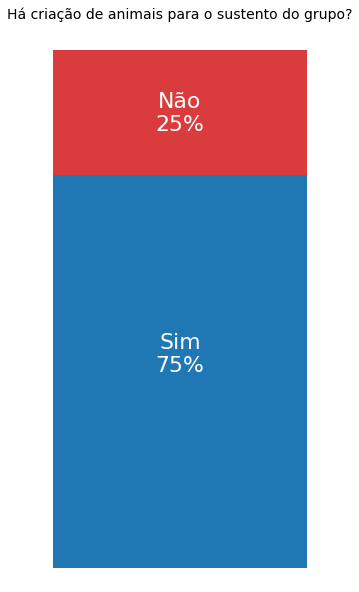

In [442]:
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim'], label='Sim')
ax.bar(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não'], bottom = df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim'], color='tab:red', alpha=.9, label='Não')
handles, labels = ax.get_legend_handles_labels()
ax.text(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']/2, 'Sim\n'+str(int(df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']*100/(df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']+df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não'])))+'%', horizontalalignment='center', fontsize=22, color='white')
ax.text(0, 22+7/2-1, 'Não\n25%', horizontalalignment='center', fontsize=22, color='white')
#ax.legend(handles[::-1], labels[::-1], loc=(1,.65))
plt.title('Há criação de animais para o sustento do grupo?', fontsize=14)
plt.axis('off')
plt.savefig('6.animais.png', dpi=200, bbox_inches='tight')


In [37]:
animais = pd.DataFrame(df2[['Criação de animais/Quantos porcos?', 'Criação de animais/Quantos gansos, patos e marrecos?', 'Criação de animais/Quantas galinhas e perus?', 'Criação de animais/Quantas vacas?', 'Criação de animais/Quantos peixes?', 'Criação de animais/Quantas caixas de abelha?', 'Criação de animais/Quantos outros?']].sum(axis=0).values).T



In [43]:
animais.columns = ['Quantidade de porcos - 3', 'Quantidade de gansos, patos e marrecos - 91', 'Quantidade de galinhas e perus - 739']




In [39]:
animais

0     1      2    3    4    5    6
0  3.0  91.0  739.0  0.0  0.0  0.0  0.0

In [40]:
animais = animais.iloc[:, :3]

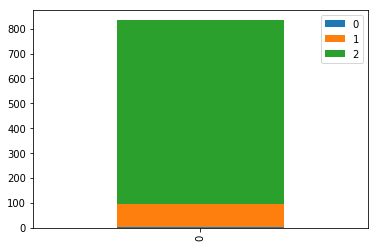

In [41]:
animais.plot.bar(stacked=True)

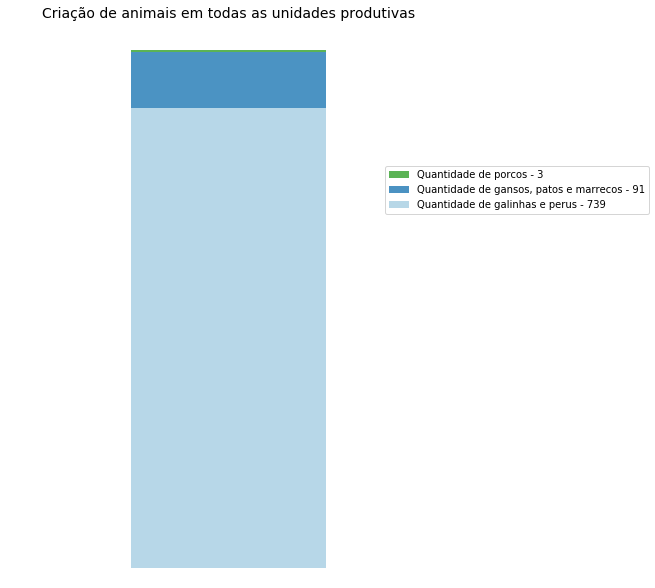

In [44]:
fig, ax = plt.subplots(figsize=(7,10))
animais.iloc[:, ::-1].plot.bar(stacked=True, ax=ax, colors = cm.Paired(np.linspace(0,1,8)), alpha=.8)
plt.title('Criação de animais em todas as unidades produtivas', fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(.9,.65))
plt.axis('off')
plt.savefig('7.animais.png', dpi=200, bbox_inches='tight')


In [234]:
df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()

Pouco         15
Nenhum         5
Suficiente     2
Name: Criação de animais/Conseguem tirar algum sustento com a criação de animais?, dtype: int64

In [230]:
df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts().values*100/df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts().values.sum()

array([68.18181818, 22.72727273,  9.09090909])

In [265]:
15*100/22

68.18181818181819

In [266]:
5*100/22

22.727272727272727

In [267]:
2*100/22

9.090909090909092

In [268]:
68+23+9

100

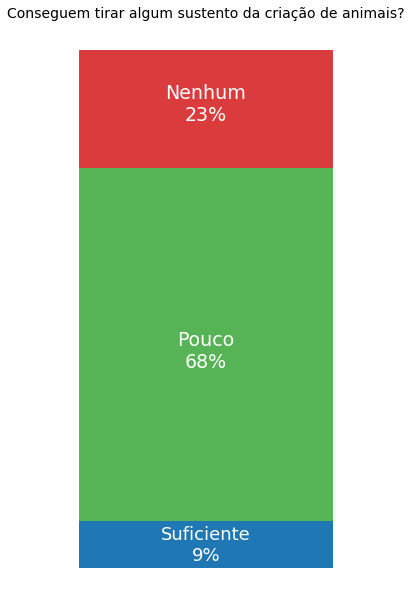

In [45]:
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(0, df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()['Suficiente'], label='Sim')
ax.bar(0, df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()['Pouco'], bottom = df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()['Suficiente'], color='tab:green', alpha=.8, label='Não')
ax.bar(0, df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()['Nenhum'], bottom = df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()['Suficiente']+df2['Criação de animais/Conseguem tirar algum sustento com a criação de animais?'].value_counts()['Pouco'], color='tab:red', alpha=.9, label='Não')
handles, labels = ax.get_legend_handles_labels()
ax.text(0, .3, 'Suficiente\n9%', horizontalalignment='center', fontsize=18, color='white')
ax.text(0, 17/2, 'Pouco\n68%', horizontalalignment='center', fontsize=19, color='white')
ax.text(0, 17+2, 'Nenhum\n23%', horizontalalignment='center', fontsize=19, color='white')
plt.title('Conseguem tirar algum sustento da criação de animais?', fontsize=14)
plt.axis('off')
plt.savefig('8.sustento_animais.png', dpi=200, bbox_inches='tight')


In [ ]:
Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?
Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Represa Billings
Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Açude na aldeia / Terra Indígena
Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Açude ou rio fora da aldeia / TI
Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Rios na Terra Indígena
Pesca/Em geral, a pesca é mais para comer ou vender?
Pesca/Qual principal dificuldade em relação à pesca hoje
Pesca/Qual principal dificuldade em relação à pesca hoje/Poluição
Pesca/Qual principal dificuldade em relação à pesca hoje/Pouco peixe
Pesca/Qual principal dificuldade em relação à pesca hoje/Valor de venda baixo
Pesca/Qual principal dificuldade em relação à pesca hoje/Falta de barco
Pesca/Qual principal dificuldade em relação à pesca hoje/Falta de açude arrumado
Pesca/Qual principal dificuldade em relação à pesca hoje/Outro
Pesca/Qual outro?

In [247]:
df2['Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?']

0                                      Represa Billings
1                      Açude na aldeia / Terra Indígena
2               Represa Billings Rios na Terra Indígena
3     Açude na aldeia / Terra Indígena Rios na Terra...
4                                      Represa Billings
5                                                   NaN
6                                      Represa Billings
7                                      Represa Billings
8                                      Represa Billings
9                                                   NaN
10                                     Represa Billings
11                                                  NaN
12                                     Represa Billings
13                                                  NaN
14                                                  NaN
15                                     Represa Billings
16                                                  NaN
17                                              

In [253]:
df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()

Sim    22
Não     7
Name: Criação de animais/Tem criação de animais para usar no sustento do grupo?, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim'], label='Sim')
ax.bar(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não'], bottom = df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim'], color='tab:red', alpha=.9, label='Não')
handles, labels = ax.get_legend_handles_labels()
ax.text(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']/2, 'Sim\n'+str(int(df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']*100/(df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']+df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não'])))+'%', horizontalalignment='center', fontsize=22, color='white')
ax.text(0, df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim']+df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não']/2-1, 'Não\n'+str(int(df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não']*100/(4+df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não'])))+'%', horizontalalignment='center', fontsize=22, color='white')
#ax.legend(handles[::-1], labels[::-1], loc=(1,.65))
plt.title('Há criação de animais para o sustento do grupo?', fontsize=14)
plt.axis('off')
plt.savefig('animais.png', dpi=200, bbox_inches='tight')


(-0.44000000000000006, 0.44000000000000006, 0.0, 30.45)

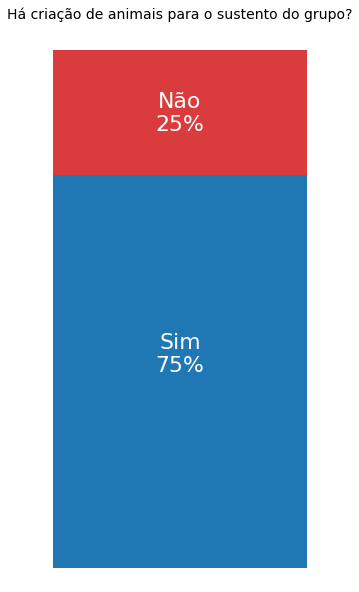

In [5]:
fig, ax = plt.subplots(figsize=(5,10))
ax.bar(0,df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim'], label='Sim')
ax.bar(0,df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Não'], bottom = df2['Criação de animais/Tem criação de animais para usar no sustento do grupo?'].value_counts()['Sim'], label='Não', color='tab:red', alpha=.9)
ax.text(0, 11, 'Sim\n'+str(int(22*100/29))+'%', horizontalalignment='center', fontsize=22, color='white')
ax.text(0, 22+7/2-1, 'Não\n'+str(int(7*100/29)+1)+'%', horizontalalignment='center', fontsize=22, color='white')


plt.title('Há criação de animais para o sustento do grupo?', fontsize=14)
plt.axis('off')
#plt.savefig('Ha_Animais?.png', bbox_inches='tight', dpi=200)




In [272]:
pd.DataFrame(df2.groupby('Unidade_Produtiva')['Caracterização do grupo/Quantos compõem o grupo'].sum()).to_csv('uni_quantos.csv')
             
             
             

In [121]:
pesca = pd.DataFrame(df2.loc[:,'Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Represa Billings':'Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Rios na Terra Indígena'].sum(axis=0)).T
pesca.columns = ['Represa Billings', 'Açude na aldeia', 'Açude ou rio fora da aldeia', 'Rios na Terra Indígena']
pesca = pesca.drop(['Açude ou rio fora da aldeia'], axis=1)
pesca = pesca.T

In [361]:
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return int(a)

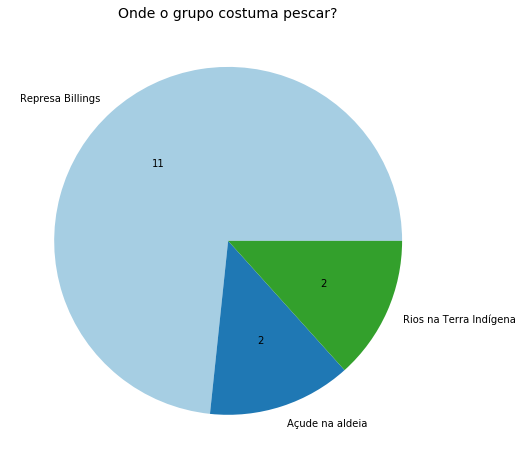

In [377]:
sizes = np.array(pesca[0])
fig, ax = plt.subplots(figsize=(8,8))
pesca.plot.pie(subplots=True, colors = cm.Paired(np.linspace(0,1,8)), autopct=absolute_value, legend=False, ax=ax)
plt.ylabel('')
plt.title('Onde o grupo costuma pescar?', fontsize=14)
plt.savefig('58.pesca.png', dpi=200, bbox_inches='tight')

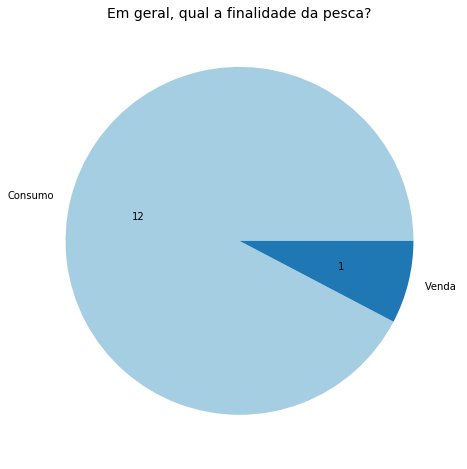

In [434]:
sizes = df2['Pesca/Em geral, a pesca é mais para comer ou vender?'].value_counts().values
fig, ax = plt.subplots(figsize=(8,8))
df2['Pesca/Em geral, a pesca é mais para comer ou vender?'].value_counts().plot.pie(subplots=True, colors = cm.Paired(np.linspace(0,1,8)), autopct=absolute_value, legend=False, ax=ax, labels=['Consumo', 'Venda'])
plt.ylabel('')
plt.title('Em geral, qual a finalidade da pesca?', fontsize=14)
plt.savefig('59.pesca.png', dpi=200, bbox_inches='tight')

In [149]:
difi_pesca = pd.DataFrame(df2.loc[:,'Pesca/Qual principal dificuldade em relação à pesca hoje/Poluição':'Pesca/Qual principal dificuldade em relação à pesca hoje/Outro' ].sum(axis=0)).T
difi_pesca.columns = ['Poluição', 'Pouco peixe', 'Valor', 'Falta de barco', 'Falta de açude arrumado', 'Falta de tarrafa']               
difi_pesca = difi_pesca.drop(['Poluição', 'Valor'], axis=1)
difi_pesca = difi_pesca.T

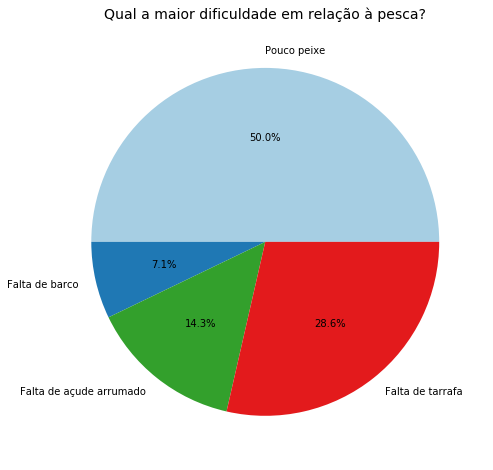

In [153]:
fig, ax = plt.subplots(figsize=(8,8))
difi_pesca.plot.pie(subplots=True, colors = cm.Paired(np.linspace(0,1,8)), autopct='%1.1f%%', legend=False, ax=ax)
plt.ylabel('')
plt.title('Qual a maior dificuldade em relação à pesca?', fontsize=14)
plt.savefig('60.pesca.png', dpi=200, bbox_inches='tight')

In [158]:
coleta = pd.DataFrame(df2.loc[:, 'Coleta/Coleta plantas no mato? Para que?/remédio':'Coleta/Coleta plantas no mato? Para que?/outro'].sum(axis=0)).T
coleta.columns = ['Remédio', 'Artesanato', 'Ornamental', 'Construção', 'Instrumentos', 'Alimentação', 'Outro']
coleta = coleta.drop(['Outro'], axis=1)
coleta = coleta.T


In [375]:
sizes.sum()

53.0

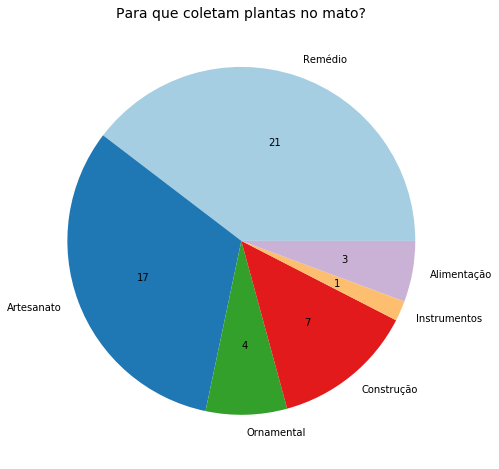

In [378]:
sizes = coleta[0].values
fig, ax = plt.subplots(figsize=(8,8))
coleta.plot.pie(subplots=True, colors = cm.Paired(np.linspace(0,1,8)), autopct=absolute_value, legend=False, ax=ax)
plt.ylabel('')
plt.title('Para que coletam plantas no mato?', fontsize=14)
plt.savefig('61.coleta.png', dpi=200, bbox_inches='tight')

In [104]:
for col in df2.columns:
    print(col)
    

start
end
today
deviceid
Nome do Grupo ou Família (unidade produtiva)
Aldeia
Data de hoje
Record your current location
_Record your current location_latitude
_Record your current location_longitude
_Record your current location_altitude
_Record your current location_precision
Caracterização do grupo/Quantos compõem o grupo
Caracterização do grupo/Quantos adultos
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por sexo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Homem
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Mulher
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por tipo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_ti

In [300]:
muito = df2.loc[:, 'Plantio/Que_tipo_de_plantio_entar_e_a_frequ_ncia/Milho (avaxi)':'Plantio/Que_tipo_de_plantio_entar_e_a_frequ_ncia/Cana / sorgo (takua re\'e miri)'].apply(pd.Series.value_counts)
muito.columns=['Milho', 'Banana', 'Mandioca', 'Feijão', 'Batata-doce', 'Amendoim', 'Abóbora', 'Melancia', 'Inhame', 'Frutíferas', 'Hortaliças', 'Arroz', 'Sorgo']
muito = muito.drop(['Melancia'], axis=1)
muito = muito.T.fillna(0)
muito['total'] = muito.Muito+muito.Pouco
muito = muito.sort_values(by='total', ascending=False)

muito[['Muito', 'Pouco']].plot.bar(rot=0, cmap='Paired', figsize=(15, 10))
plt.grid(True, alpha=.3)
plt.title('Frequência e tipo de plantio com os quais as unidades produtivas costumam se alimentar', fontsize=16)
plt.ylabel('Quantidade de unidades produtivas', fontsize=14)
plt.yticks(np.arange(0, 20, 2))
plt.savefig('')

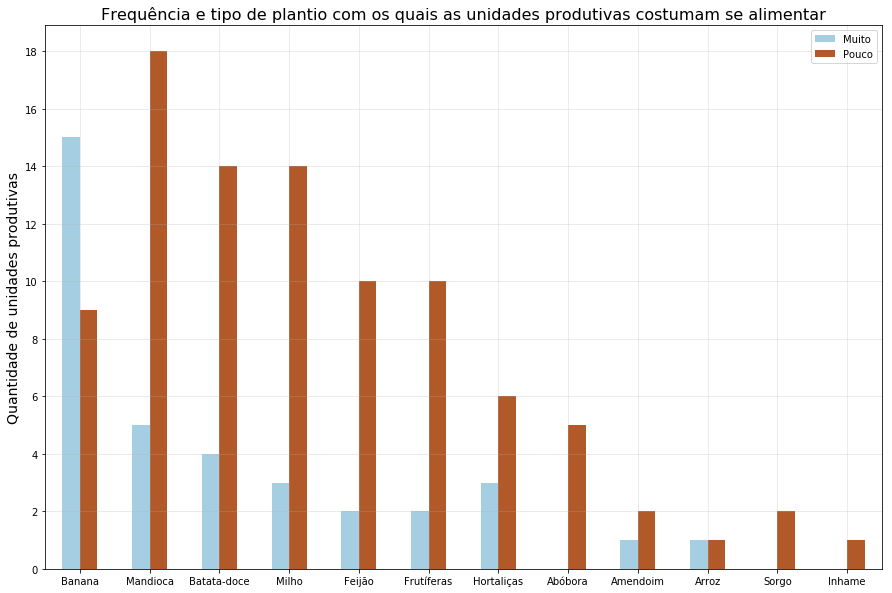

In [315]:
muito[['Muito', 'Pouco']].plot.bar(rot=0, cmap='Paired', figsize=(15, 10))
plt.grid(True, alpha=.3)
plt.title('Frequência e tipo de plantio com os quais as unidades produtivas costumam se alimentar', fontsize=16)
plt.ylabel('Quantidade de unidades produtivas', fontsize=14)
plt.yticks(np.arange(0, 20, 2))
plt.savefig('67.freq_cultivo.png', dpi=200, bbox_inches='tight')

In [91]:
atrapalha = pd.DataFrame(df2.loc[:, 'Avaliações e expectativas/O que vem do mundo dos não indígenas que atrapalha ou ameaça de modo destacado o trabalho de plantio, de ficar na roça e a vida na aldeia em geral?':'Avaliações e expectativas/O que vem do mundo dos não indígenas que atrapalha ou ameaça de modo destacado o trabalho de plantio, de ficar na roça e a vida na aldeia em geral?/outro'].sum(axis=0)).T
atrapalha.columns = ['Celular/wifi/internet', 'Televisão', 'Videogame', 'Bebidas alcoólicas', 'Dinheiro', 'Falta de demarcação/\ninvasão do território', 'Ter de lidar com problemas e demandas\npolíticas de não-indígenas', 'Drogas', 'Lixo', 'Violência', 'Obras e empreendimentos', 'Comida industrializada', 'Destruição do ambiente/planeta', 'Doações', 'Proselitismo religioso', 'Outro']
atrapalha = atrapalha.drop(['Obras e empreendimentos', 'Proselitismo religioso'], axis=1)


In [327]:
(atrapalha.T*100/atrapalha.T.sum())

0    100.0
dtype: float64

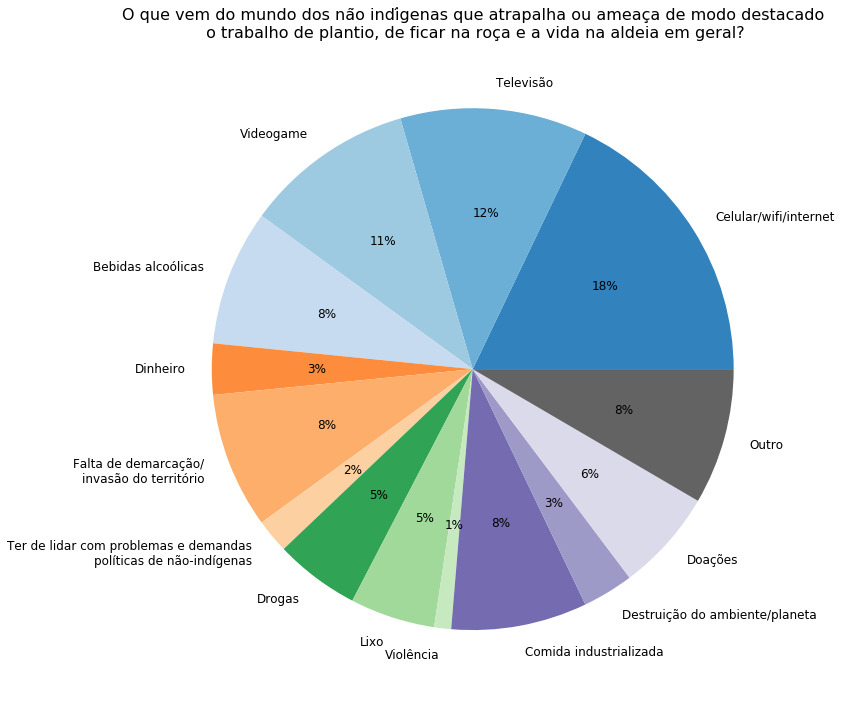

In [92]:
fig, ax = plt.subplots(figsize=(12,12))
(atrapalha.T*100/atrapalha.T.sum()).plot.pie(subplots=True, colors = cm.tab20c(np.linspace(0,1,17)), autopct='%1.f%%', legend=False, ax=ax, fontsize=12)
plt.ylabel('')
plt.title('O que vem do mundo dos não indígenas que atrapalha ou ameaça de modo destacado\n o trabalho de plantio, de ficar na roça e a vida na aldeia em geral?', fontsize=16)
plt.savefig('66.expect.png', dpi=200, bbox_inches='tight')



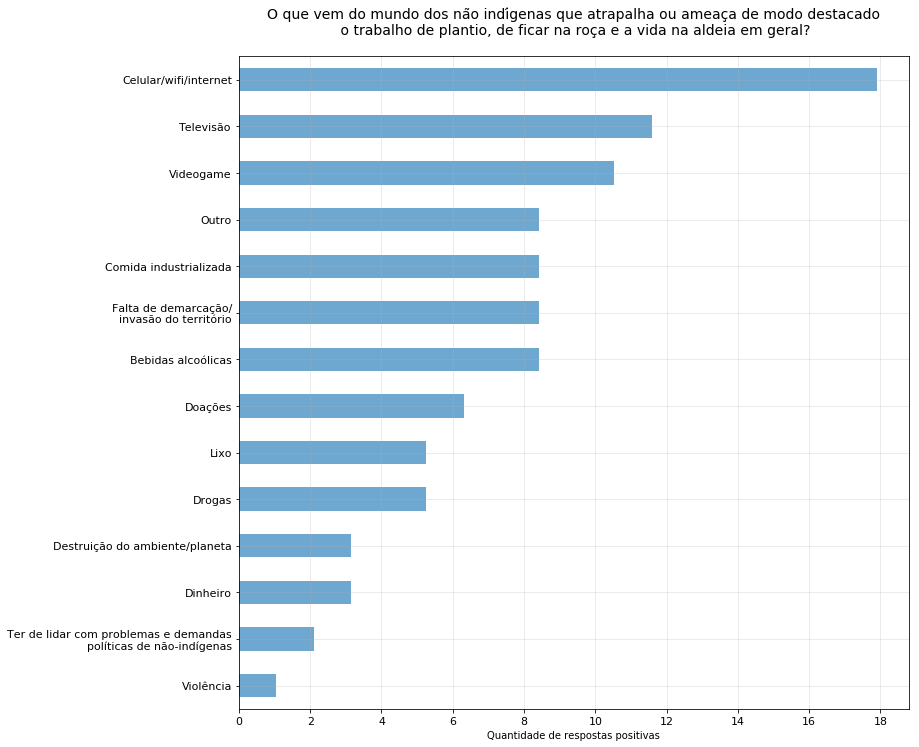

In [93]:
fig, ax = plt.subplots(figsize=(12,12))
(atrapalha.T*100/atrapalha.T.sum()).sort_values(by=0, ascending=True).plot.barh(color = cm.tab20c(np.linspace(0,1,17)), legend=False, alpha=.7, ax=ax, fontsize=11, xticks=np.arange(0,20,2))
plt.grid(True, alpha=.3)
plt.xlabel('Quantidade de respostas positivas')
plt.title('O que vem do mundo dos não indígenas que atrapalha ou ameaça de modo destacado\n o trabalho de plantio, de ficar na roça e a vida na aldeia em geral?\n', fontsize=14)
plt.savefig('66.expect2.png', dpi=200, bbox_inches='tight')



In [225]:
avalia.head()

Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Emprego  (ceci, escola, posto de saúde etc)  \
0                                                  0                                                                                                              
1                                                  1                                                                                                              
2                                                  0                                                                                                              
3                                                  0                                                                                                              
4                                                  1                                                                                                              

   Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Auxílios e benefícios  \
0                                                  0                                                                                        
1                                                  0                                                                                        
2                                                  0                                                                                        
3                                                  0                                                                                        
4                                                  0                                                                                        

   Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Plantio  \
0                                                  1                                                                          
1                                                  1                                                                          
2                                                  1                                                                          
3                                                  1                                                                          
4                                                  1                                                                          

   Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Caça e coleta nas matas do território  \
0                                                  0                                                                                                        
1                                                  0                                                                                                        
2                                                  1                                                                                                        
3                                                  0                                                                                                        
4                                                  0                                                                                                        

   Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Venda de artesanato  \
0                                                  1                                                                                      
1                                                  1                                                                                      
2                                                  1  

In [87]:
avalia = pd.DataFrame(df2.loc[:, 'Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Emprego  (ceci, escola, posto de saúde etc)':'Avaliações e expectativas/No futuro, por meio de quais atividades gostariam mais de garantir o sustento do grupo/Outro'].sum(axis=0)).T
avalia.columns = ['Emprego', 'Auxílios e benefícios', 'Plantio', 'Caça e coleta no território','Venda de artesanato',  'Turismo', 'Palestra e apresentações\nna cidade', 'Apoio de projetos', 'Ajuda e troca com parentes', 'Uso de equipamentos públicos na aldeia', 'Doações de não-indígenas', 'Pesca', 'Criação de animais', 'Estudo e formação para ajudar a aldeia\ncomo liderança', 'Outro']

avalia = avalia.drop(['Auxílios e benefícios','Doações de não-indígenas','Palestra e apresentações\nna cidade', 'Pesca'], axis=1)
avalia

Emprego  Plantio  Caça e coleta no território  Venda de artesanato  \
0        7       25                            2                    7   

   Turismo  Apoio de projetos  Ajuda e troca com parentes  \
0        5                  4                           4   

   Uso de equipamentos públicos na aldeia  Criação de animais  \
0                                       2                   9   

   Estudo e formação para ajudar a aldeia\ncomo liderança  Outro  
0                                                  4           3

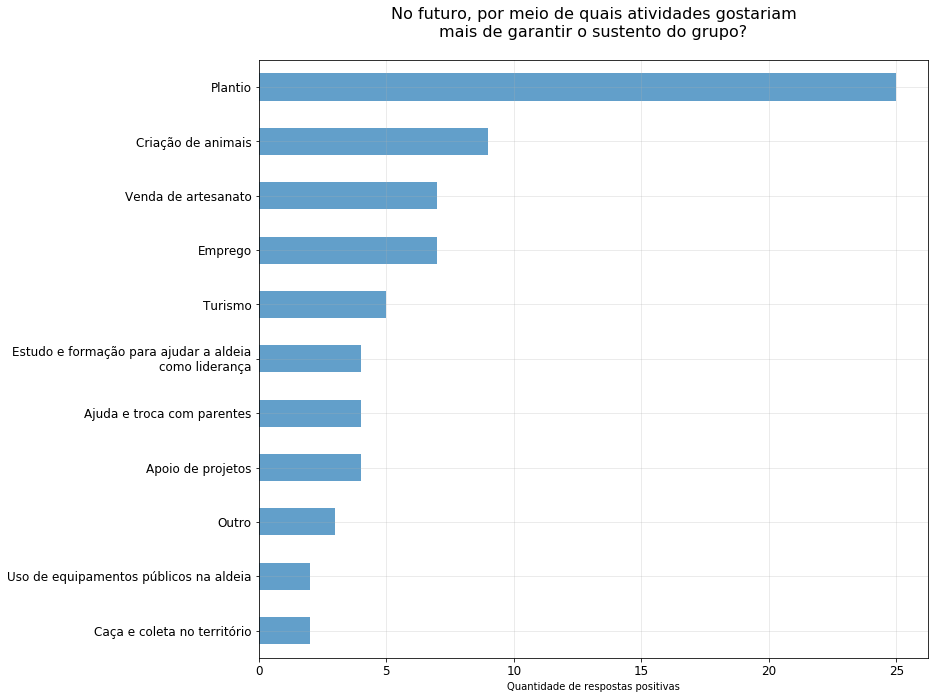

In [462]:
fig, ax = plt.subplots(figsize=(12,11))
avalia.T.sort_values(by=0).plot.barh(legend=False, ax=ax, fontsize=12, alpha=.7)
plt.grid(True, alpha=.3)
plt.xlabel('Quantidade de respostas positivas')
plt.title('No futuro, por meio de quais atividades gostariam\nmais de garantir o sustento do grupo?\n', fontsize=16)
plt.savefig('65.expect2.png', dpi=200, bbox_inches='tight')



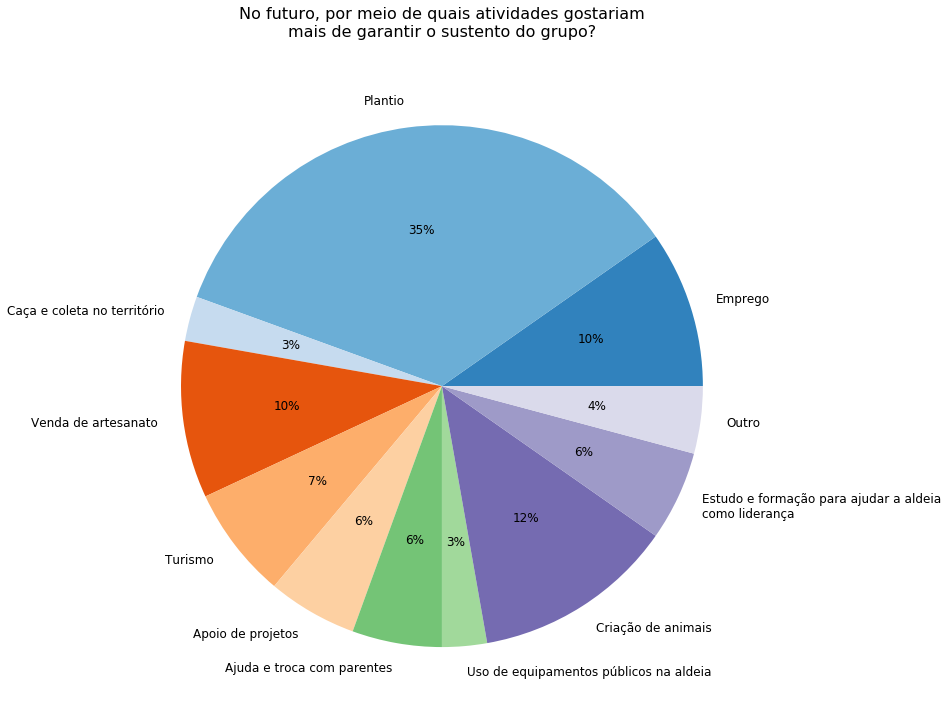

In [90]:
fig, ax = plt.subplots(figsize=(12,12))
avalia.T.plot.pie(subplots=True, colors = cm.tab20c(np.linspace(0,1,14)), autopct='%1.f%%', legend=False, ax=ax, fontsize=12)
plt.ylabel('')
plt.title('No futuro, por meio de quais atividades gostariam\nmais de garantir o sustento do grupo?\n', fontsize=16)
plt.savefig('65.expect.png', dpi=200, bbox_inches='tight')



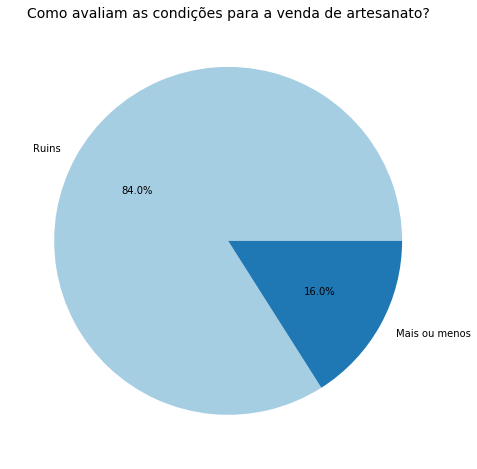

In [177]:
fig, ax = plt.subplots(figsize=(8,8))
df2['Artesanato/Como avaliam as condições para a venda de artesanato'].value_counts().plot.pie(subplots=True, colors = cm.Paired(np.linspace(0,1,8)), autopct='%1.1f%%', legend=False, ax=ax, labels=['Ruins', 'Mais ou menos'])
plt.ylabel('')
plt.title('Como avaliam as condições para a venda de artesanato?', fontsize=14)
plt.savefig('63.artesanato.png', dpi=200, bbox_inches='tight')

In [183]:
df2.Aldeia = df2.Aldeia.replace(['Tape Miri'], ['Tape Mirim'])

In [202]:
df2.groupby('Aldeia')['Artesanato/Das pessoas que fazem artesanato como uma principal atividade, quantas são mulheres?'].sum()/df2.groupby('Aldeia')['Artesanato/Quantas pessoas do grupo tem a produção de artesanato para venda como uma das principais atividades?'].sum()

Aldeia
Kalipety        1.000000
Krukutu         0.666667
Tape Mirim      0.833333
Tekoa Porã      1.000000
Tenonde Porã    0.888889
Yrexakã         0.000000
dtype: float64

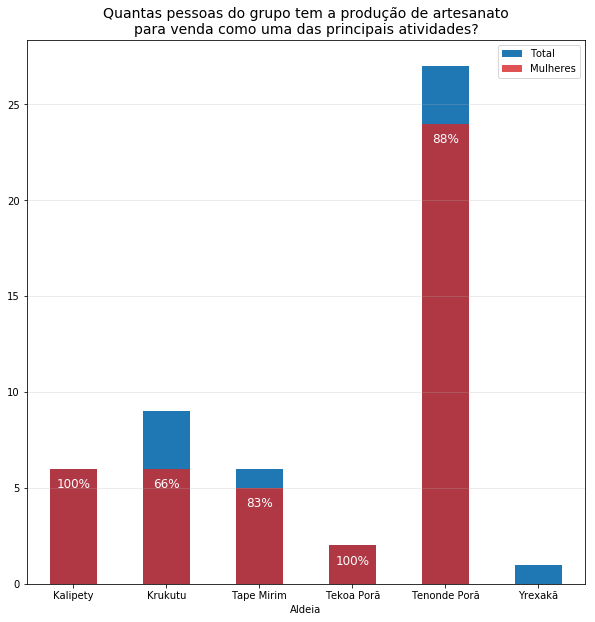

In [216]:
df2.groupby('Aldeia')['Artesanato/Quantas pessoas do grupo tem a produção de artesanato para venda como uma das principais atividades?'].sum().plot.bar(rot=0, figsize=(10,10), label='Total')
df2.groupby('Aldeia')['Artesanato/Das pessoas que fazem artesanato como uma principal atividade, quantas são mulheres?'].sum().plot.bar(rot=0, figsize=(10,10), color='tab:red', alpha=.8, label='Mulheres')
plt.title('Quantas pessoas do grupo tem a produção de artesanato\npara venda como uma das principais atividades?', fontsize=14)
plt.legend()
plt.grid(True, axis='y', alpha=.3)
plt.text(0, 5, '100%', horizontalalignment='center', color='white', fontsize=12)
plt.text(1, 5, '66%', horizontalalignment='center', color='white', fontsize=12)
plt.text(2, 4, '83%', horizontalalignment='center', color='white', fontsize=12)
plt.text(3, 1, '100%', horizontalalignment='center', color='white', fontsize=12)
plt.text(4, 23, '88%', horizontalalignment='center', color='white', fontsize=12)
plt.savefig('64.Artesanato.png', dpi=200, bbox_inches='tight')

In [382]:
df2[['Unidade_Produtiva', 'Caracterização do grupo/Quantos compõem o grupo', 'Aldeia']].to_csv('pessoas_up.csv')

In [419]:
df2['Pesca'] = np.where(df2.loc[:, 'Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Represa Billings':'Pesca/Pessoas do grupo, costumam pescar? Se sim, onde?/Rios na Terra Indígena'].sum(axis=1)>=1, 1, 0)

In [420]:
df2['Coleta'] = np.where(df2.loc[:, 'Coleta/Coleta plantas no mato? Para que?/remédio':'Coleta/Coleta plantas no mato? Para que?/outro'].sum(axis=1)>=1, 1,0)

In [451]:
df2['Artesanato'] = np.where(df2['Artesanato/Quantas pessoas do grupo tem a produção de artesanato para venda como uma das principais atividades?']>=1, 1, 0)



In [449]:
df2.Artesanato.value_counts()

0    17
1    12
Name: Artesanato, dtype: int64

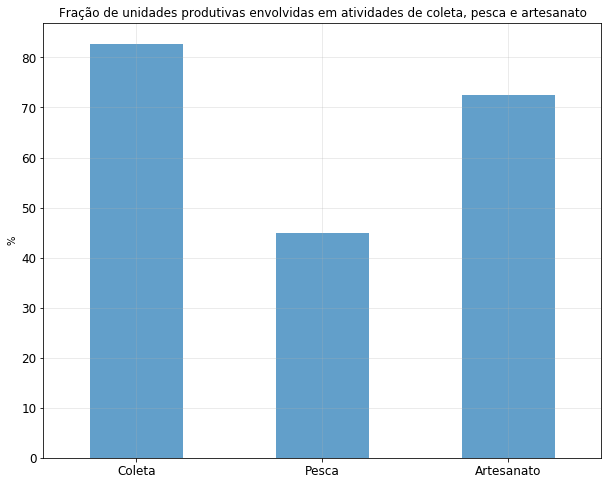

In [452]:
(df2[['Coleta', 'Pesca', 'Artesanato']].sum()*100/df2.shape[0]).plot.bar(rot=0, figsize=(10,8), fontsize=12, alpha=.7)
plt.ylabel('%')
plt.grid(True, alpha=.3)
plt.title('Fração de unidades produtivas envolvidas em atividades de coleta, pesca e artesanato')
plt.savefig('X.Coleta_Pesca_Artesanato.png', dpi=200, bbox_inches='tight')

In [450]:
df2['Artesanato/Quantas pessoas do grupo tem a produção de artesanato para venda como uma das principais atividades?'].value_counts()


1.0    9
0.0    7
2.0    4
3.0    3
4.0    2
6.0    2
5.0    1
Name: Artesanato/Quantas pessoas do grupo tem a produção de artesanato para venda como uma das principais atividades?, dtype: int64

In [447]:
(df2.shape[0]-7)/29

0.7586206896551724

In [464]:
for col in df2.columns:
    print(col)

start
end
today
deviceid
Nome do Grupo ou Família (unidade produtiva)
Aldeia
Data de hoje
Record your current location
_Record your current location_latitude
_Record your current location_longitude
_Record your current location_altitude
_Record your current location_precision
Caracterização do grupo/Quantos compõem o grupo
Caracterização do grupo/Quantos adultos
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por sexo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Homem
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_sexo/Mulher
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Quantos estão em trabalho remunerados regulares (empregos ou bolsas) por tipo
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Escola Estadual
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_tipo/Ceci
Caracterização do grupo/Quantos_est_o_em_tra_ou_bolsas_por_ti

In [472]:
df_aux = df2.loc[:,'Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Aposentadoria':'Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Outro']

In [473]:
df_aux['Aldeia'] = df2.Aldeia

In [480]:
df_aux.groupby('Aldeia').sum().to_excel('Auxilios_Total.xlsx')

In [486]:
df_aux.groupby('Aldeia').sum()

Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Aposentadoria  \
Aldeia                                                                                          
Kalipety                                                    0.0                                 
Krukutu                                                     3.0                                 
Tape Mirim                                                  1.0                                 
Tekoa Porã                                                  2.0                                 
Tenonde Porã                                                7.0                                 
Yrexakã                                                     2.0                                 

              Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Auxílios regulares (deficiência, reclusão)  \
Aldeia                                                                                                                       
Kalipety                                                    1.0                                                              
Krukutu                                                     1.0                                                              
Tape Mirim                                                  1.0                                                              
Tekoa Porã                                                  0.0                                                              
Tenonde Porã                                                0.0                                                              
Yrexakã                                                     0.0                                                              

              Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Bolsa-família  \
Aldeia                                                                                          
Kalipety                                                    9.0                                 
Krukutu                                                     9.0                                 
Tape Mirim                                                  6.0                                 
Tekoa Porã                                                  7.0                                 
Tenonde Porã                                               11.0                                 
Yrexakã                                                     7.0                                 

              Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Outro  
Aldeia                                                                                 
Kalipety                                                    0.0                        
Krukutu                                                     0.0                        
Tape Mirim                                                  0.0                        
Tekoa Porã                                                  0.0                        
Tenonde Porã                                                0.0                        
Yrexakã                                                     0.0

In [487]:
df2.groupby('Aldeia')['Caracterização do grupo/Quantos adultos'].sum().values.reshape(6, 1)

array([[43],
       [66],
       [29],
       [27],
       [90],
       [26]])

In [489]:
np.round((df_aux.groupby('Aldeia').sum()*100/df2.groupby('Aldeia')['Caracterização do grupo/Quantos compõem o grupo'].sum().values.reshape(6, 1))).to_excel('Auxilios_Fracao_do_Total.xlsx')




In [488]:
np.round((df_aux.groupby('Aldeia').sum()*100/df2.groupby('Aldeia')['Caracterização do grupo/Quantos adultos'].sum().values.reshape(6, 1))).to_excel('Auxilios_Fracao_dos_Adultos.xlsx')




In [484]:
(df_aux.groupby('Aldeia').sum()*100/df2.groupby('Aldeia')['Caracterização do grupo/Quantos adultos'].sum().values.reshape(6, 1))

Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Aposentadoria  \
Aldeia                                                                                          
Kalipety                                               0.000000                                 
Krukutu                                                4.545455                                 
Tape Mirim                                             3.448276                                 
Tekoa Porã                                             7.407407                                 
Tenonde Porã                                           7.777778                                 
Yrexakã                                                7.692308                                 

              Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Auxílios regulares (deficiência, reclusão)  \
Aldeia                                                                                                                       
Kalipety                                               2.325581                                                              
Krukutu                                                1.515152                                                              
Tape Mirim                                             3.448276                                                              
Tekoa Porã                                             0.000000                                                              
Tenonde Porã                                           0.000000                                                              
Yrexakã                                                0.000000                                                              

              Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Bolsa-família  \
Aldeia                                                                                          
Kalipety                                              20.930233                                 
Krukutu                                               13.636364                                 
Tape Mirim                                            20.689655                                 
Tekoa Porã                                            25.925926                                 
Tenonde Porã                                          12.222222                                 
Yrexakã                                               26.923077                                 

              Caracterização do grupo/Quantos_recebem_bene_ociais_e_quais_tipos/Outro  
Aldeia                                                                                 
Kalipety                                                    0.0                        
Krukutu                                                     0.0                        
Tape Mirim                                                  0.0                        
Tekoa Porã                                                  0.0                        
Tenonde Porã                                                0.0                        
Yrexakã                                                     0.0

In [150]:
semen = pd.read_excel('origem da semente_de qual aldeia veio.xlsx')

In [151]:
semen.head()

Milho (avaxi) Batata-doce (jety)      Amendoim (manduvi) Feijão (kumanda)  \
0  Aldeia do RS           Kalipety                 Krukutu         Kalipety   
1      Kalipety           Kalipety  TI Rio das Cobras (PR)         Kalipety   
2      Kalipety           Kalipety            Tenonde Porã         Kalipety   
3      Kalipety           Kalipety            Tenonde Porã         Kalipety   
4      Kalipety           Kalipety            Tenonde Porã         Kalipety   

  Mandioca (mandi'o)  Arroz (aroi) Abóbora (andai)  
0           Kalipety            PR        Kalipety  
1           Kalipety  Tenonde Porã        Kalipety  
2           Kalipety  Tenonde Porã        Kalipety  
3           Kalipety  Tenonde Porã        Kalipety  
4           Kalipety           NaN        Kalipety

In [152]:
s = semen.apply(pd.Series.value_counts)
s['total'] = s.sum(axis=1)
s = s.sort_values(by='total', ascending=True)

In [153]:
s.T

Aldeia do RS  Silveira   SC  aldeia kraho  Paraty  Peru  \
Milho (avaxi)                1.0       NaN  NaN           NaN     NaN   NaN   
Batata-doce (jety)           NaN       1.0  1.0           NaN     1.0   1.0   
Amendoim (manduvi)           NaN       NaN  NaN           NaN     NaN   NaN   
Feijão (kumanda)             NaN       NaN  NaN           NaN     NaN   NaN   
Mandioca (mandi'o)           NaN       NaN  NaN           1.0     NaN   NaN   
Arroz (aroi)                 NaN       NaN  NaN           NaN     NaN   NaN   
Abóbora (andai)              NaN       NaN  NaN           NaN     NaN   NaN   
total                        1.0       1.0  1.0           1.0     1.0   1.0   

                    Mangueirinha (PR)  Kuaray Rexakã  kalipety  \
Milho (avaxi)                     1.0            NaN       NaN   
Batata-doce (jety)                NaN            1.0       1.0   
Amendoim (manduvi)                NaN            NaN       NaN   
Feijão (kumanda)                  NaN            NaN       NaN   
Mandioca (mandi'o)                NaN            NaN       NaN   
Arroz (aroi)                      NaN            NaN       NaN   
Abóbora (andai)                   NaN            NaN       NaN   
total                             1.0            1.0       1.0   

                    TI Rio das Cobras (PR)  Tape Miri   PR  Tapixi (PR)  \
Milho (avaxi)                          NaN        1.0  NaN          4.0   
Batata-doce (jety)                     2.0        NaN  3.0          2.0   
Amendoim (manduvi)                     1.0        NaN  NaN          NaN   
Feijão (kumanda)                       NaN        NaN  NaN          1.0   
Mandioca (mandi'o)                     NaN        2.0  1.0          NaN   
Arroz (aroi)                           NaN        NaN  1.0          NaN   
Abóbora (andai)                        NaN        NaN  1.0          NaN   
total                                  3.0        3.0  6.0          7.0   

                    Palmeirinha (PR)  Pinhal (PR)  Krukutu  Kalipety  \
Milho (avaxi)                    6.0          3.0      2.0      16.0   
Batata-doce (jety)               1.0          1.0      7.0      17.0   
Amendoim (manduvi)               NaN          NaN      1.0       NaN   
Feijão (kumanda)                 NaN          1.0      NaN       5.0   
Mandioca (mandi'o)               1.0          5.0      8.0       9.0   
Arroz (aroi)                     NaN          NaN      NaN       NaN   
Abóbora (andai)                  2.0          1.0      1.0       5.0   
total                           10.0         11.0     19.0      52.0   

                    Tenonde Porã  
Milho (avaxi)                8.0  
Batata-doce (jety)           9.0  
Amendoim (manduvi)           5.0  
Feijão (kumanda)             2.0  
Mandioca (mandi'o)          34.0  
Arroz (aroi)                 3.0  
Abóbora (andai)              1.0  
total                       62.0

In [154]:
s = s.T
s['Soma das Aldeias do PR'] = s[['Mangueirinha (PR)', 'TI Rio das Cobras (PR)', 'PR', 'Tapixi (PR)', 'Palmeirinha (PR)','Pinhal (PR)']].sum(axis=1)



In [155]:
s = s.T

In [156]:
s = s.sort_values(by='total')

In [157]:
s

Milho (avaxi)  Batata-doce (jety)  Amendoim (manduvi)  \
Aldeia do RS                      1.0                 NaN                 NaN   
Silveira                          NaN                 1.0                 NaN   
SC                                NaN                 1.0                 NaN   
aldeia kraho                      NaN                 NaN                 NaN   
Paraty                            NaN                 1.0                 NaN   
Peru                              NaN                 1.0                 NaN   
Mangueirinha (PR)                 1.0                 NaN                 NaN   
Kuaray Rexakã                     NaN                 1.0                 NaN   
kalipety                          NaN                 1.0                 NaN   
Tape Miri                         1.0                 NaN                 NaN   
TI Rio das Cobras (PR)            NaN                 2.0                 1.0   
PR                                NaN                 3.0                 NaN   
Tapixi (PR)                       4.0                 2.0                 NaN   
Palmeirinha (PR)                  6.0                 1.0                 NaN   
Pinhal (PR)                       3.0                 1.0                 NaN   
Krukutu                           2.0                 7.0                 1.0   
Soma das Aldeias do PR           14.0                 9.0                 1.0   
Kalipety                         16.0                17.0                 NaN   
Tenonde Porã                      8.0                 9.0                 5.0   

                        Feijão (kumanda)  Mandioca (mandi'o)  Arroz (aroi)  \
Aldeia do RS                         NaN                 NaN           NaN   
Silveira                             NaN                 NaN           NaN   
SC                                   NaN                 NaN           NaN   
aldeia kraho                         NaN                 1.0           NaN   
Paraty                               NaN                 NaN           NaN   
Peru                                 NaN                 NaN           NaN   
Mangueirinha (PR)                    NaN                 NaN           NaN   
Kuaray Rexakã                        NaN                 NaN           NaN   
kalipety                             NaN                 NaN           NaN   
Tape Miri                            NaN                 2.0           NaN   
TI Rio das Cobras (PR)               NaN                 NaN           NaN   
PR                                   NaN                 1.0           1.0   
Tapixi (PR)                          1.0                 NaN           NaN   
Palmeirinha (PR)                     NaN                 1.0           NaN   
Pinhal (PR)                          1.0                 5.0           NaN   
Krukutu                              NaN                 8.0           NaN   
Soma das Aldeias do PR               2.0                 7.0           1.0   
Kalipety                             5.0                 9.0           NaN   
Tenonde Porã                         2.0                34.0           3.0   

                        Abóbora (andai)  total  
Aldeia do RS                        NaN    1.0  
Silveira                            NaN    1.0  
SC                                  NaN    1.0  
aldeia kraho                        NaN    1.0  
Paraty                              NaN    1.0  
Peru                                NaN    1.0  
Mangueirinha (PR)                   NaN    1.0  
Kuaray Rexakã                       NaN    1.0  
kalipety                            NaN    1.0  
Tape Miri                           NaN    3.0  
TI Rio das Cobras (PR)              NaN    3.0  
PR                                  1.0    6.0  
Tapixi (PR)                         NaN    7.0  
Palmeirinha (PR)                    2.0   10.0  
Pinhal (PR)                         1.0   11.0  
Krukutu                             1.0   19.0  
Soma das 

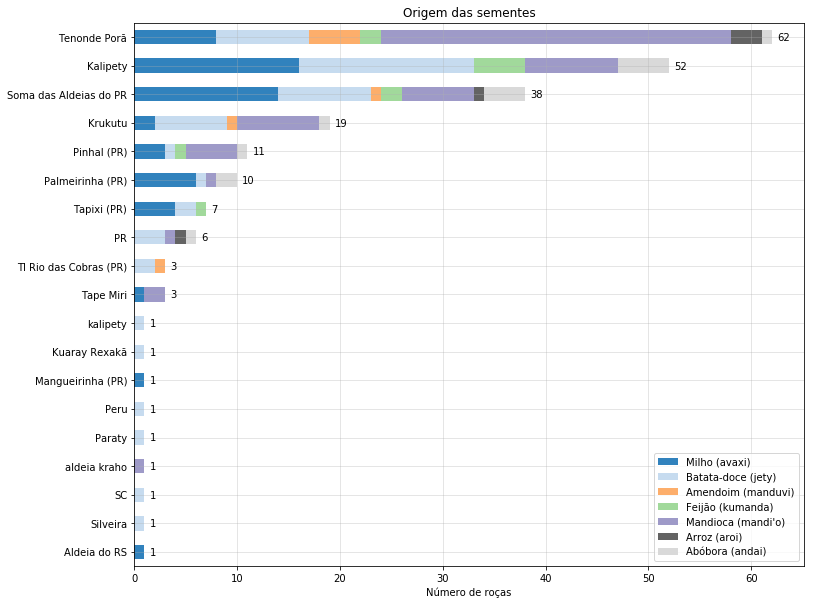

In [169]:
ax = s.iloc[:, :-1].plot.barh(stacked=True, figsize=(12,10), cmap='tab20c')
plt.grid(True, alpha=.4)
plt.title('Origem das sementes')
plt.xlabel('Número de roças')
for i in range(len(s.total)):
    ax.text(s.total[i]+.5, i-.12, str(int(s.total[i])))
plt.savefig('X.Sementes.png', dpi=200, bbox_inches='tight')

In [250]:
df = pd.read_excel('producao_esperada.xlsx', header=1, index=1).iloc[:, :3]

In [251]:
df.index = df.Aldeia

In [252]:
df = df.drop(['Aldeia'], axis=1)

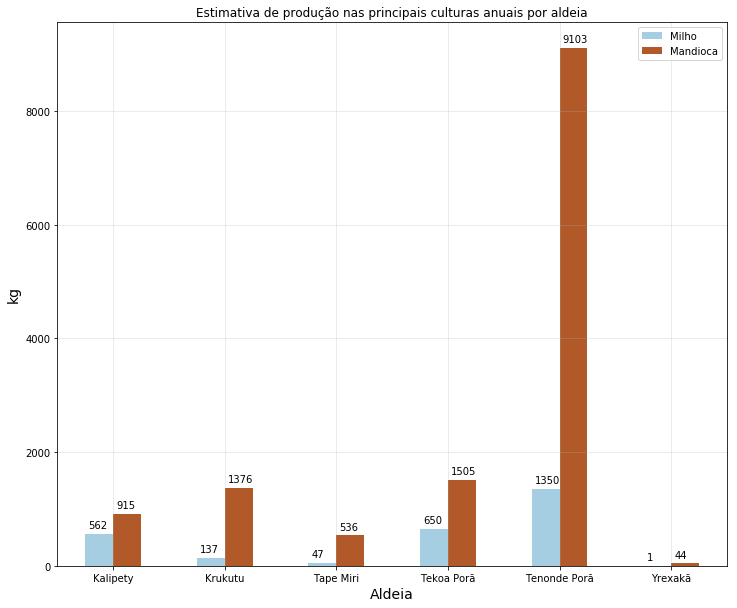

In [254]:
ax = df.plot.bar(figsize=(12,10), cmap='Paired', rot =0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x()+.03, p.get_height()+100), horizontalalignment='left')
plt.grid(True, alpha=.3)
plt.xlabel('Aldeia', fontsize=14)
plt.ylabel('kg', fontsize=14)
plt.title('Estimativa de produção nas principais culturas anuais por aldeia')
plt.savefig('producao_kg.png', dpi=200, bbox_inches='tight')

In [255]:
df = pd.read_excel('producao_media.xlsx', header=1, index=1).iloc[:, :3]

In [256]:
df.index = df.Aldeia
df = df.drop(['Aldeia'], axis=1)

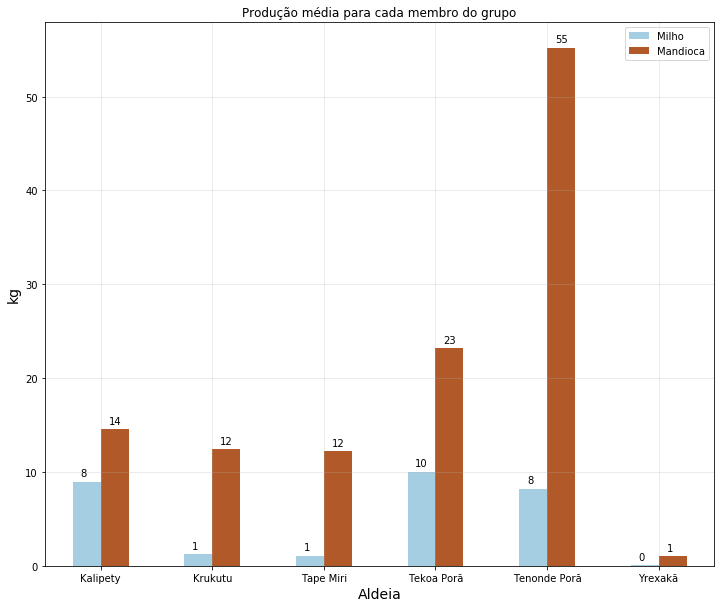

In [257]:
ax = df.plot.bar(figsize=(12,10), cmap='Paired', rot =0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x()+.07, p.get_height()+.6), horizontalalignment='left')
plt.grid(True, alpha=.3)
plt.xlabel('Aldeia', fontsize=14)
plt.ylabel('kg', fontsize=14)
plt.title('Produção média para cada membro do grupo')
plt.savefig('producao_kg_media.png', dpi=200, bbox_inches='tight')